In [1]:
from sunpy.net import hek
#from sunpy.net import hek2vso
import matplotlib.pyplot as plt
%matplotlib inline
#matplotlib qt
import shapely
from shapely.wkt import dumps, loads
import numpy as np
import pandas as pd
from shapely.geometry.polygon import LinearRing, Polygon
from datetime import timedelta
import datetime
from sunpy.time import *
from dateutil.parser import parse
import matplotlib.cm as cm
import matplotlib as mpl
from operator import itemgetter
from itertools import groupby
import itertools
import operator
from datetime import timedelta
import csv
import dateutil
import time 

# GET THE GOOD TRACKS FOR 2012
These are the ones that Ashna hand checked and determined were good

In [2]:
url = '/Users/nschanch/REU_2015/Filament_tracking/Transit_tracks2012.csv'
track_files = pd.read_csv(url, header=2)
good_tracks_trans_2012 = track_files['Track No. '].astype(float)
good_tracks_trans_2012.head()
#track_files.keys()

0     64
1     78
2     98
3    106
4    135
Name: Track No. , dtype: float64

In [3]:
fi_tracked2012 = pd.read_csv('/Users/nschanch/REU_2015/Filament_tracking/FIDustinTracked_2012.txt',delimiter='\t')   ##working with filament data 
print len(fi_tracked2012)
fi_tracked2012.head()

8541


Track No.             HEK_time            next_time Type  \
0          1  2012-01-01 08:15:04                  NaN   FI   
1          2  2012-01-01 08:15:04  2012-01-02 08:04:55   FI   
2          2  2012-01-02 08:04:55  2012-01-03 18:27:22   FI   
3          2  2012-01-03 18:27:22  2012-01-04 08:49:18   FI   
4          2  2012-01-04 08:49:18  2012-01-04 18:11:55   FI   

                      HPC_Center  \
0    POINT(702.26001 351.130005)   
1     POINT(-335.032013 423.569)   
2  POINT(-219.332993 427.597992)   
3   POINT(155.949005 425.589996)   
4   POINT(243.481995 430.621002)   

                                          HPC_BB_Rec  \
0  POLYGON((680.125244 319.940399,733.44873 319.9...   
1  POLYGON((-430.612488 377.288696,-243.477493 37...   
2  POLYGON((-250.522644 408.48175,-186.131348 408...   
3  POLYGON((26.1595001 361.198059,265.616486 361....   
4  POLYGON((205.249344 410.498749,280.708649 410....   

                                         HPC_BB_Poly  \
0  POLYGON((694.210022 330,696.219971 332.01001,6...   
1  POLYGON((-256.559998 387.350006,-253.539993 38...   
2  POLYGON((-209.270004 418.540009,-206.25 419.54...   
3  POLYGON((255.559998 371.26001,255.559998 374.2...   
4  POLYGON((221.350006 420.559998,224.369995 421....   

                      HGS_Center  \
0   POINT(49.4615746 19.1164284)   
1  POINT(-21.7999401 22.8660946)   
2   POINT(-14.069787 22.8834229)   
3   POINT(9.92746639 22.5396767)   
4   POINT(15.6561918 22.8781376)   

                                          HGS_BB_Rec  \
0  POLYGON((46.6578178 17.0551929,51.7592659 17.2...   
1  POLYGON((-27.9167461 20.0360699,-15.319437 19....   
2  POLYGON((-15.9787512 21.6737385,-11.7960272 21...   
3  POLYGON((1.61245799 18.3713264,16.6190376 18.5...   
4  POLYGON((13.0203381 21.5327492,17.9587288 21.6...   

                                       HPC_BB_Poly.1  frm_specificid  \
0  POLYGON((48.1759834 17.7414703,48.4115486 17.8...             NaN   
1  POLYGON((-16.2346992 20.4350452,-16.0449734 20...             NaN   
2  POLYGON((-13.3522606 22.2853928,-13.1621113 22...             NaN   
3  POLYGON((16.033884 19.1389103,16.0532074 19.33...             NaN   
4  POLYGON((14.1297235 22.1995487,14.3338509 22.2...             NaN   

     fi_length fi_lengthunit   fi_tilt  fi_barbstot  fi_barbsr  fi_barbsl  \
0   3300620030            cm  70.01800            0          0          0   
1  12771947500            cm  -6.07875            1          1          0   
2   3372370430            cm -16.45300            0          0          0   
3  17364156400            cm -14.10050            6          4          1   
4   4018147330            cm  -1.30679            1          0          1   

   fi_chirality  Unnamed: 18  
0             0          NaN  
1             0          NaN  
2             0          NaN  
3            -1          NaN  
4             0          NaN

In [4]:
good_tracks2012 = fi_tracked2012.groupby('Track No.').filter(lambda x: len(x['Track No.']) >= 3, dropna=True)
print len(good_tracks2012)
good_tracks2012.head()

6070


Track No.             HEK_time            next_time Type  \
1          2  2012-01-01 08:15:04  2012-01-02 08:04:55   FI   
2          2  2012-01-02 08:04:55  2012-01-03 18:27:22   FI   
3          2  2012-01-03 18:27:22  2012-01-04 08:49:18   FI   
4          2  2012-01-04 08:49:18  2012-01-04 18:11:55   FI   
5          2  2012-01-04 18:11:55  2012-01-05 18:32:45   FI   

                      HPC_Center  \
1     POINT(-335.032013 423.569)   
2  POINT(-219.332993 427.597992)   
3   POINT(155.949005 425.589996)   
4   POINT(243.481995 430.621002)   
5   POINT(315.923004 428.609009)   

                                          HPC_BB_Rec  \
1  POLYGON((-430.612488 377.288696,-243.477493 37...   
2  POLYGON((-250.522644 408.48175,-186.131348 408...   
3  POLYGON((26.1595001 361.198059,265.616486 361....   
4  POLYGON((205.249344 410.498749,280.708649 410....   
5  POLYGON((249.518997 406.474457,383.333008 406....   

                                         HPC_BB_Poly  \
1  POLYGON((-256.559998 387.350006,-253.539993 38...   
2  POLYGON((-209.270004 418.540009,-206.25 419.54...   
3  POLYGON((255.559998 371.26001,255.559998 374.2...   
4  POLYGON((221.350006 420.559998,224.369995 421....   
5  POLYGON((289.76001 416.540009,292.779999 416.5...   

                      HGS_Center  \
1  POINT(-21.7999401 22.8660946)   
2   POINT(-14.069787 22.8834229)   
3   POINT(9.92746639 22.5396767)   
4   POINT(15.6561918 22.8781376)   
5   POINT(20.4865532 22.7980022)   

                                          HGS_BB_Rec  \
1  POLYGON((-27.9167461 20.0360699,-15.319437 19....   
2  POLYGON((-15.9787512 21.6737385,-11.7960272 21...   
3  POLYGON((1.61245799 18.3713264,16.6190376 18.5...   
4  POLYGON((13.0203381 21.5327492,17.9587288 21.6...   
5  POLYGON((15.8678551 21.2744179,24.8799019 21.4...   

                                       HPC_BB_Poly.1  frm_specificid  \
1  POLYGON((-16.2346992 20.4350452,-16.0449734 20...             NaN   
2  POLYGON((-13.3522606 22.2853928,-13.1621113 22...             NaN   
3  POLYGON((16.033884 19.1389103,16.0532074 19.33...             NaN   
4  POLYGON((14.1297235 22.1995487,14.3338509 22.2...             NaN   
5  POLYGON((18.6076145 21.9748726,18.8094444 21.9...             NaN   

     fi_length fi_lengthunit   fi_tilt  fi_barbstot  fi_barbsr  fi_barbsl  \
1  12771947500            cm  -6.07875            1          1          0   
2   3372370430            cm -16.45300            0          0          0   
3  17364156400            cm -14.10050            6          4          1   
4   4018147330            cm  -1.30679            1          0          1   
5   8323324900            cm  -3.15932            1          1          0   

   fi_chirality  Unnamed: 18  
1             0          NaN  
2             0          NaN  
3            -1          NaN  
4             0          NaN  
5             0          NaN

In [5]:
###selects the data of interest by csv track numbers 


working_data_2012_trans= good_tracks2012[good_tracks2012['Track No.'].isin(good_tracks_trans_2012)]
working_data_2012_trans.head()


Track No.             HEK_time            next_time Type  \
149         64  2012-01-06 18:05:45  2012-01-07 09:33:12   FI   
150         64  2012-01-07 09:33:12  2012-01-08 08:28:28   FI   
151         64  2012-01-08 08:28:28  2012-01-09 11:08:54   FI   
152         64  2012-01-09 11:08:54  2012-01-10 18:23:00   FI   
153         64  2012-01-10 18:23:00  2012-01-11 11:28:18   FI   

                        HPC_Center  \
149     POINT(-879.333984 299.819)   
150  POINT(-809.905029 300.821991)   
151  POINT(-649.929016 324.964996)   
152  POINT(-455.740997 328.979004)   
153    POINT(125.750999 465.78299)   

                                            HPC_BB_Rec  \
149  POLYGON((-926.620972 158.964996,-792.809021 15...   
150  POLYGON((-854.172974 142.865005,-704.265015 14...   
151  POLYGON((-704.257996 176.064499,-553.346008 17...   
152  POLYGON((-491.959015 194.167496,-369.221008 19...   
153  POLYGON((48.2885017 371.217987,161.967499 371....   

                                           HPC_BB_Poly  \
149  POLYGON((-895.429993 169.029999,-893.419983 17...   
150  POLYGON((-823.98999 152.929993,-820.969971 152...   
151  POLYGON((-681.119995 186.130005,-678.099976 18...   
152  POLYGON((-460.769989 204.229996,-457.75 206.24...   
153  POLYGON((147.880005 381.279999,150.899994 383....   

                        HGS_Center  \
149   POINT(-70.026062 16.6761971)   
150   POINT(-59.586792 16.0898895)   
151  POINT(-43.9116859 16.6940193)   
152  POINT(-29.0017738 16.2307987)   
153   POINT(8.10672092 24.4009399)   

                                            HGS_BB_Rec  \
149  POLYGON((-73.5585556 8.36423206,-54.8212471 7....   
150  POLYGON((-61.627533 6.66912889,-46.3526535 5.8...   
151  POLYGON((-46.5964088 7.778368,-34.736145 7.258...   
152  POLYGON((-30.4968433 8.07977962,-22.3664532 7....   
153  POLYGON((2.97542095 18.2334518,10.0307789 18.2...   

                                         HPC_BB_Poly.1  frm_specificid  \
149  POLYGON((-67.9817734 8.62738228,-67.724762 8.7...             NaN   
150  POLYGON((-58.1349831 7.06986094,-57.7928276 7....             NaN   
151  POLYGON((-44.7061501 8.28779984,-44.4526978 8....             NaN   
152  POLYGON((-28.4197483 8.61031342,-28.2258797 8....             NaN   
153  POLYGON((9.18464661 18.9203701,9.38134956 19.0...             NaN   

       fi_length fi_lengthunit  fi_tilt  fi_barbstot  fi_barbsr  fi_barbsl  \
149  19229714400            cm  70.7404            3          1          2   
150  22673801200            cm  76.3383            6          3          1   
151  21741021200            cm  67.0859            3          1          1   
152  18870927400            cm  73.8154            2          1          0   
153  12987221000            cm -53.1533            4          1          2   

     fi_chirality  Unnamed: 18  
149             0          NaN  
150            -1          NaN  
151             0          NaN  
152            -1          NaN  
153             0          NaN

# SPLIT BETWEEN NORTH AND SOUTH 

In [6]:
xvals = [loads(elem).x for elem in working_data_2012_trans['HPC_Center']]
working_data_2012_trans['xcen'] = xvals
#print len(working_data_2012_trans)
yvals = [loads(elem).y for elem in working_data_2012_trans['HPC_Center']]
working_data_2012_trans['ycen'] = yvals 


#The AVERAGE y value in the track is in the north. 
#There are a few cases where the filament track has values in both the north and south
north_filaments_2012 = working_data_2012_trans.groupby("Track No.").filter(lambda x: (x['ycen']).mean() > 0)
south_filaments_2012 = working_data_2012_trans.groupby("Track No.").filter(lambda x: (x['ycen']).mean() <= 0)


#Now group everything by its track number
south_groups_2012 = south_filaments_2012.groupby("Track No.")
north_groups_2012 = north_filaments_2012.groupby("Track No.")


#Get the unique track numbers for each hemisphere
north_trx_2012_trans=north_groups_2012['Track No.']
south_trx_2012_trans=south_groups_2012['Track No.']


/usr/local/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/usr/local/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# FIND THE AREA OF THE POLYGONS

In [7]:
poly_2012 = working_data_2012_trans['HPC_BB_Poly']
area_data_2012 = []


for item in poly_2012:
    poly = loads(item) #loading each polygon
    tot_area = poly.area
    area_data_2012.append(tot_area)
    
working_data_2012_trans['area'] = area_data_2012

/usr/local/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [23]:
#all_tracks_trans=[]
#length_2012=working_data_2012_trans['fi_length']
#time_2012=working_data_2012_trans['HEK_time']
#track_2012=working_data_2012_trans['Track No.']
#chiral_2012= working_data_2012_trans['fi_chirality']
#tilt_2012 = working_data_2012_trans['fi_tilt']
#plot_length_data_2012_trans=zip(track_2012, time_2012, length_2012, chiral_2012, tilt_2012, area_data_2012)

#track number, track time, length, chirality
#all_data_trans=plot_length_data_2012_trans+plot_length_data_2013_trans
#all_north_trans = list(set(north_trx_2012_trans) | set(norm_north_track_2013) )
#all_south_trans = list(set(south_trx_2012_trans) | set(norm_south_track_2013) )
#for element in all_data_trans:
#    all_tracks_trans.append(element[0])
    
all_tracks_trans = working_data_2012_trans[['Track No.','fi_length','HEK_time','fi_chirality','fi_tilt','area','fi_barbstot','xcen','ycen']]
print len(all_tracks_trans)
all_tracks_trans.head()

763


Track No.    fi_length             HEK_time  fi_chirality  fi_tilt  \
149         64  19229714400  2012-01-06 18:05:45             0  70.7404   
150         64  22673801200  2012-01-07 09:33:12            -1  76.3383   
151         64  21741021200  2012-01-08 08:28:28             0  67.0859   
152         64  18870927400  2012-01-09 11:08:54            -1  73.8154   
153         64  12987221000  2012-01-10 18:23:00             0 -53.1533   

            area  fi_barbstot        xcen        ycen  
149  7662.162092            3 -879.333984  299.819000  
150  5797.861380            6 -809.905029  300.821991  
151  6053.765348            3 -649.929016  324.964996  
152  4029.099151            2 -455.740997  328.979004  
153   954.909216            4  125.750999  465.782990

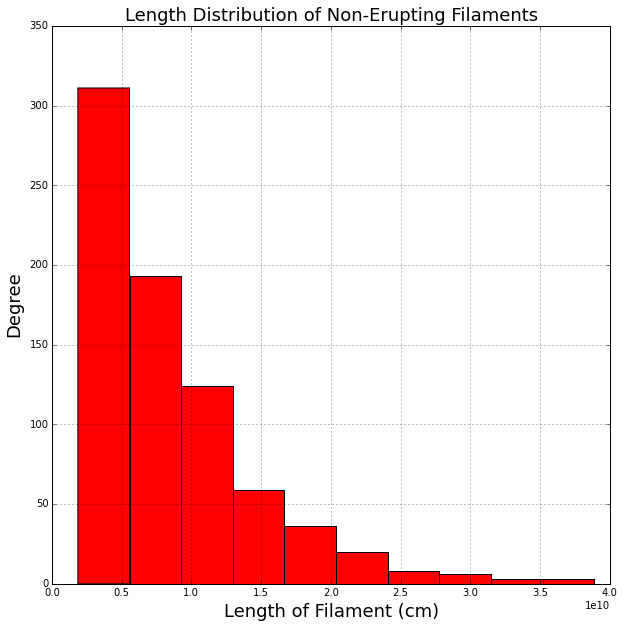

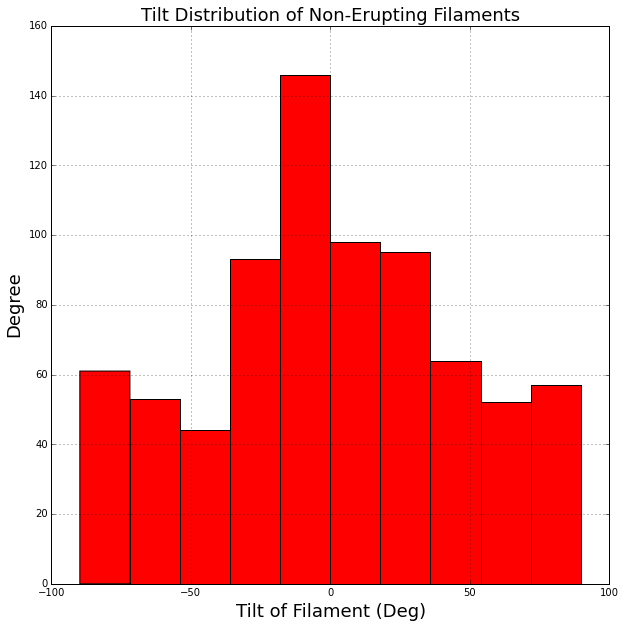

In [24]:
plt.figure(figsize=(10,10))
plt.grid(True)
plt.ylabel('Number of Non-Erupting Filaments',fontsize=18)
plt.xlabel('Length of Filament (cm)',fontsize=18)
all_tracks_trans['fi_length'].plot(kind='hist', rwidth=1.5, color = 'r')
plt.title('Length Distribution of Non-Erupting Filaments',fontsize=18)


    
plt.figure(figsize=(10,10))
plt.grid(True)
plt.ylabel('Number of Non-Erupting Filaments',fontsize=18)
plt.xlabel('Tilt of Filament (Deg)',fontsize=18)
all_tracks_trans['fi_tilt'].plot(kind='hist', rwidth=1.5, color = 'r')
plt.title('Tilt Distribution of Non-Erupting Filaments',fontsize=18)





In [25]:
#I am going to try my own method to find the slope of the length
#print len(all_tracks_trans)
grouped_filaments = all_tracks_trans.groupby('Track No.')
stuff = 0
time_delta = []

for name, group in grouped_filaments:
    #print name
    
    t = group['HEK_time']
    
    time = [pd.to_datetime(date) for date in t]
    t0 = time[0]
    for i in range(len(time)):
        t1 = time[i]
        time_delta.append(timedelta.total_seconds(t1 - t0))
        
#print time_delta       
print len(all_tracks_trans)
print len(time_delta)
all_tracks_trans['time_delta'] = time_delta
all_tracks_trans.head()

763
763


/usr/local/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Track No.    fi_length             HEK_time  fi_chirality  fi_tilt  \
149         64  19229714400  2012-01-06 18:05:45             0  70.7404   
150         64  22673801200  2012-01-07 09:33:12            -1  76.3383   
151         64  21741021200  2012-01-08 08:28:28             0  67.0859   
152         64  18870927400  2012-01-09 11:08:54            -1  73.8154   
153         64  12987221000  2012-01-10 18:23:00             0 -53.1533   

            area  fi_barbstot        xcen        ycen  time_delta  
149  7662.162092            3 -879.333984  299.819000           0  
150  5797.861380            6 -809.905029  300.821991       55647  
151  6053.765348            3 -649.929016  324.964996      138163  
152  4029.099151            2 -455.740997  328.979004      234189  
153   954.909216            4  125.750999  465.782990      346635

In [26]:
def plot_slopes(x,y,m,b):
    line = [m*each+b for each in x] #Calculate the line points (y =mx+b)
    
    plt.plot(x, y, color='red', linestyle='-')
    plt.plot(x, line, '-.', color='blue')   ##plots the line fit
    plt.title('Filament length (Track) of Non-Erupting Filament')
    plt.grid(True)
    fig1 = plt.gcf()
    fig1.set_size_inches(10.5,10.5)
    plt.xlabel('Filament Track time')
    plt.ylabel('Filament length (cm)')
    plt.xticks( rotation= 80 )
    plt.show()

# Find the change in Length for each filament

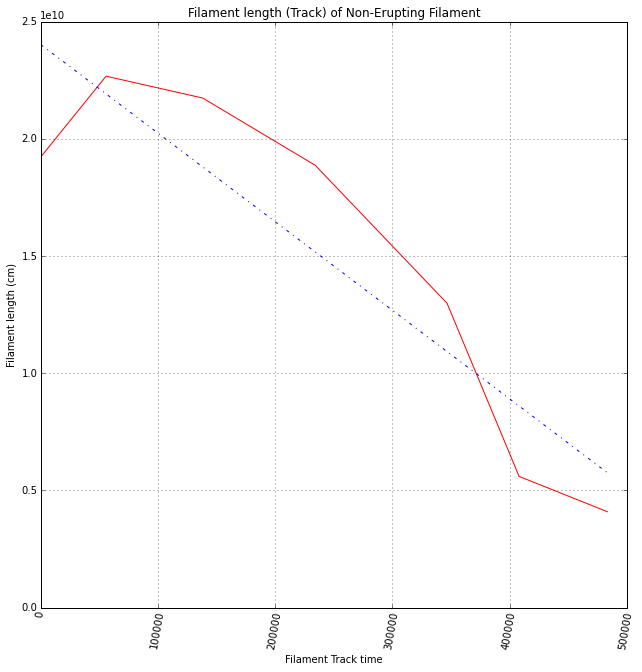

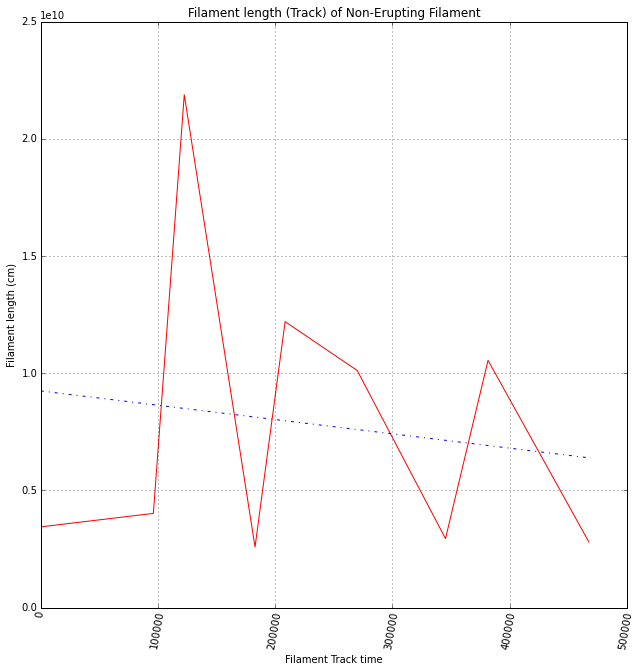

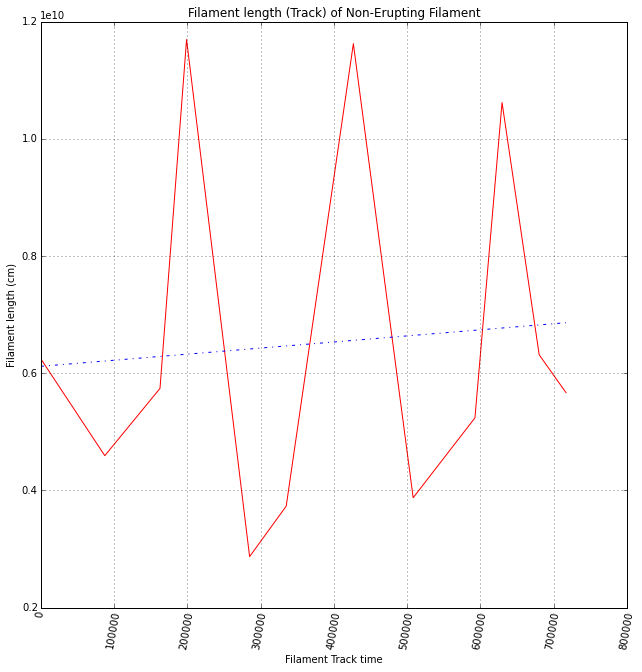

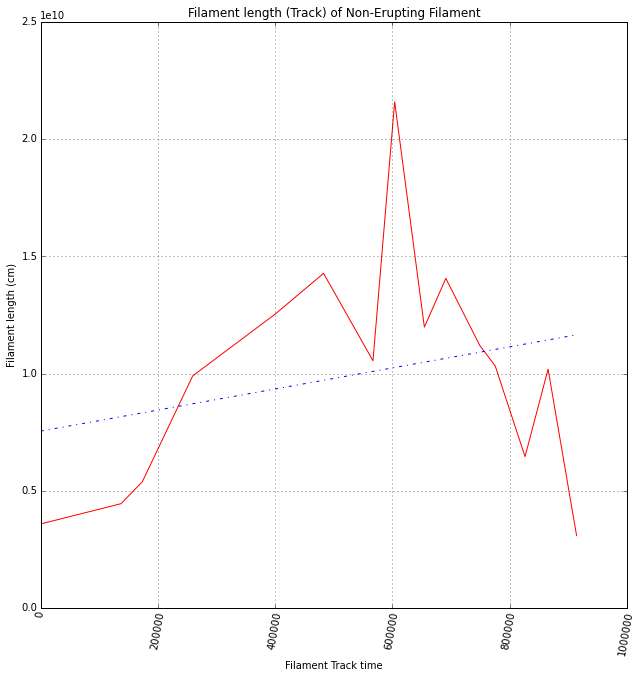

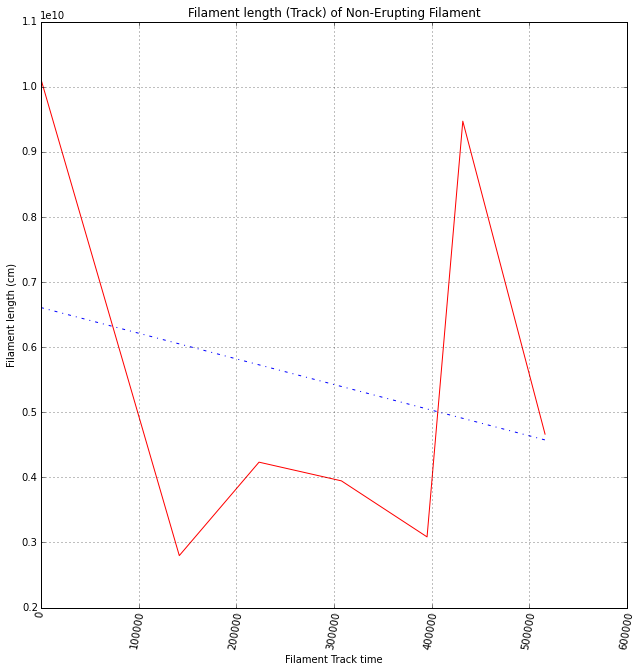

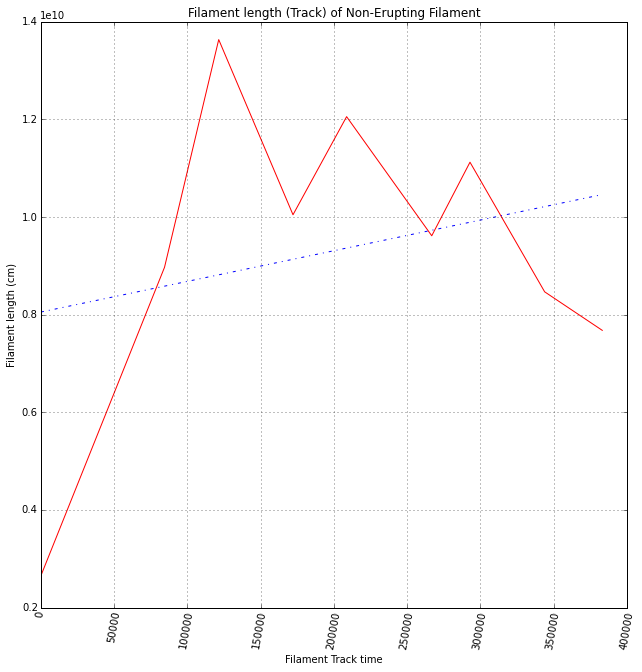

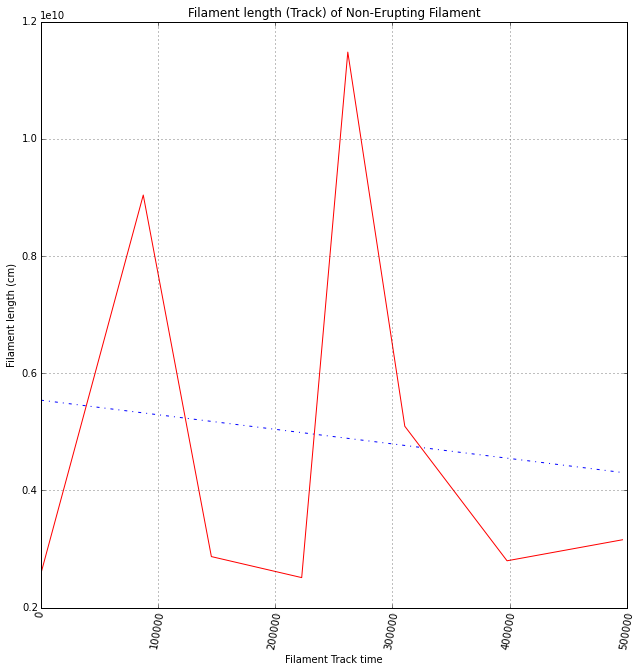

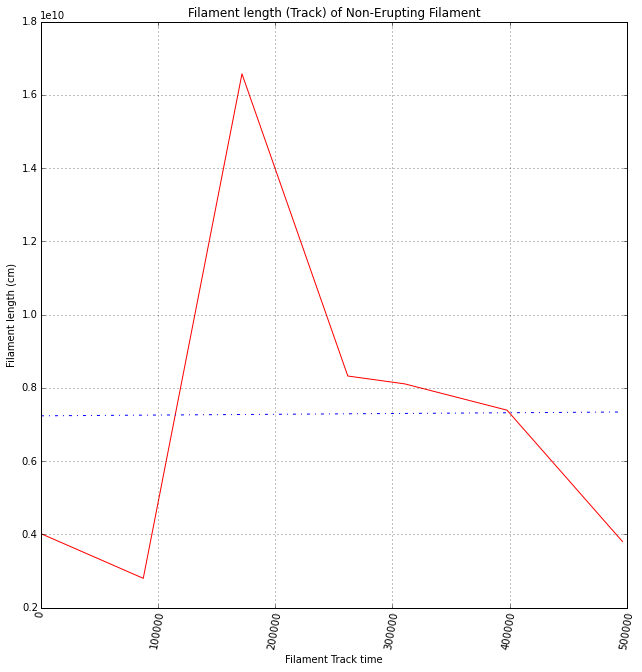

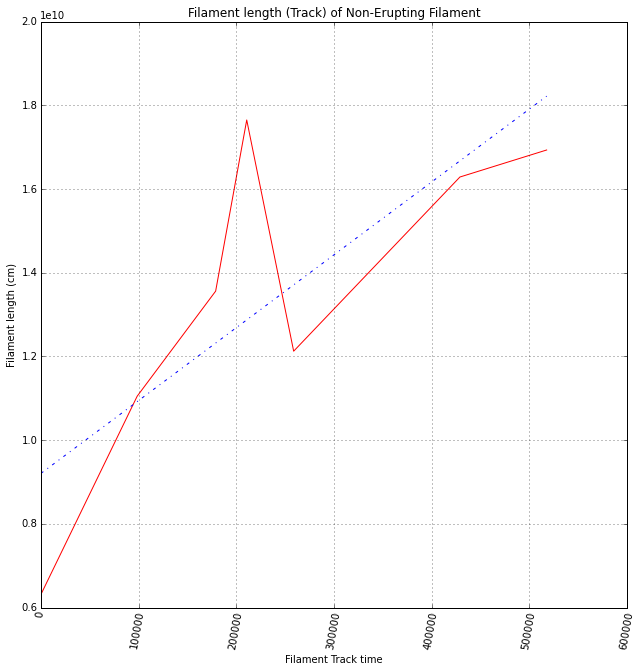

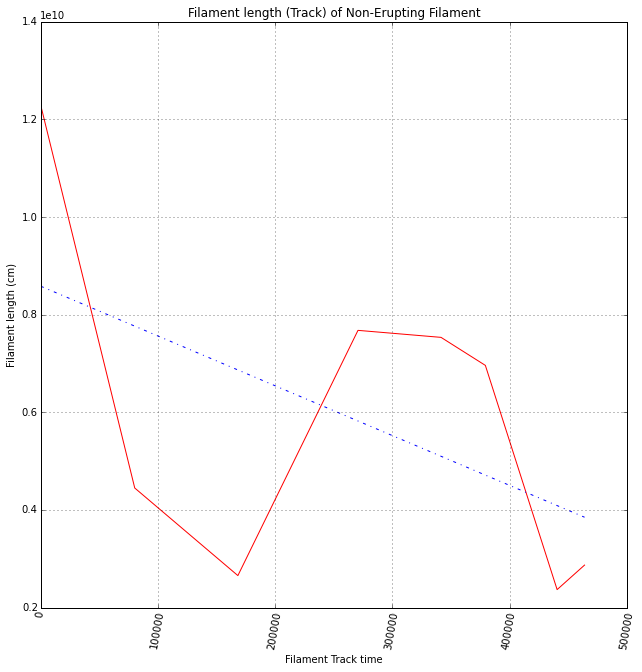

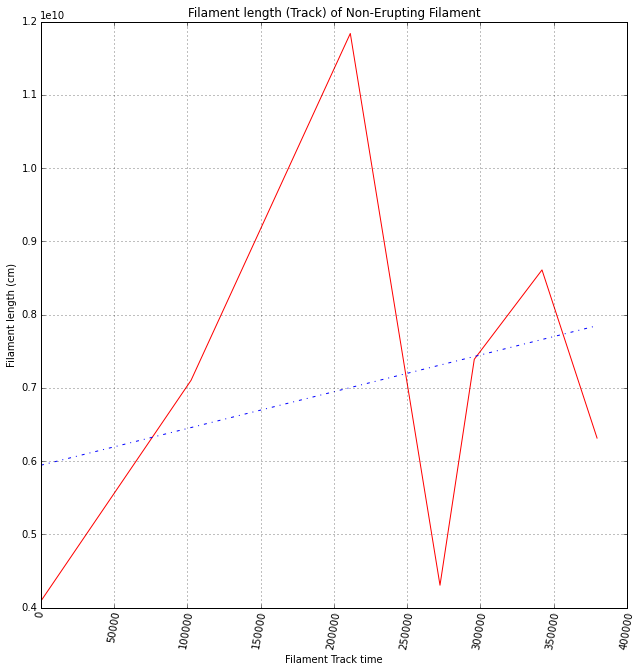

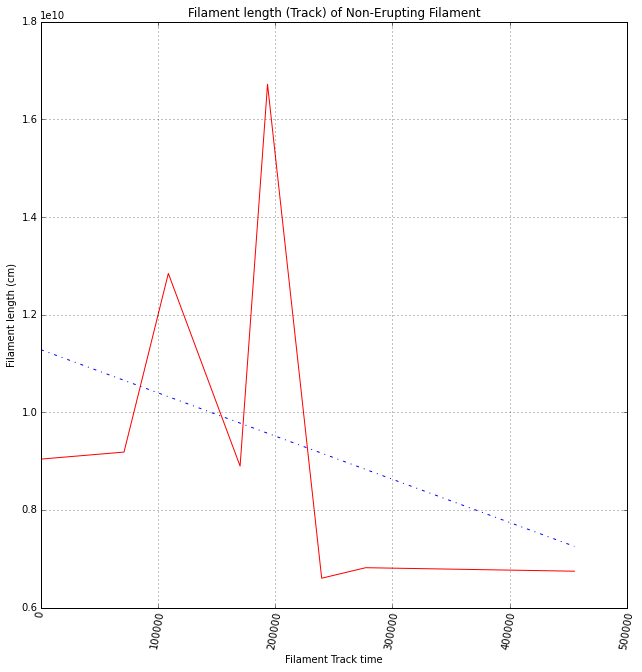

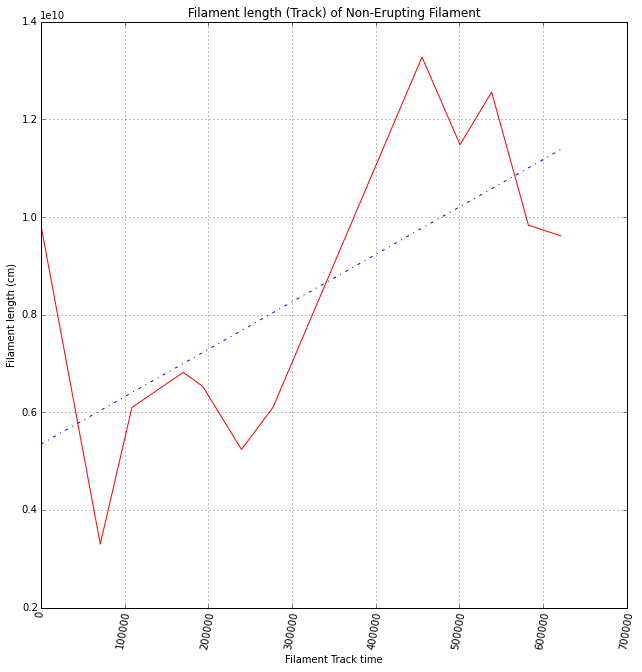

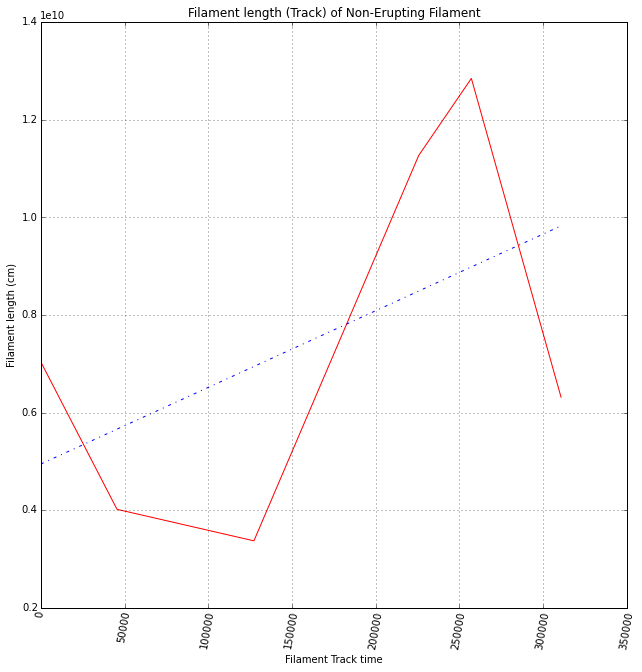

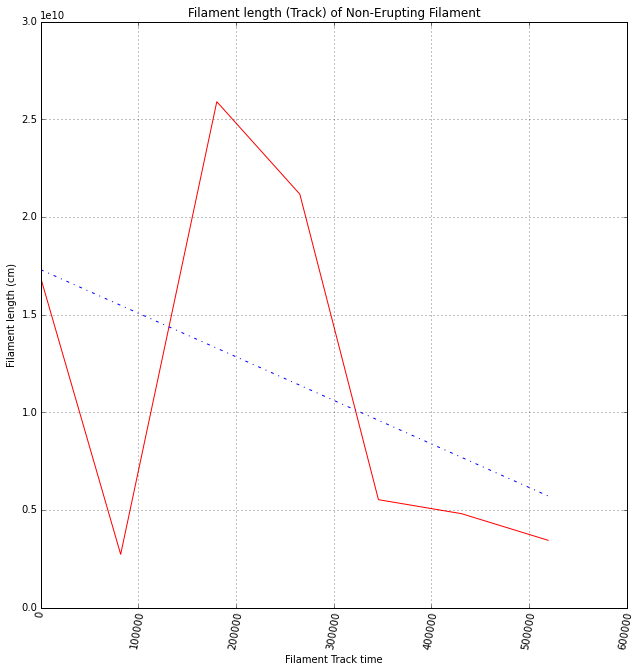

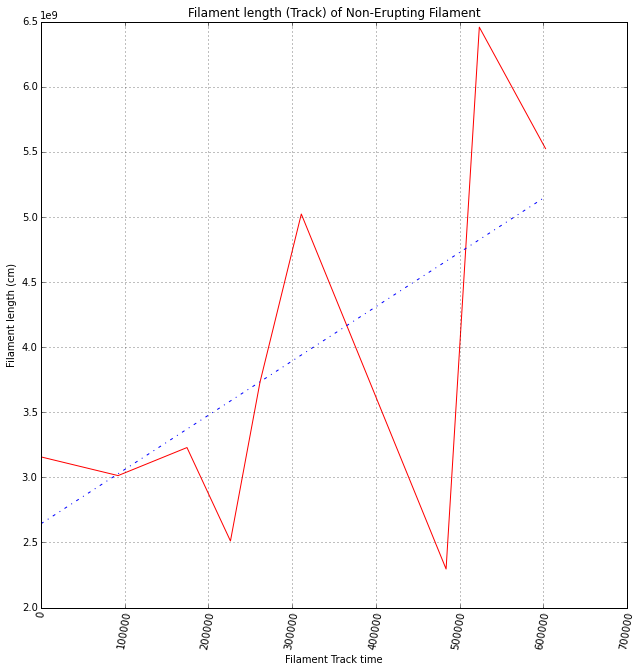

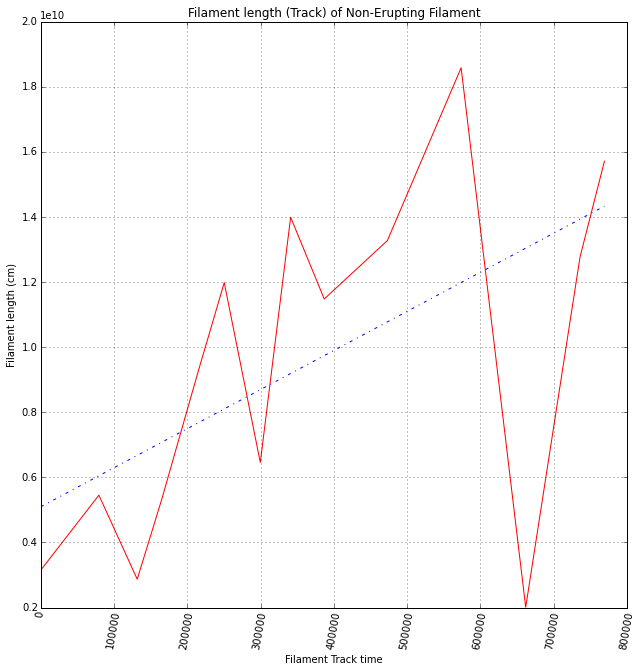

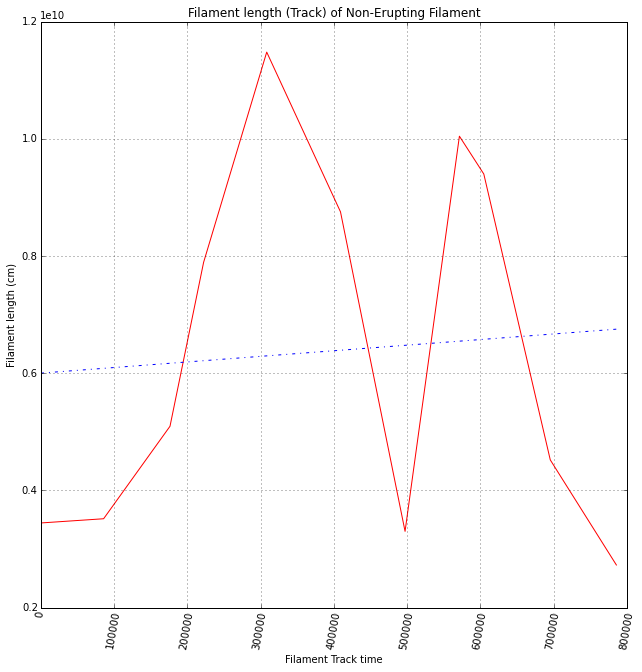

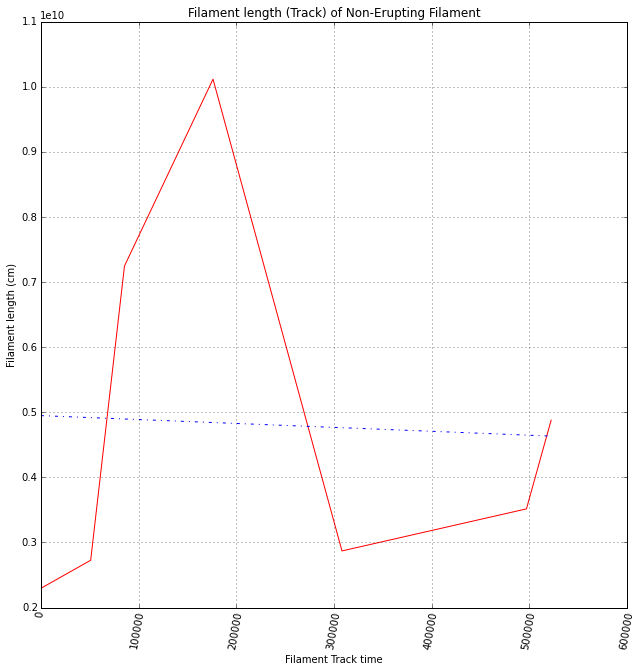

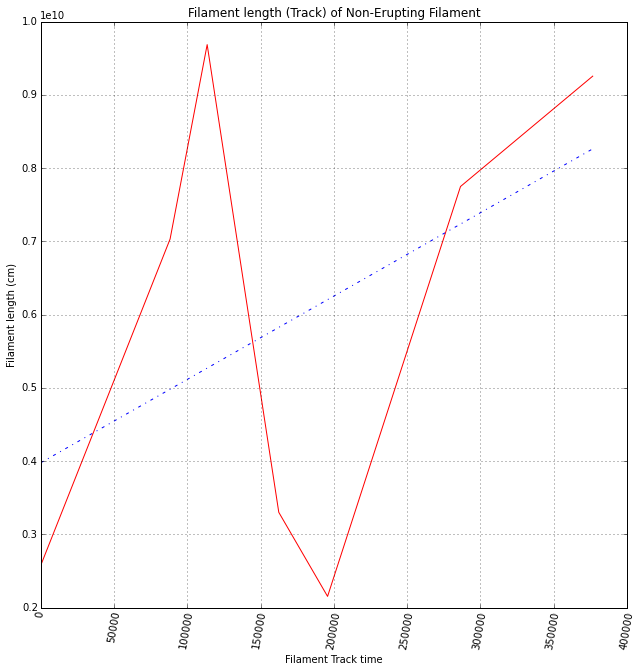

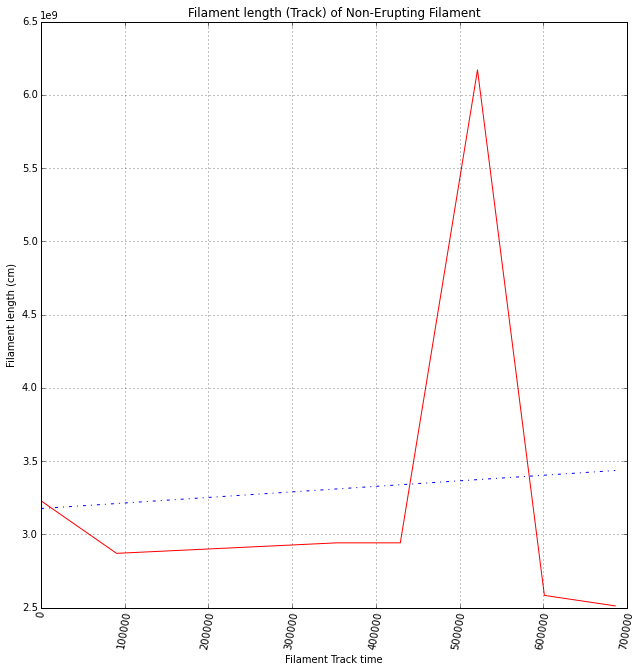

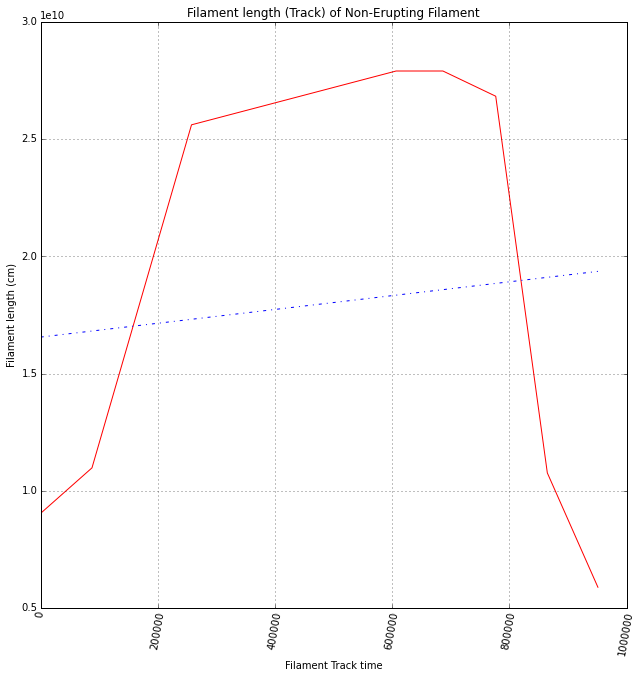

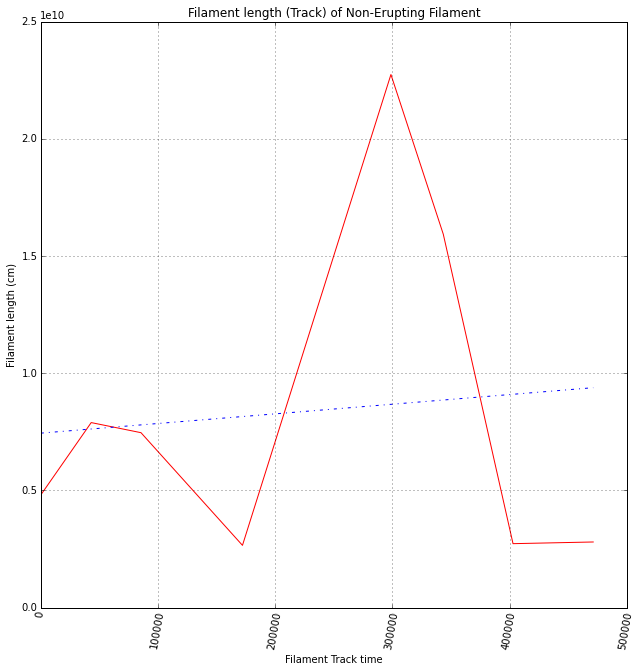

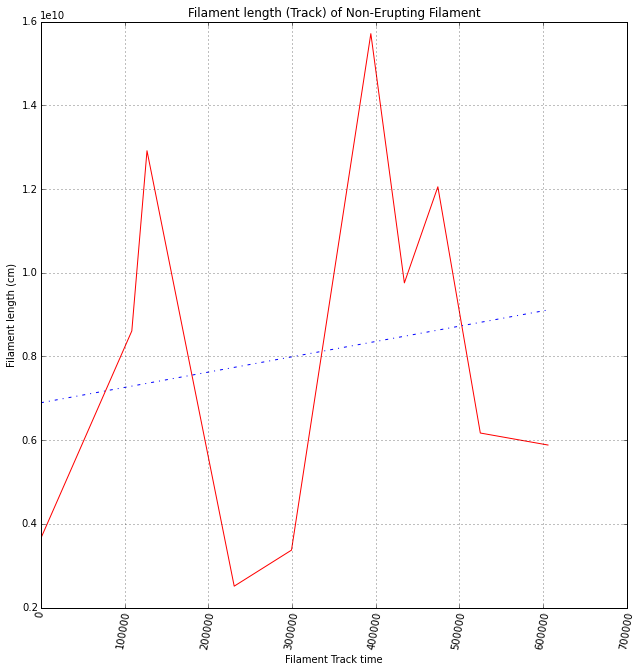

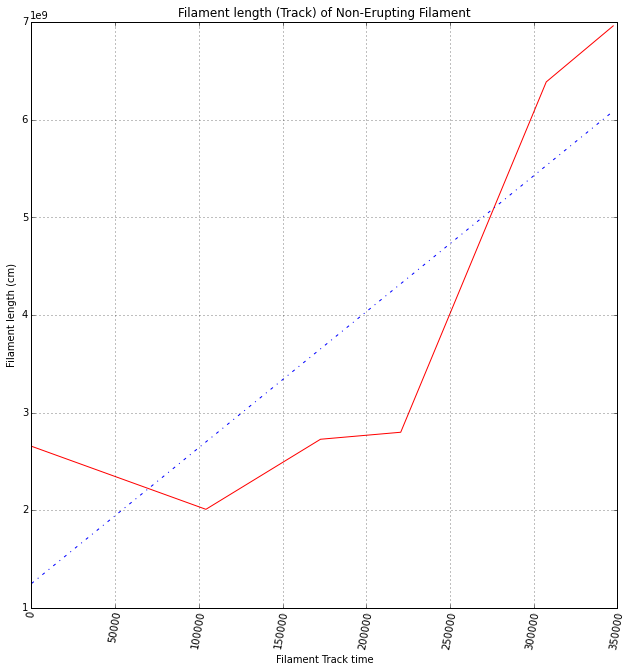

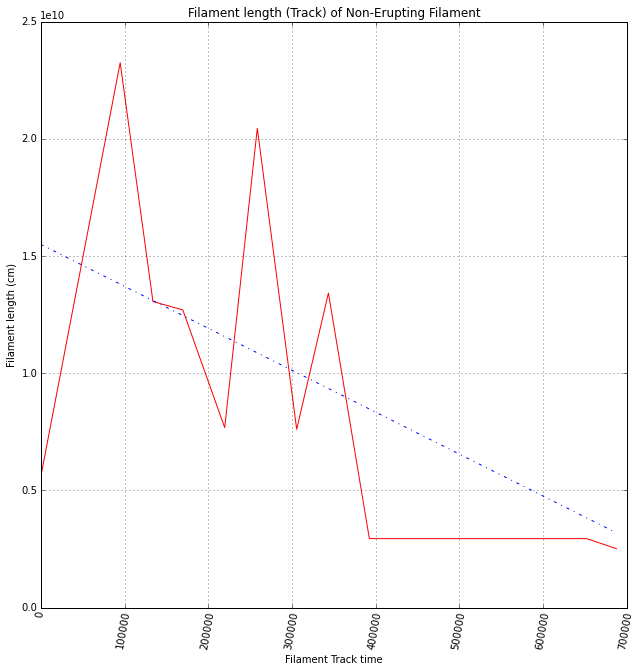

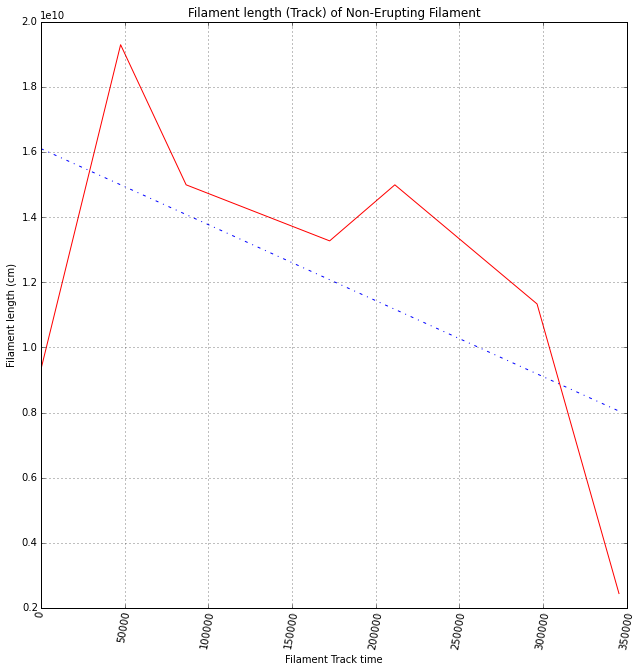

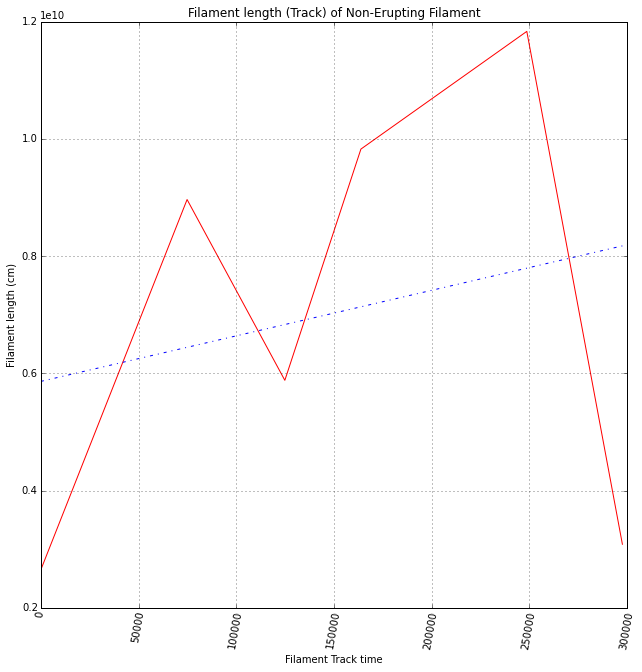

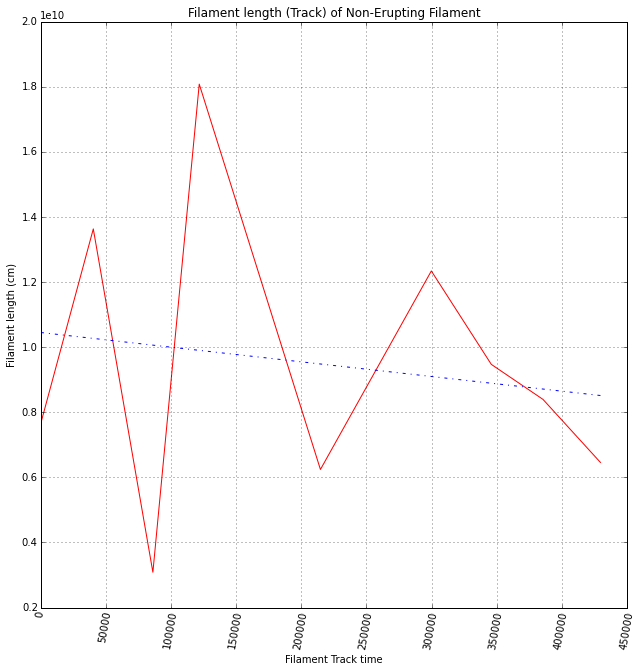

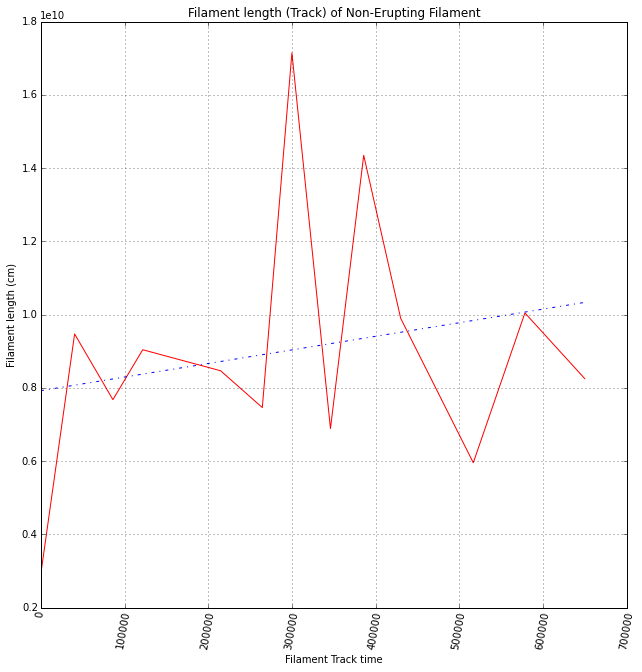

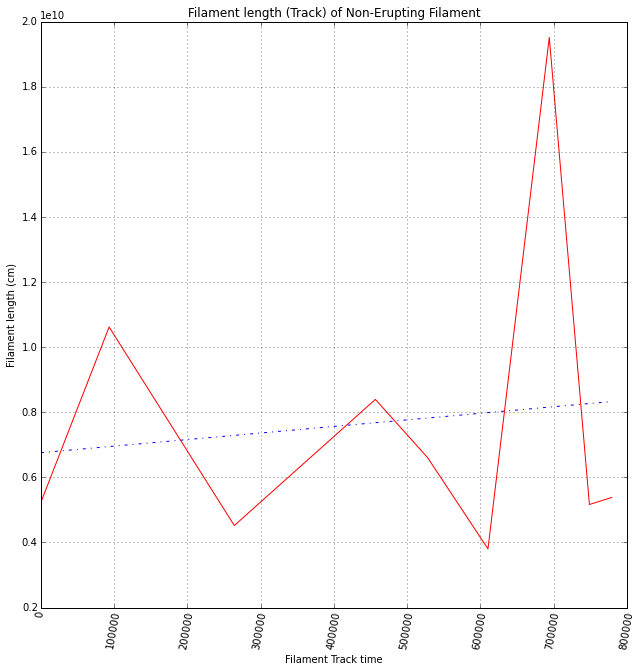

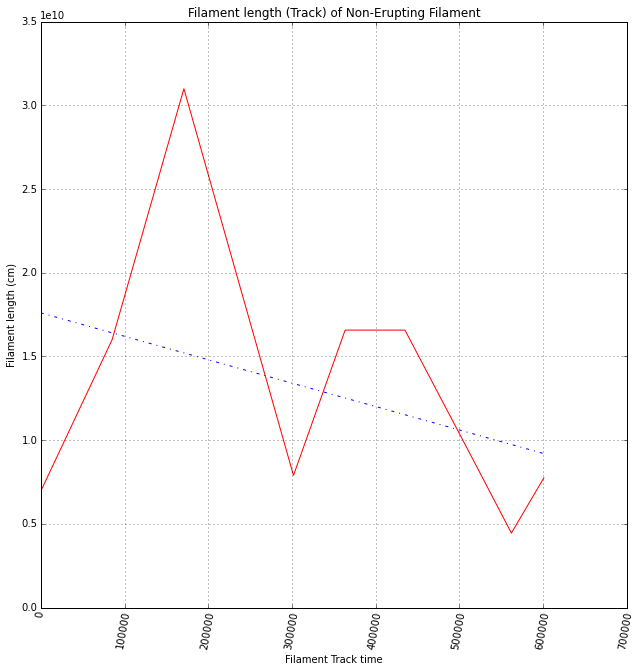

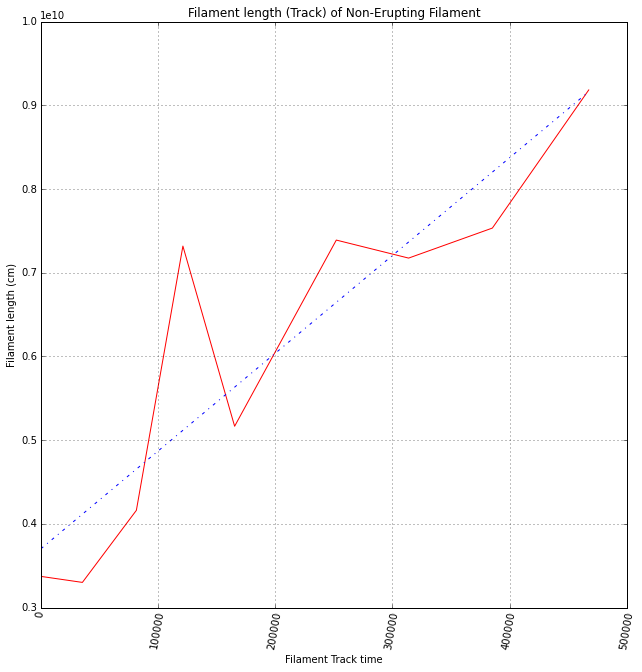

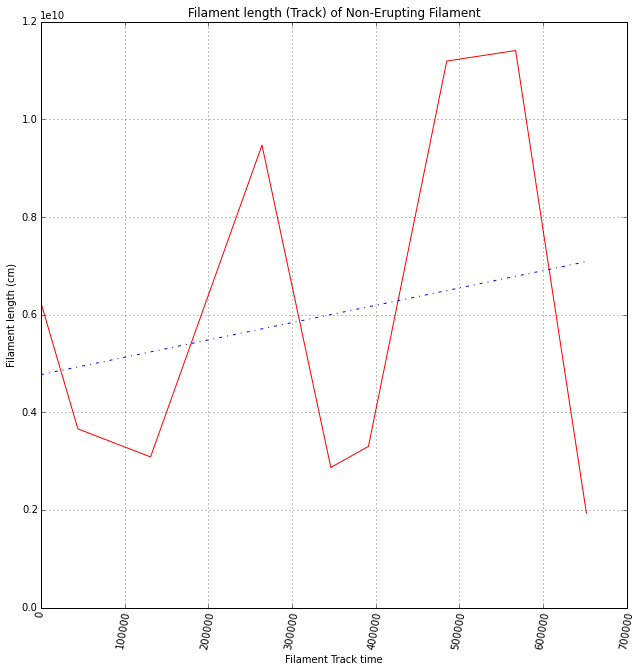

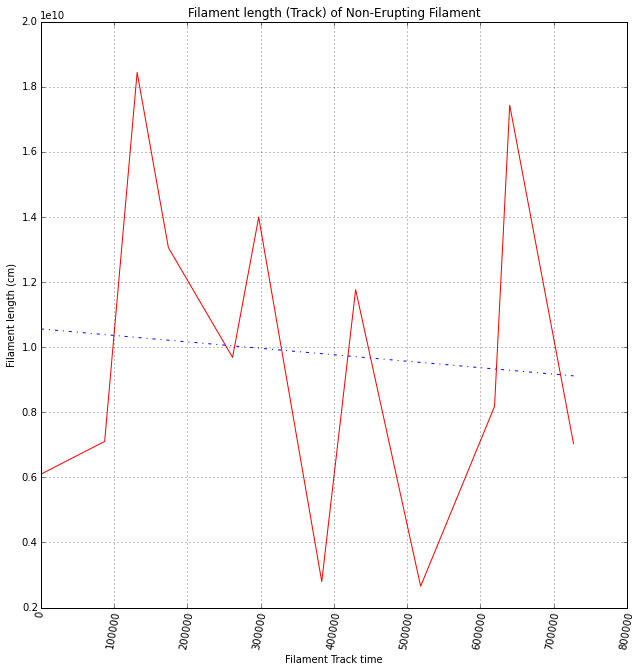

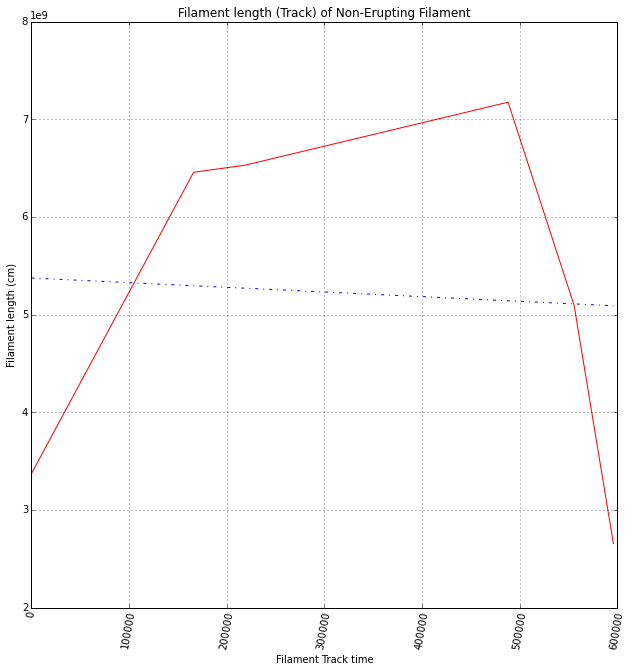

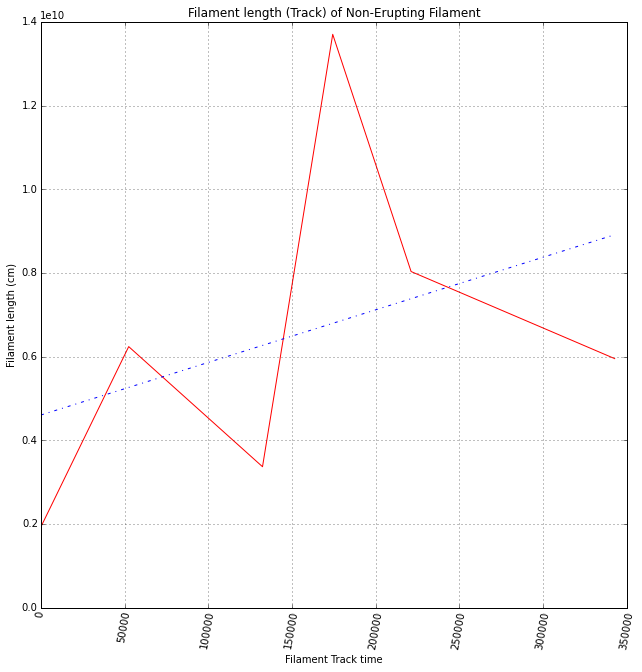

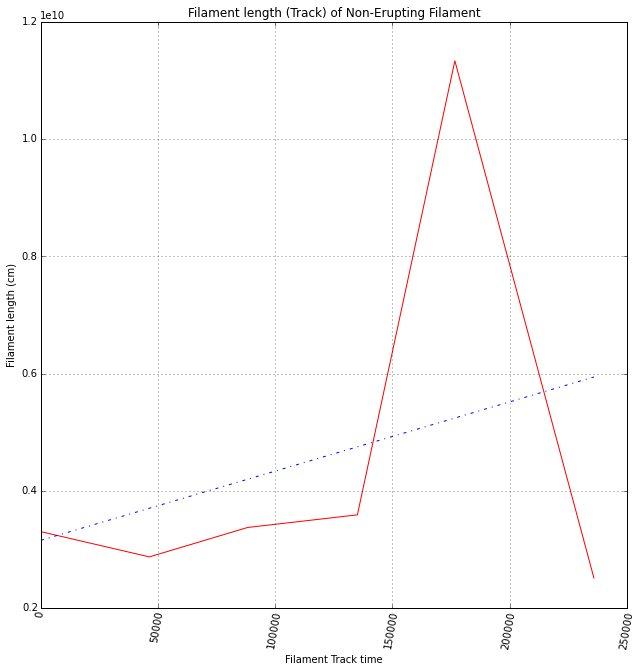

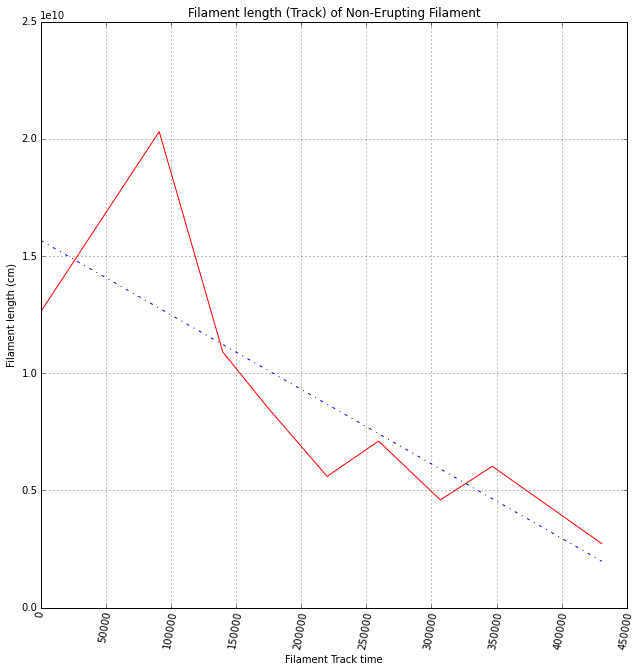

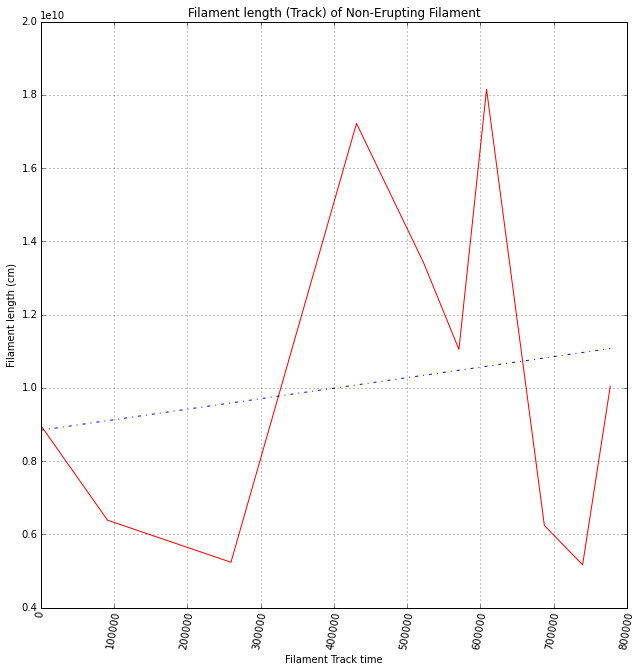

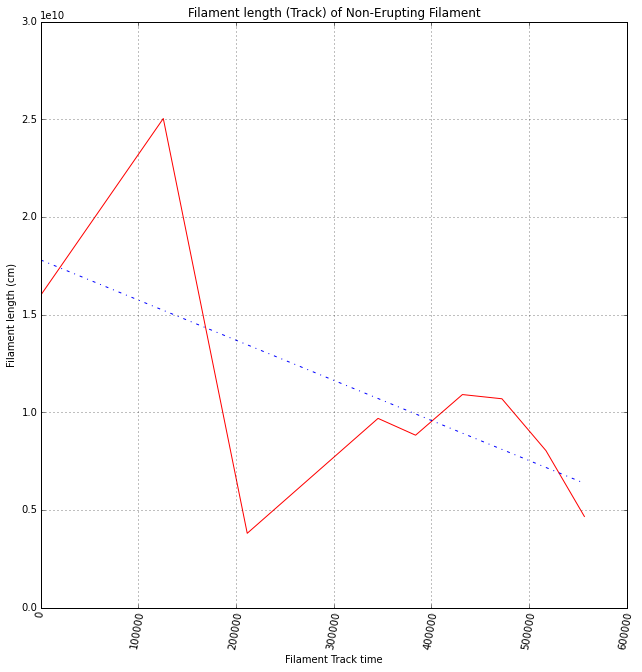

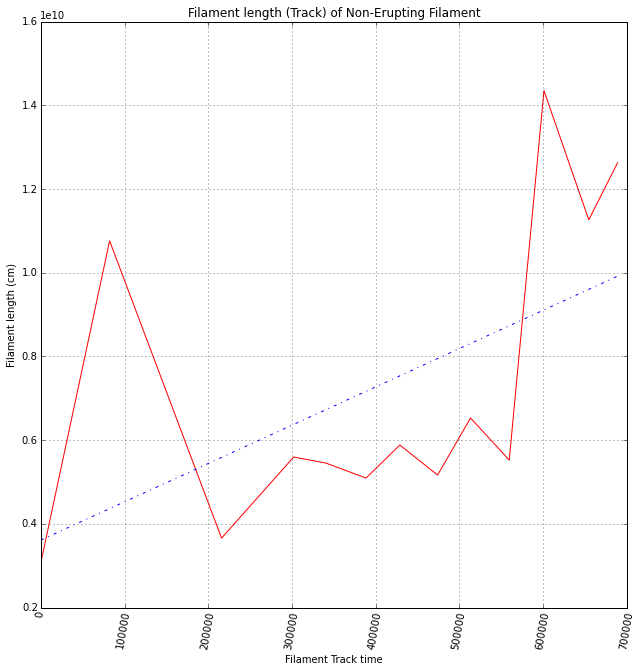

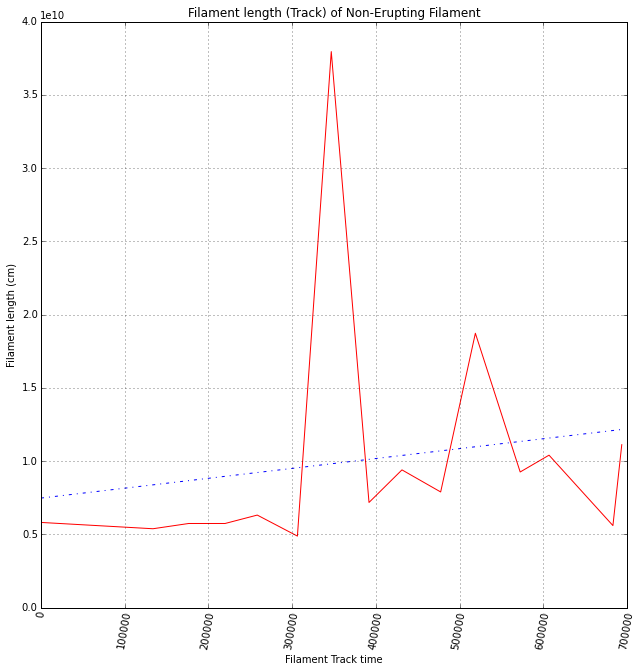

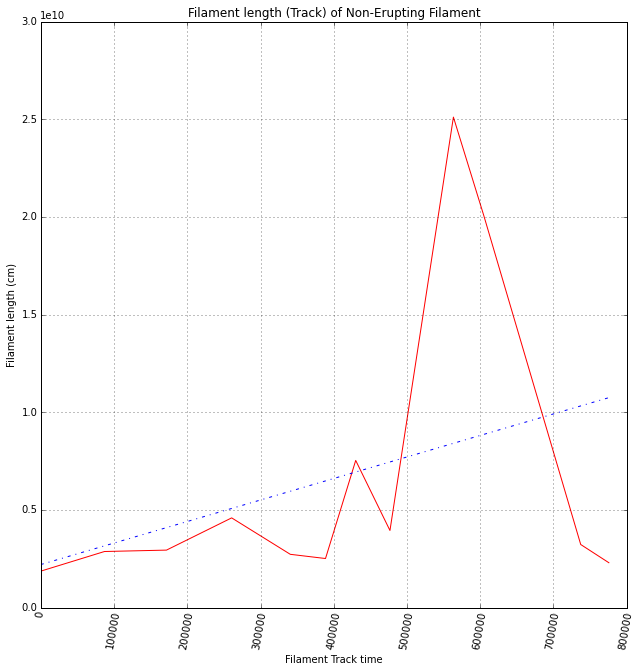

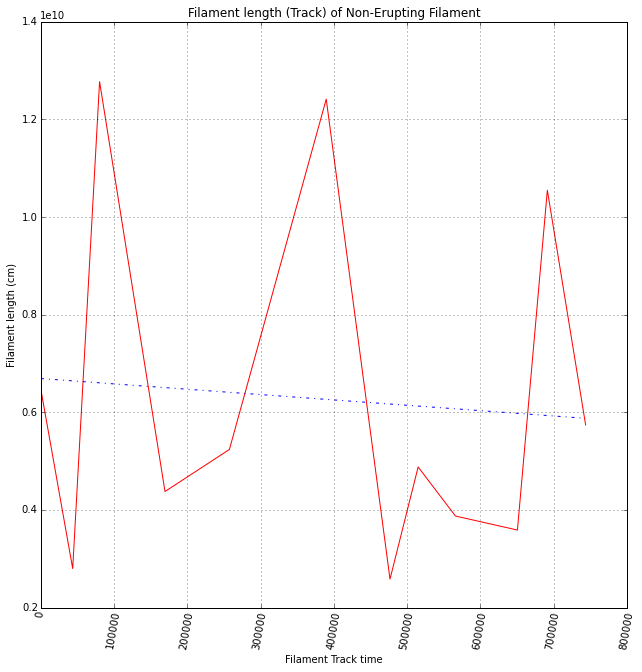

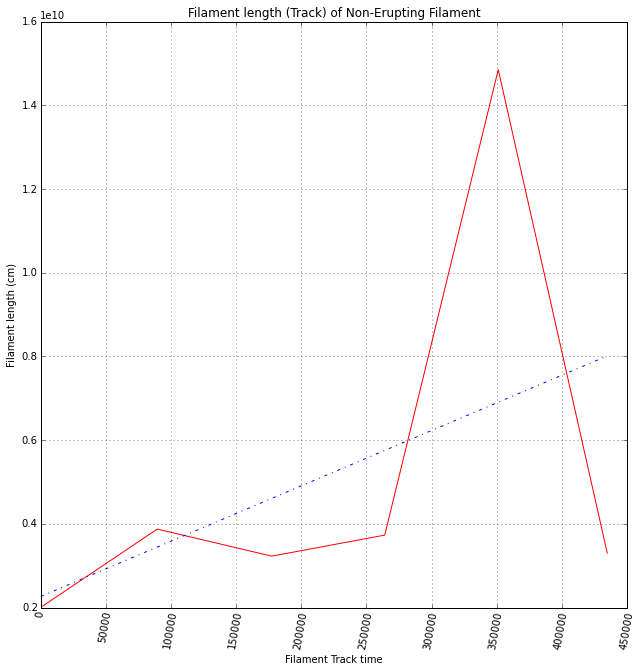

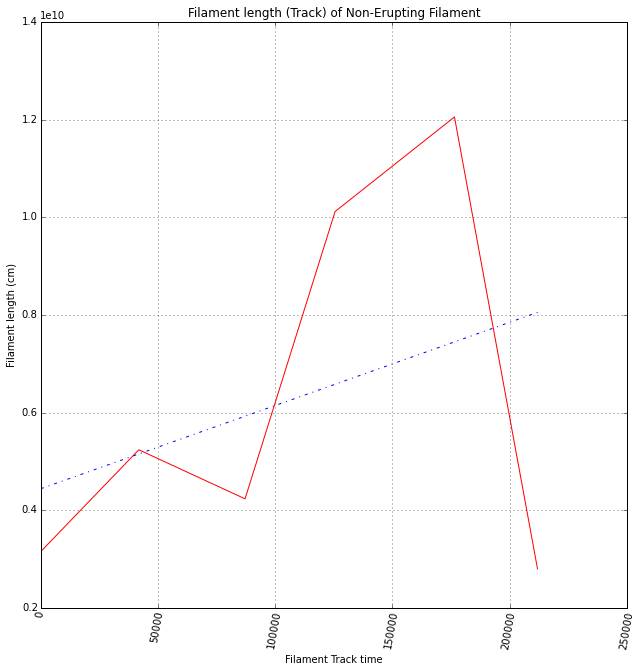

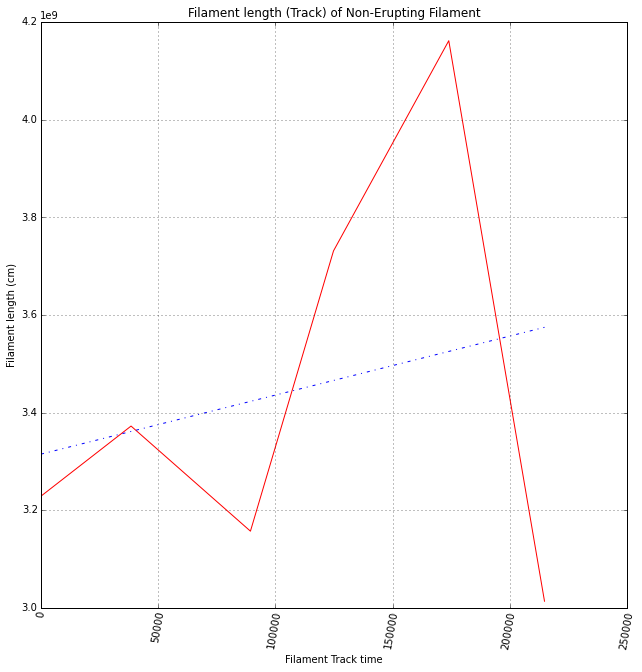

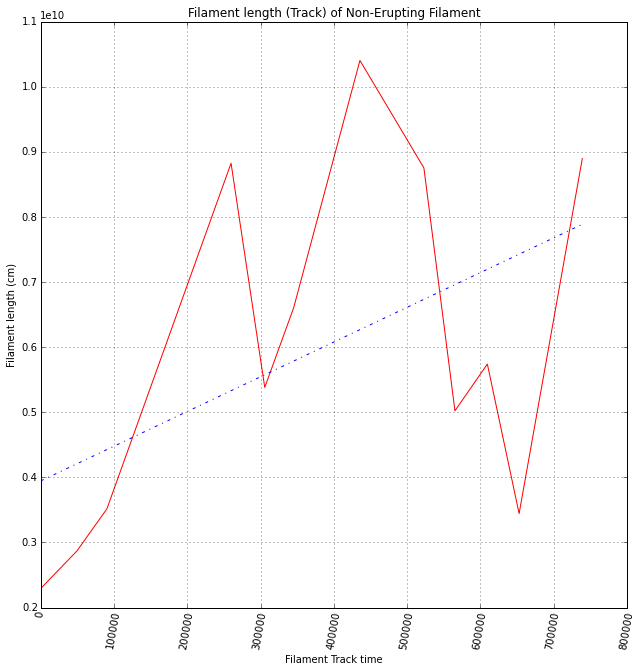

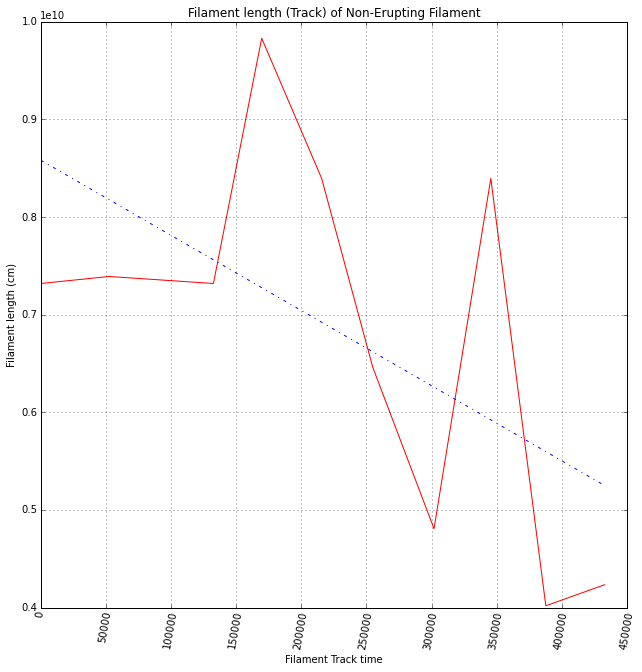

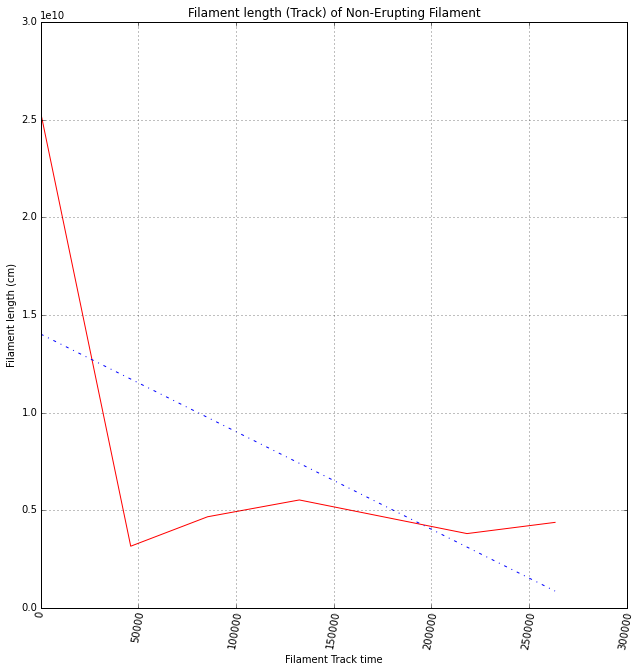

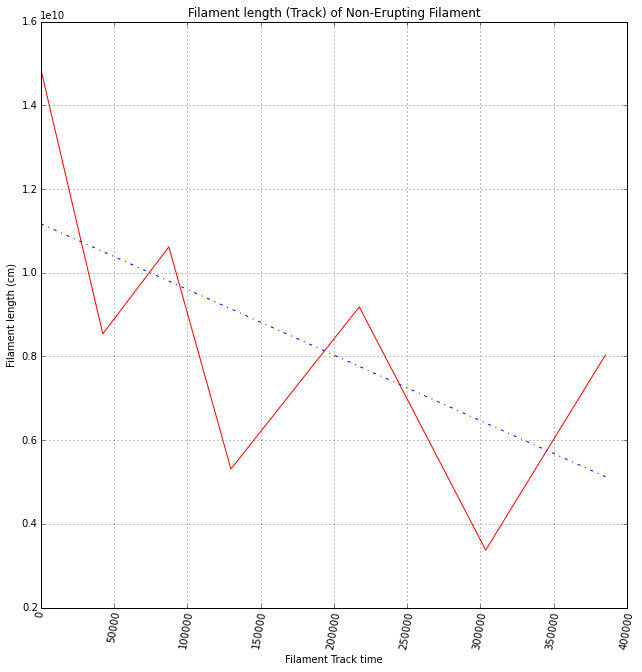

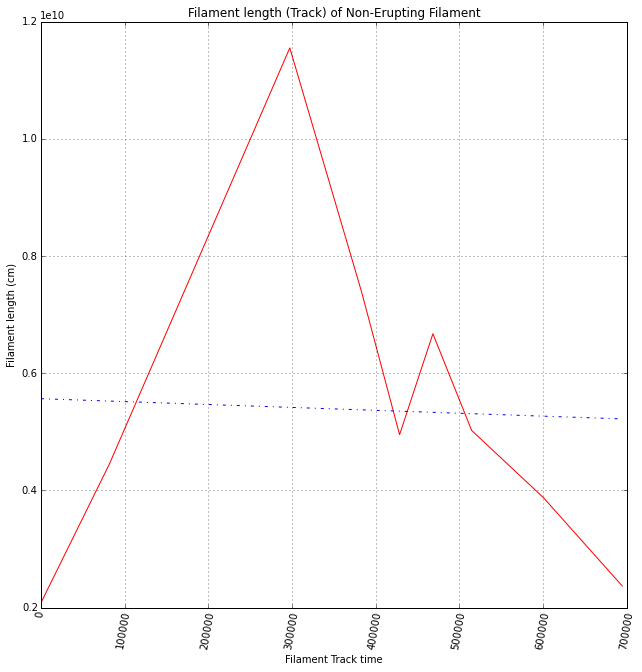

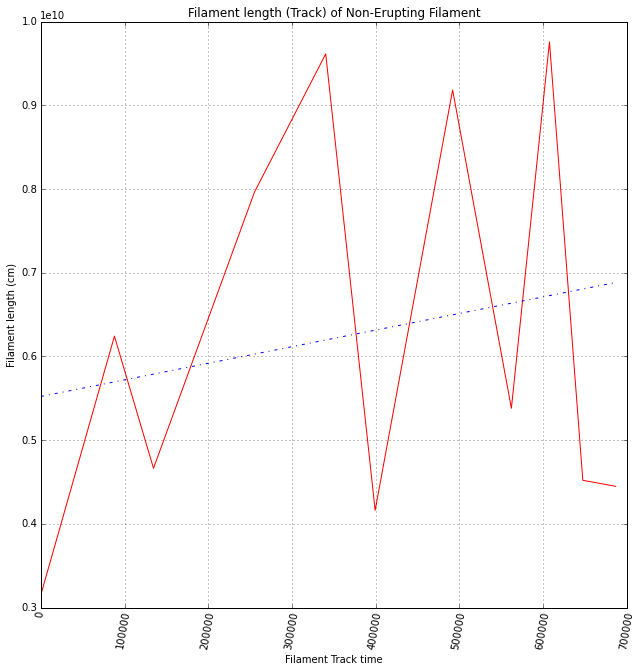

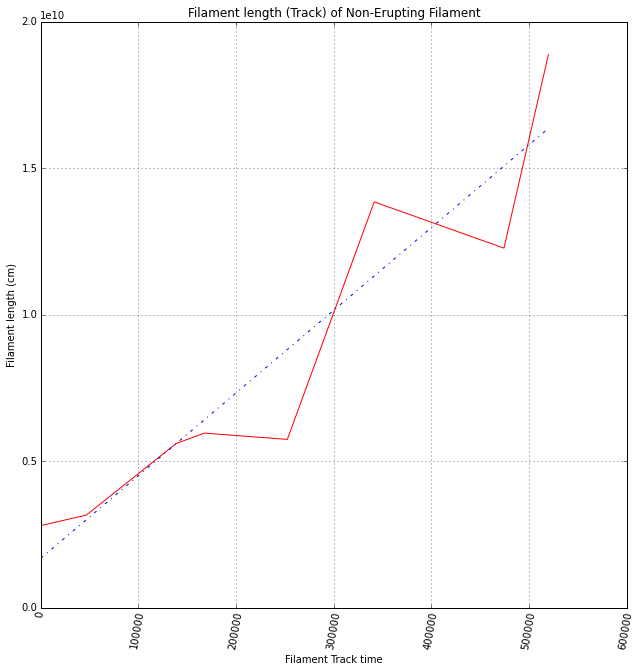

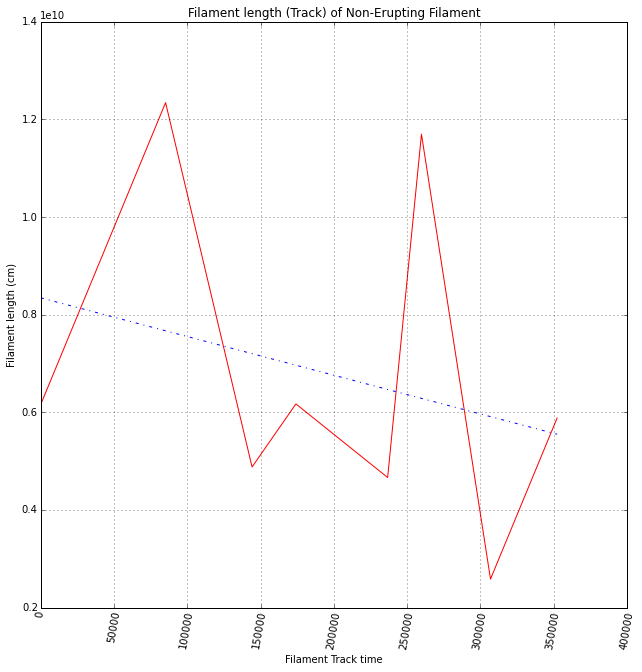

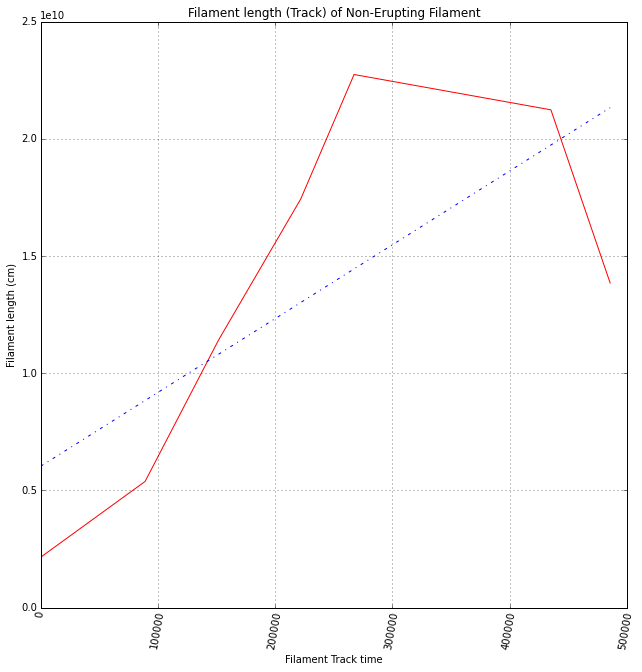

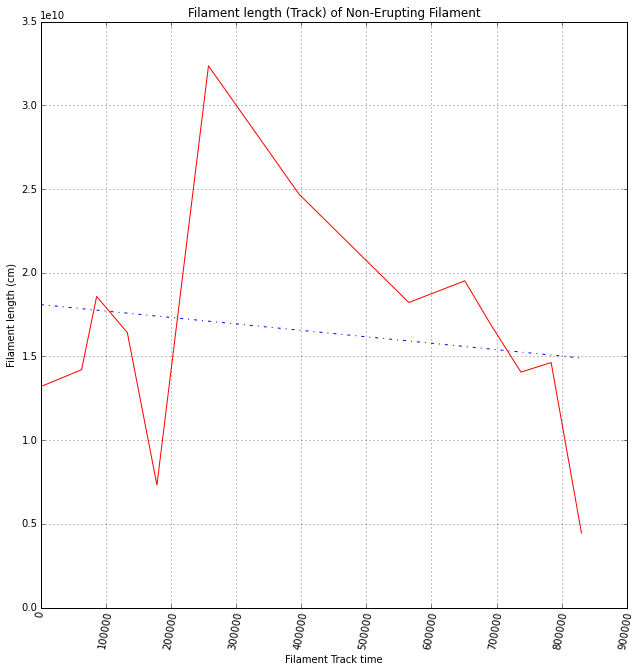

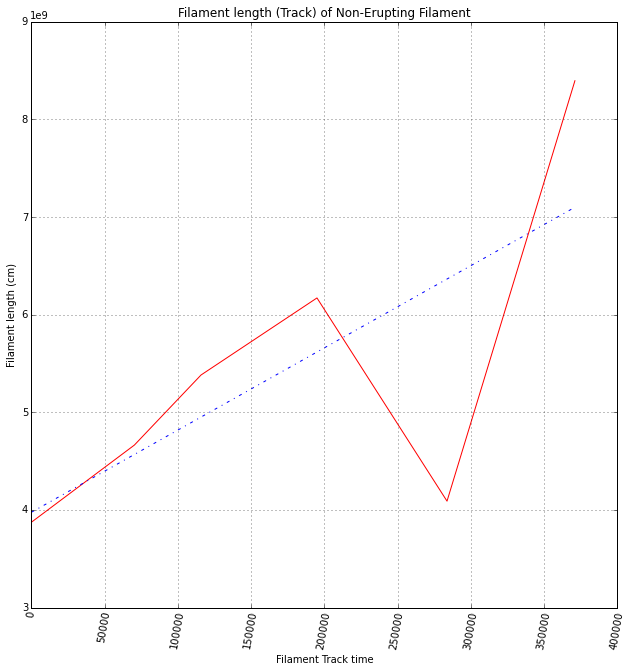

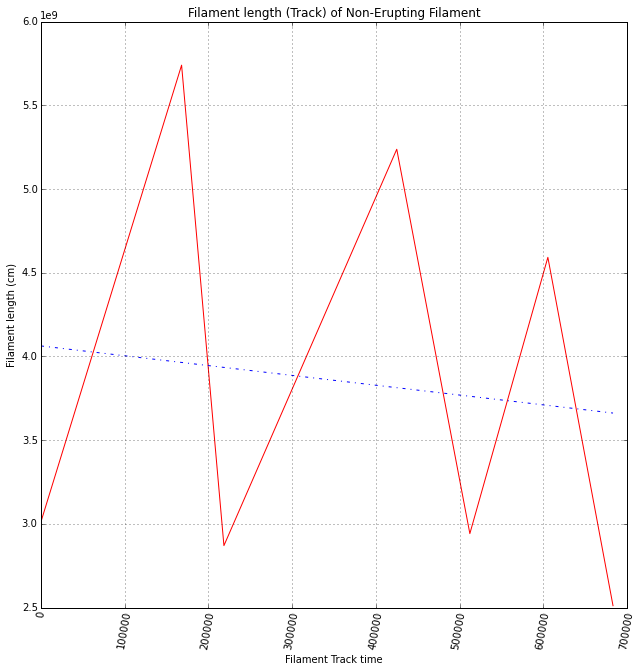

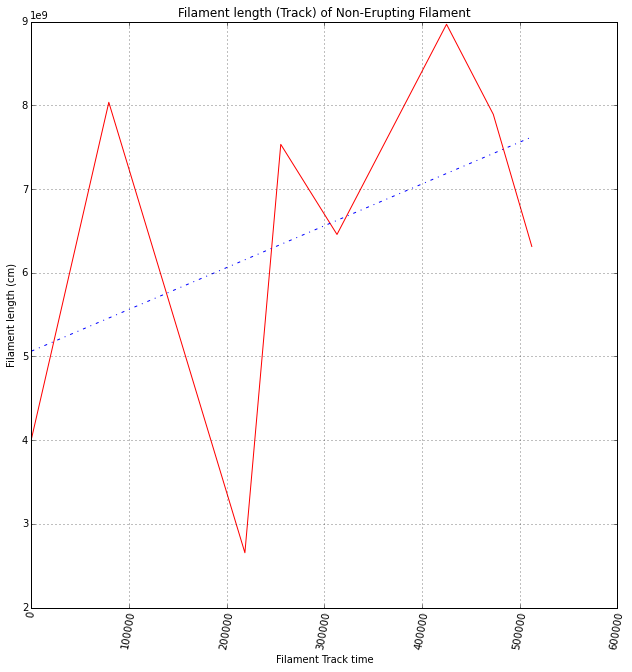

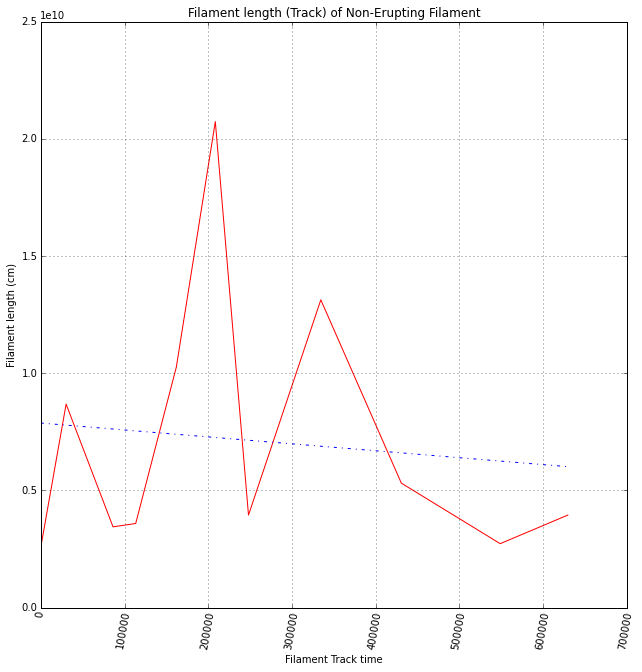

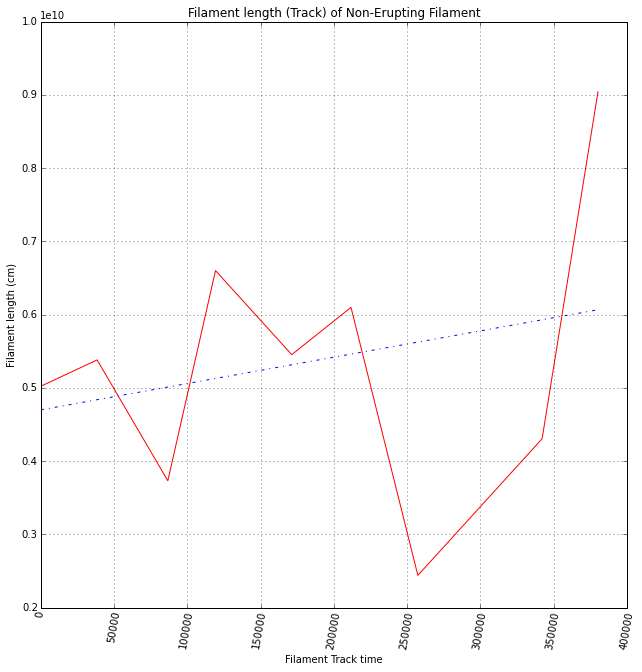

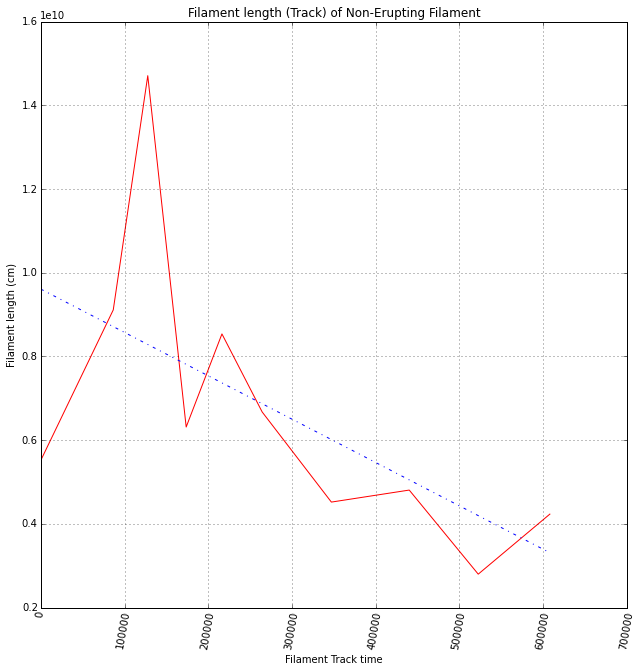

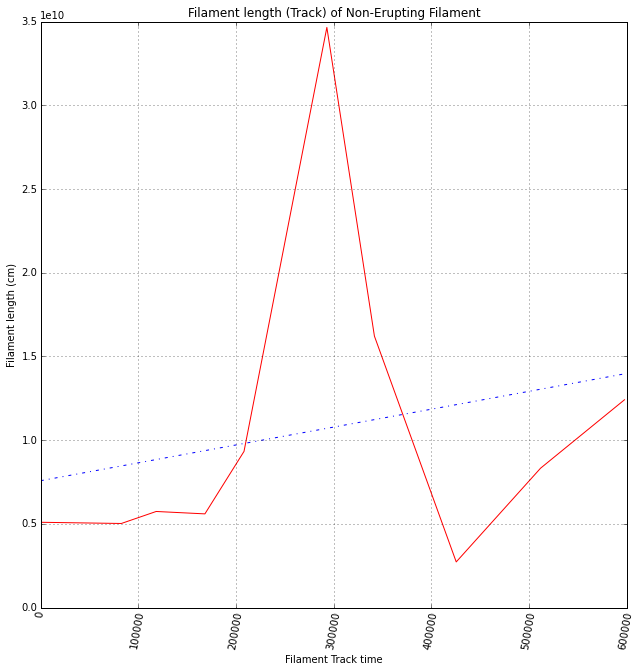

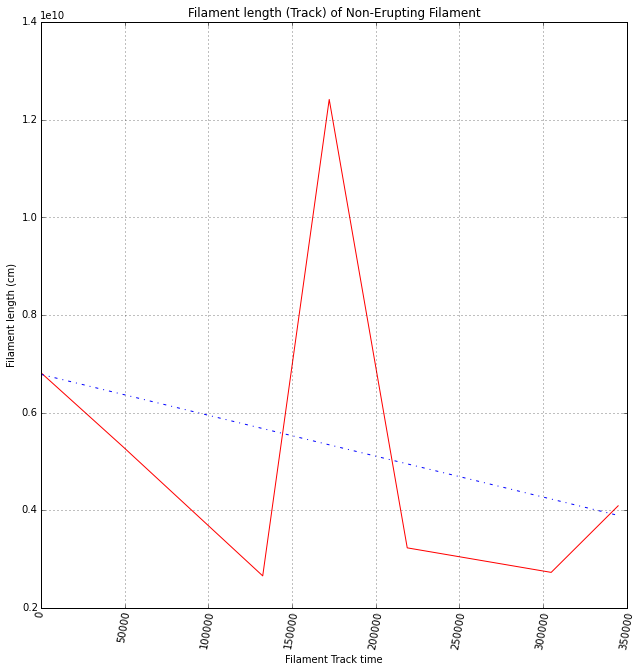

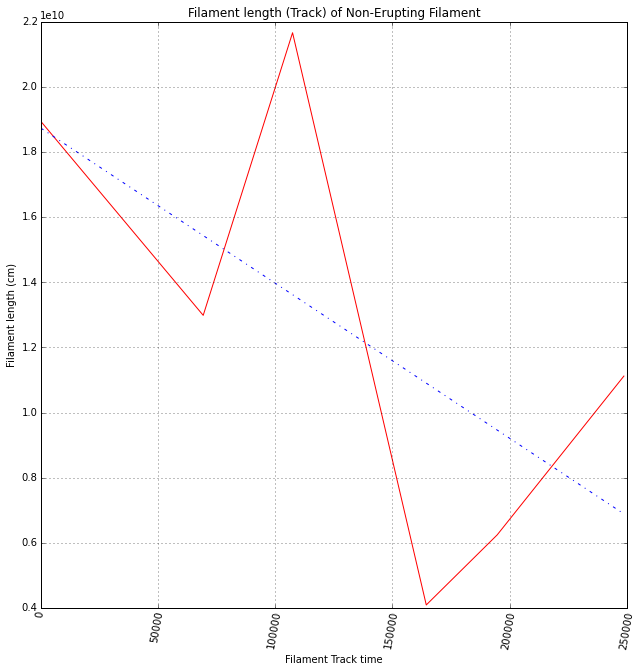

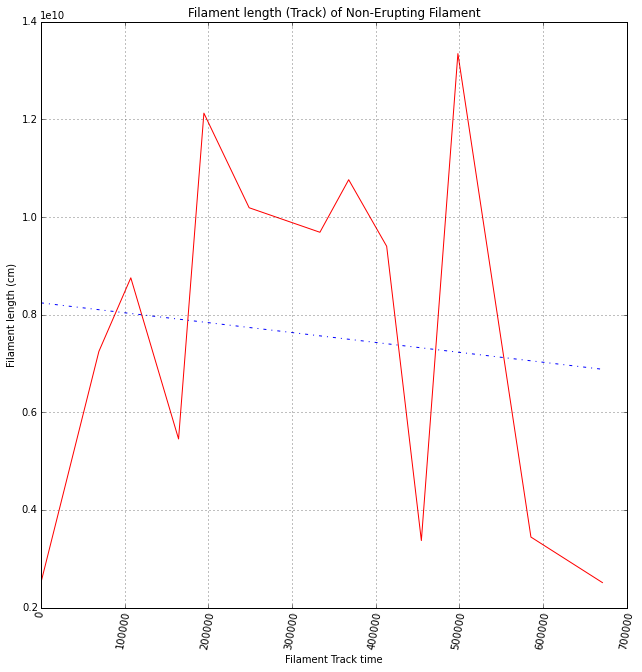

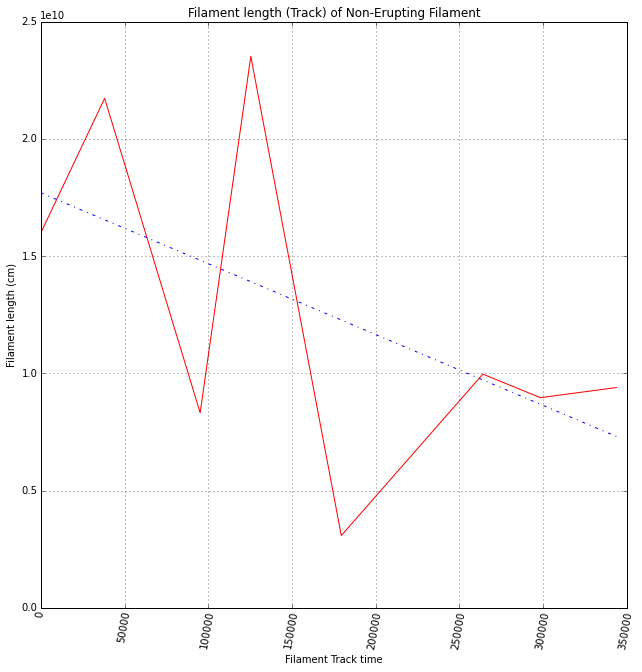

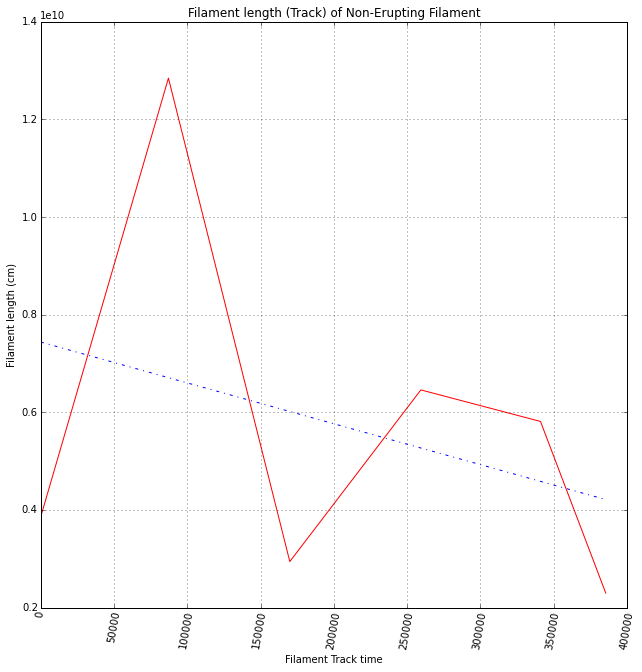

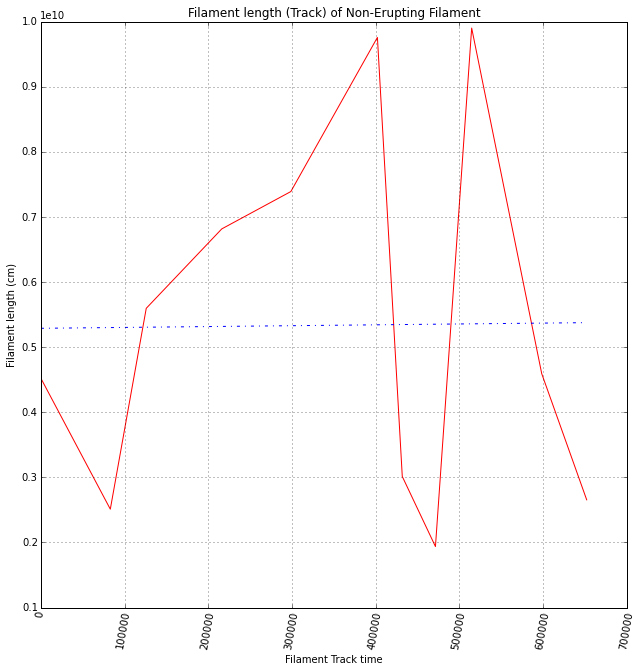

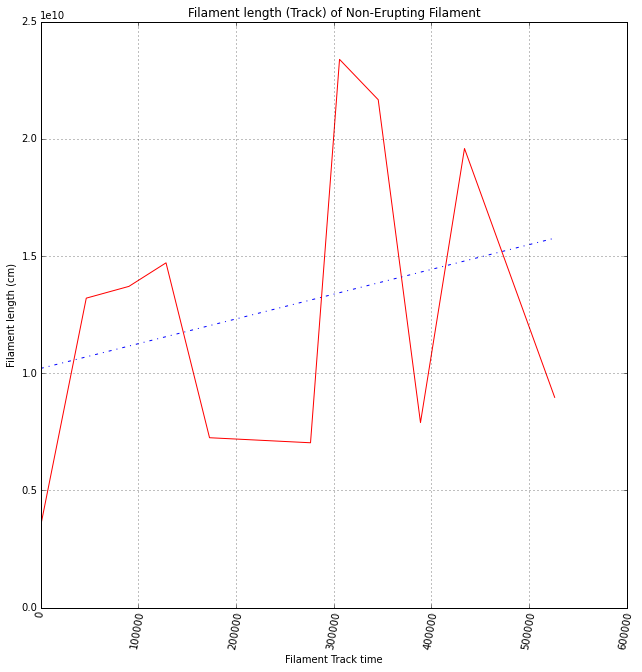

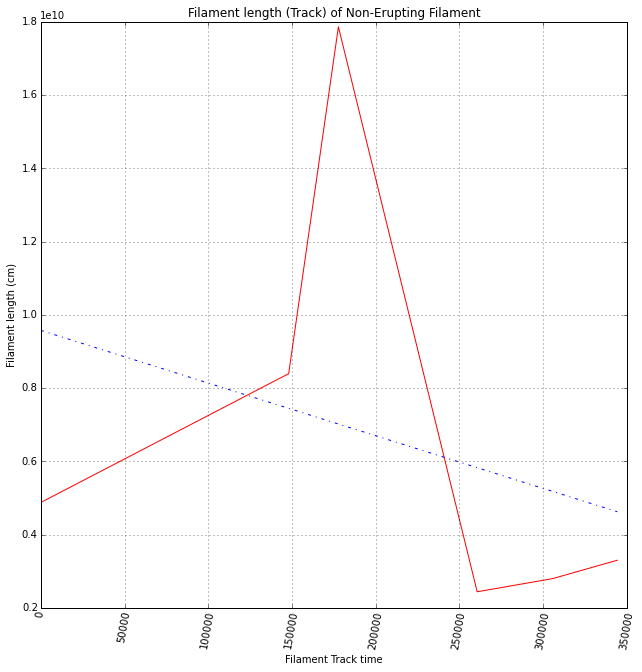

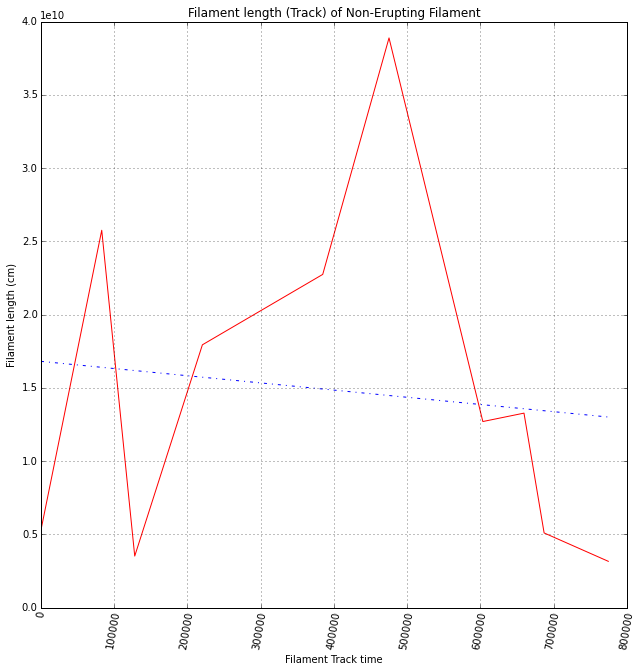

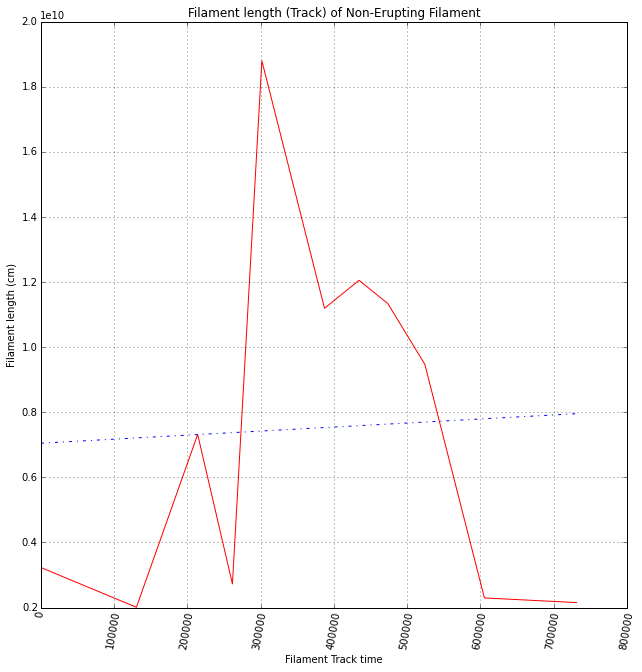

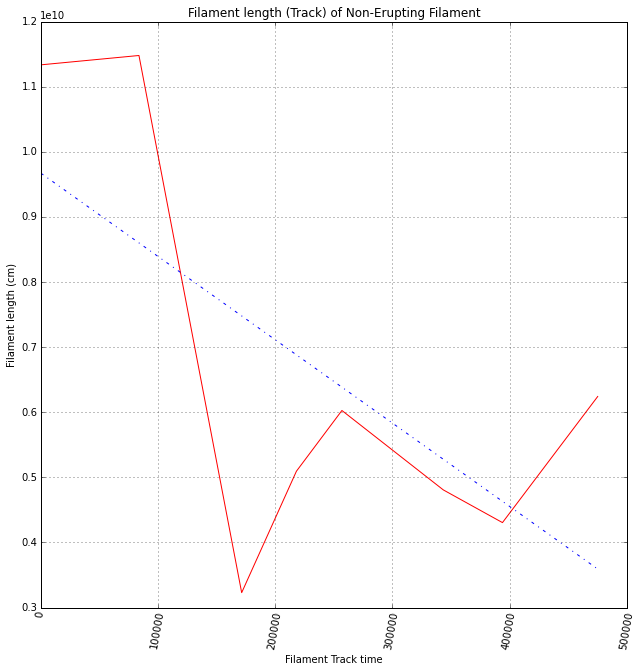

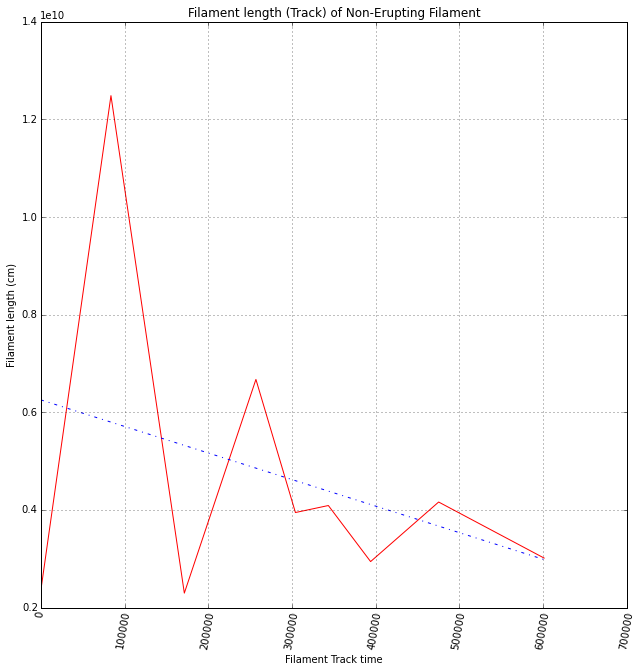

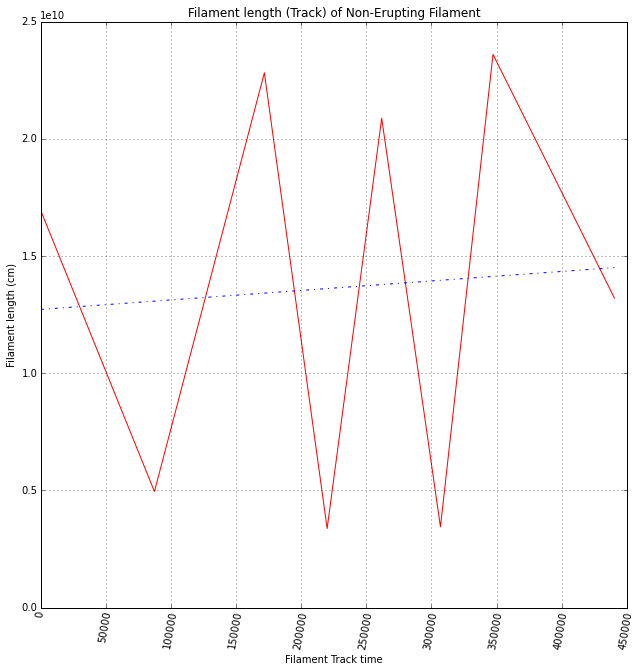

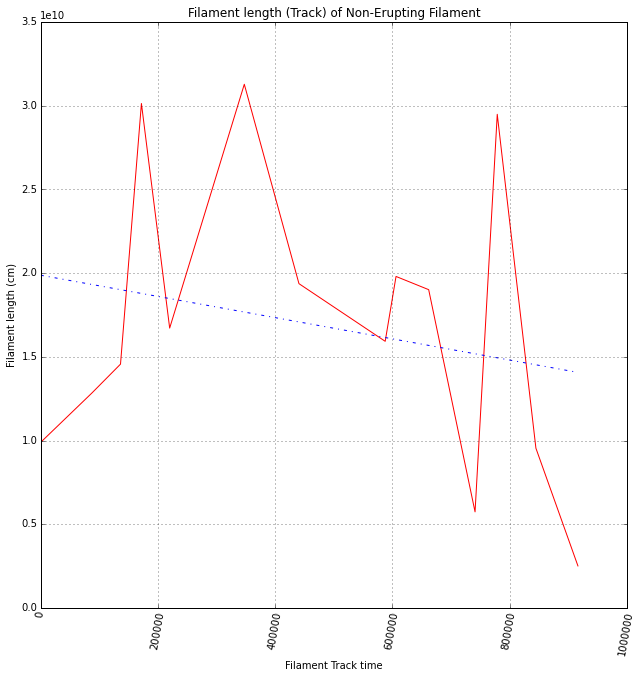

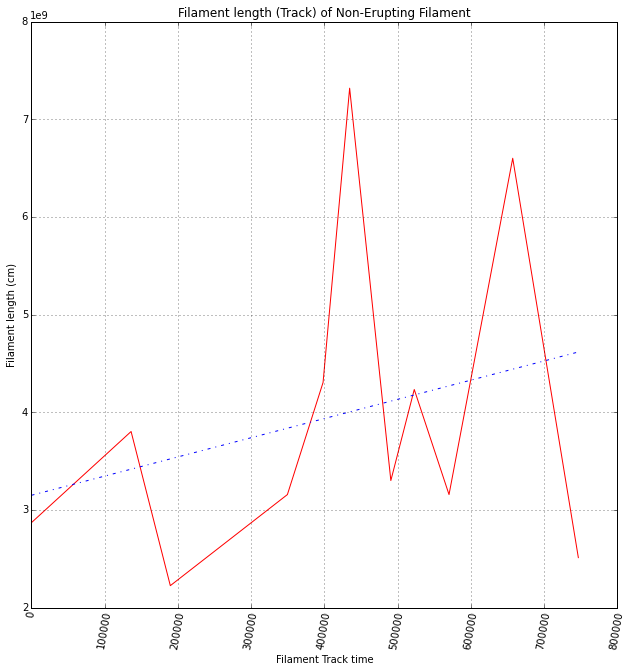

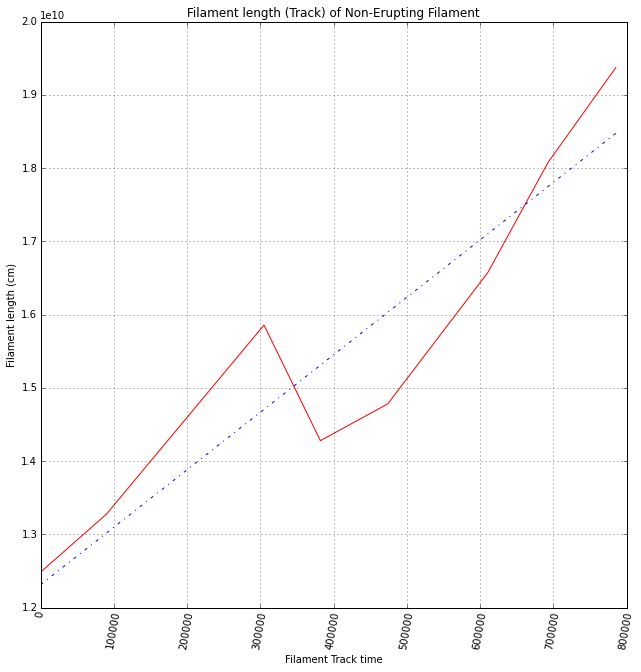

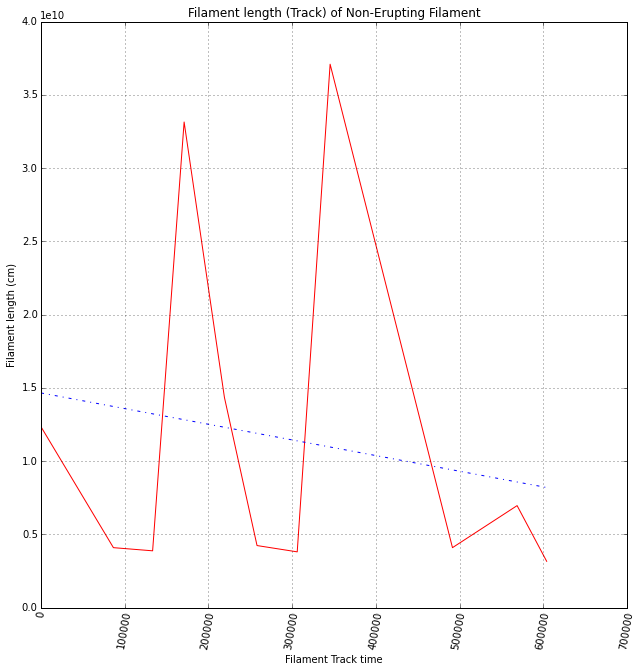

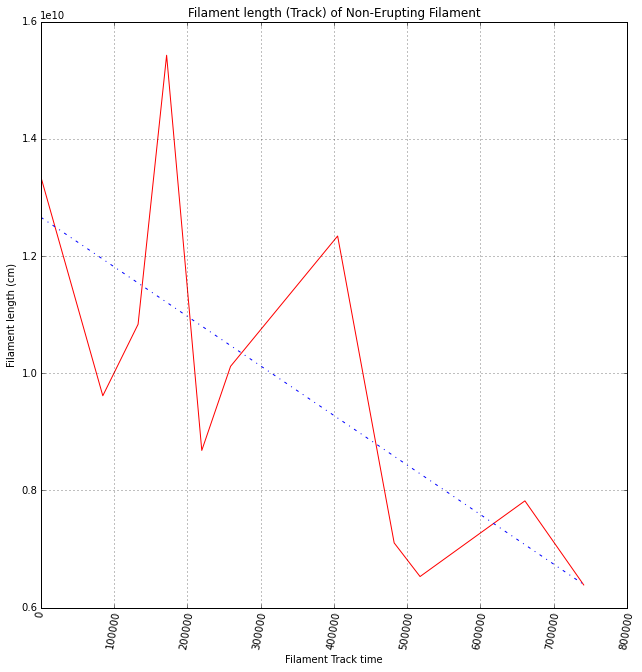

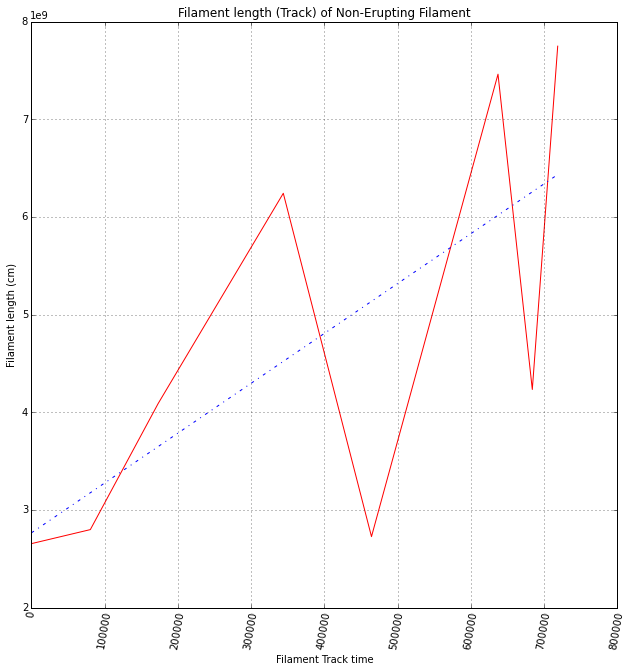

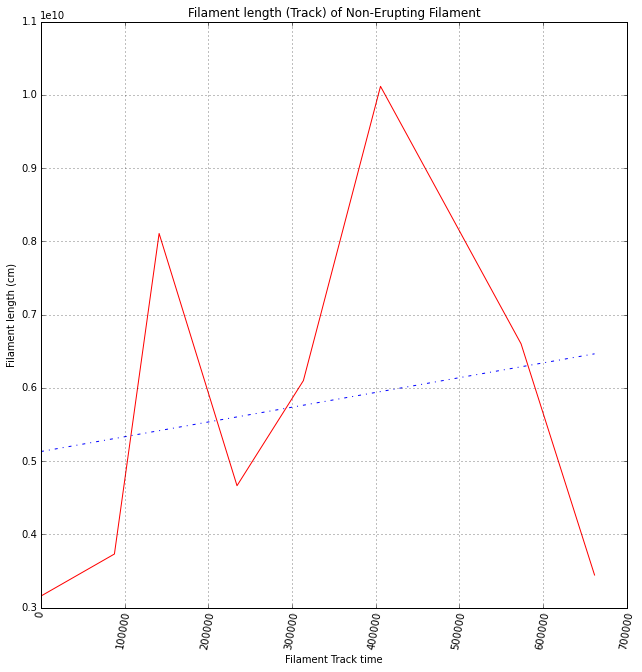

In [27]:
grouped_filaments = all_tracks_trans.groupby('Track No.')
len_slopes = []
for name, group in grouped_filaments:
    t_delt = group['time_delta']
    f_len = group['fi_length']
    fit = np.polyfit(t_delt, f_len,1)
    len_slopes = len_slopes + [fit]*len(f_len) 
    plot_slopes(t_delt,f_len,fit[0],fit[1])


In [28]:
len_slopes_only = [item[0] for item in len_slopes]

all_tracks_trans['len_fits'] = len_slopes
all_tracks_trans['len_slope'] = len_slopes_only
all_tracks_trans.head()

/usr/local/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Track No.    fi_length             HEK_time  fi_chirality  fi_tilt  \
149         64  19229714400  2012-01-06 18:05:45             0  70.7404   
150         64  22673801200  2012-01-07 09:33:12            -1  76.3383   
151         64  21741021200  2012-01-08 08:28:28             0  67.0859   
152         64  18870927400  2012-01-09 11:08:54            -1  73.8154   
153         64  12987221000  2012-01-10 18:23:00             0 -53.1533   

            area  fi_barbstot        xcen        ycen  time_delta  \
149  7662.162092            3 -879.333984  299.819000           0   
150  5797.861380            6 -809.905029  300.821991       55647   
151  6053.765348            3 -649.929016  324.964996      138163   
152  4029.099151            2 -455.740997  328.979004      234189   
153   954.909216            4  125.750999  465.782990      346635   

                            len_fits     len_slope  
149  [-37783.8341693, 24021142545.2] -37783.834169  
150  [-37783.8341693, 24021142545.2] -37783.834169  
151  [-37783.8341693, 24021142545.2] -37783.834169  
152  [-37783.8341693, 24021142545.2] -37783.834169  
153  [-37783.8341693, 24021142545.2] -37783.834169

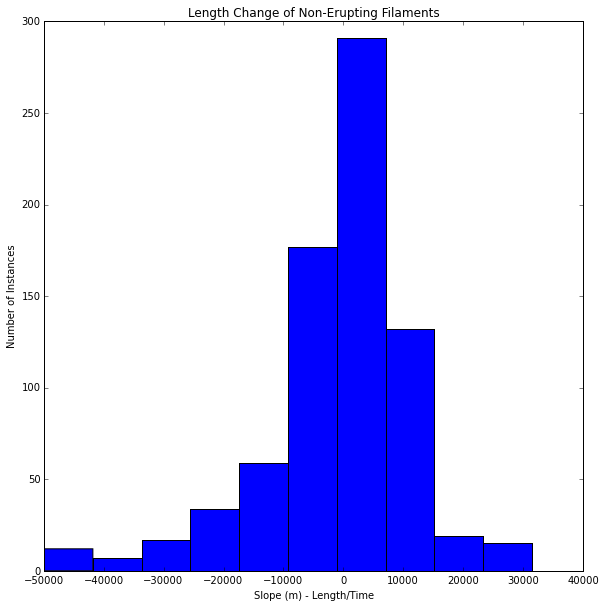

In [29]:
n_groups=5

plt.xlabel('Slope (m) - Length/Time')
plt.ylabel('Number of Instances')
plt.title('Length Change of Non-Erupting Filaments')
fig1 = plt.gcf()
fig1.set_size_inches(8.5,8.5)
plt.hist(len_slopes_only)
plt.tight_layout()
plt.show()

#Find the Change in Area for each Filament

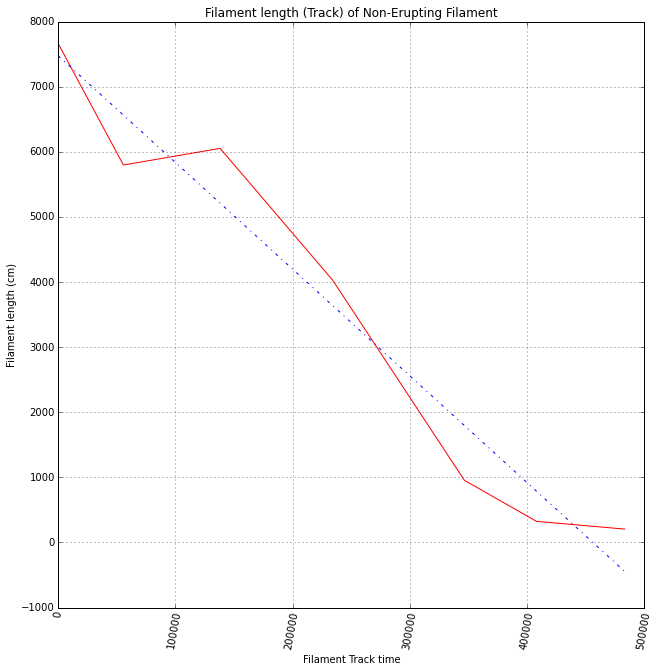

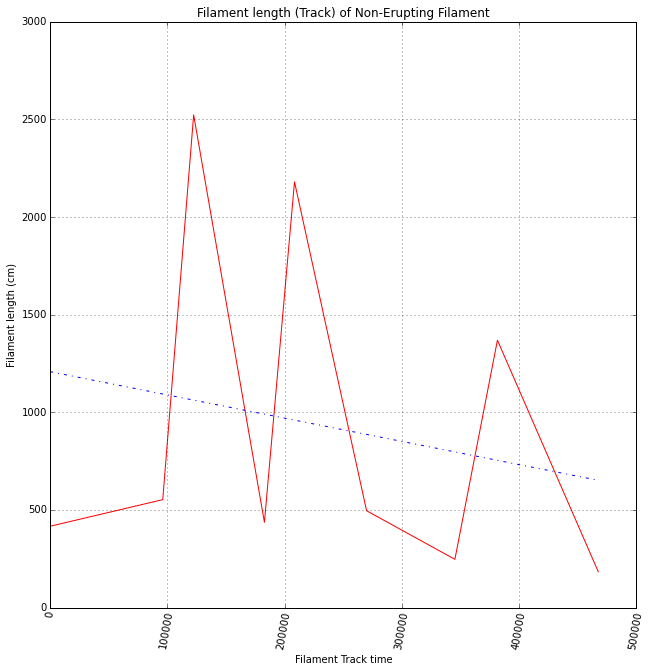

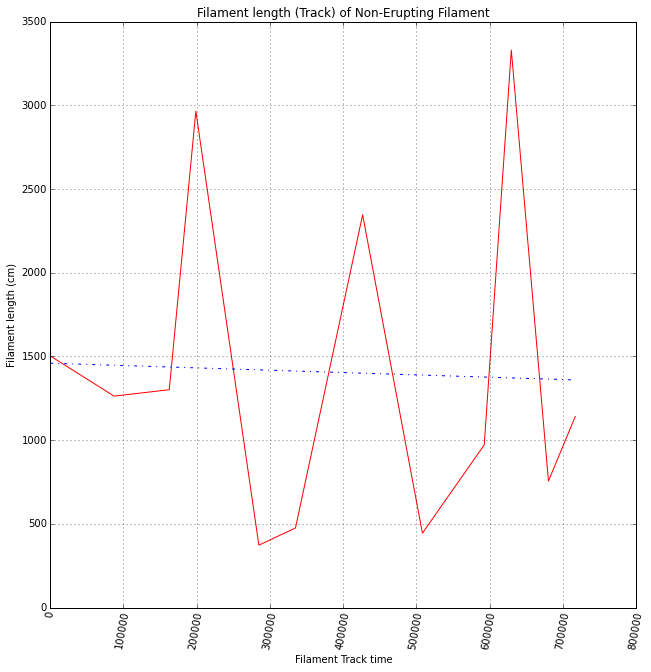

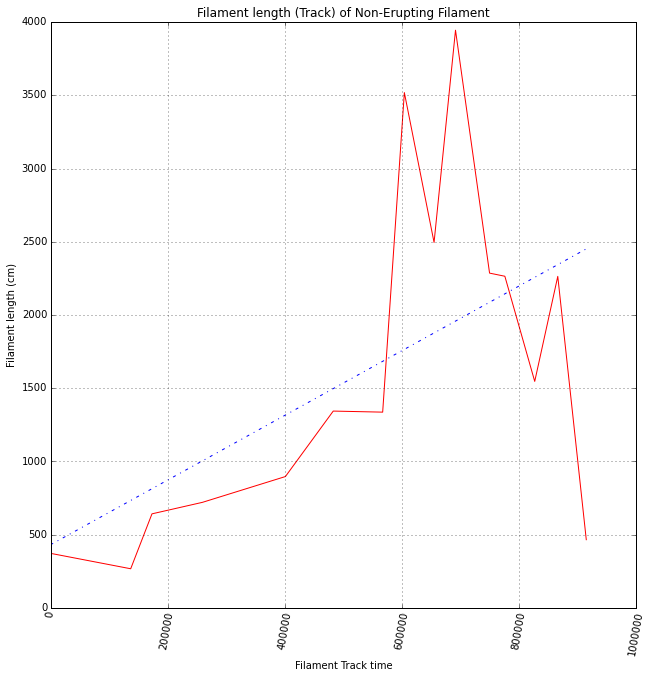

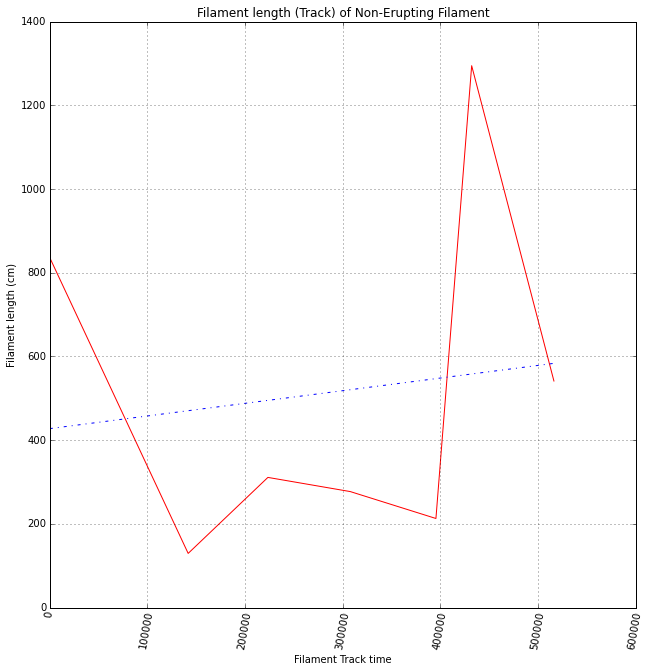

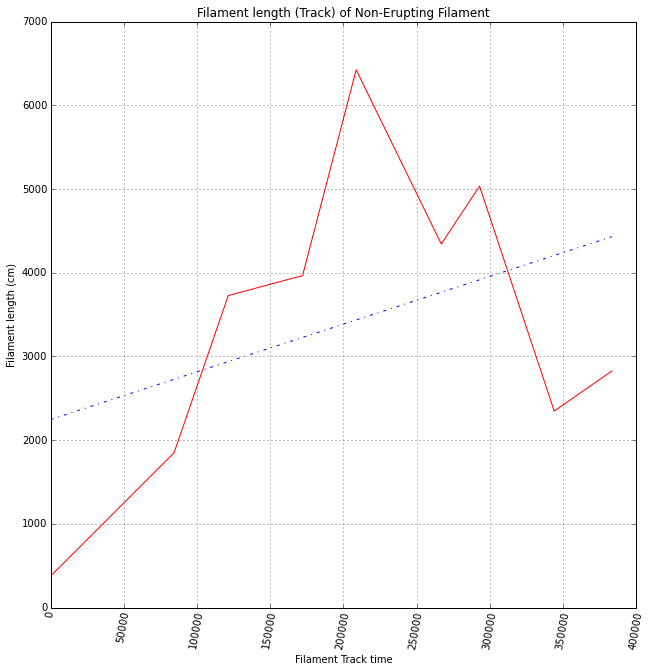

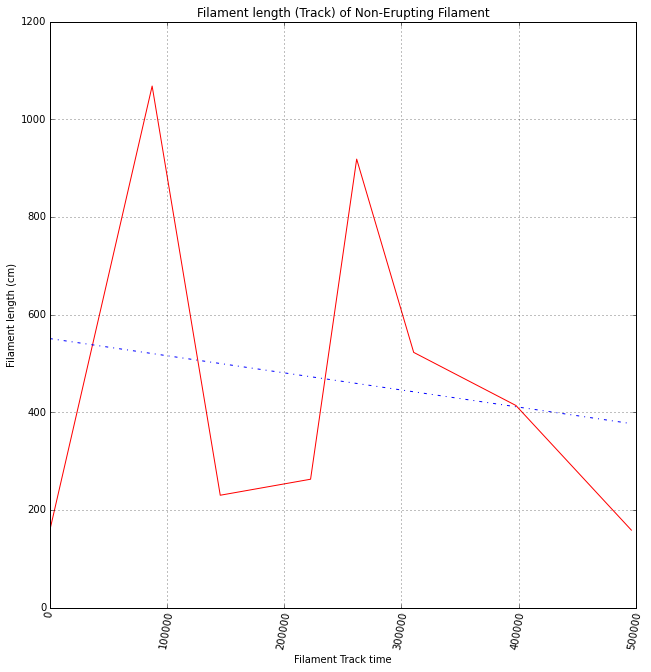

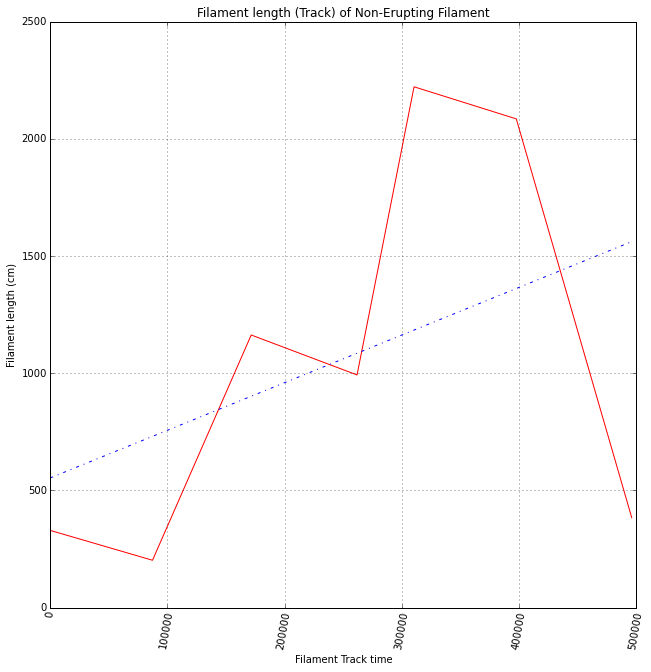

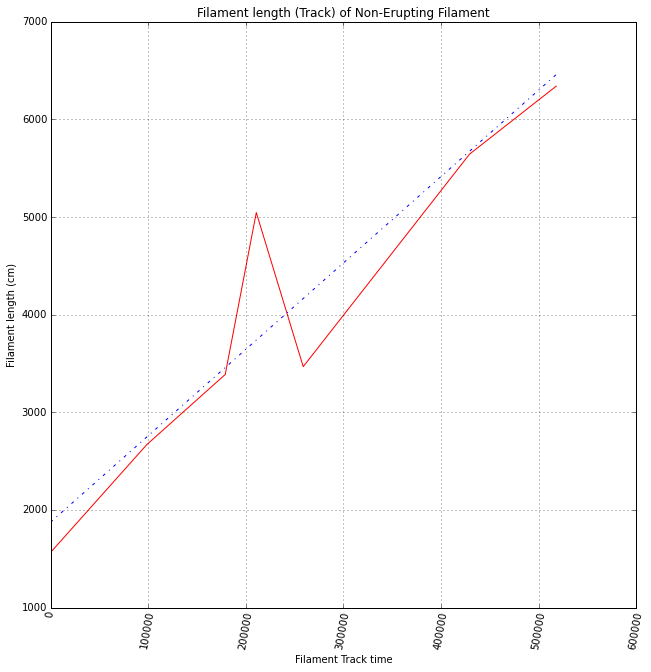

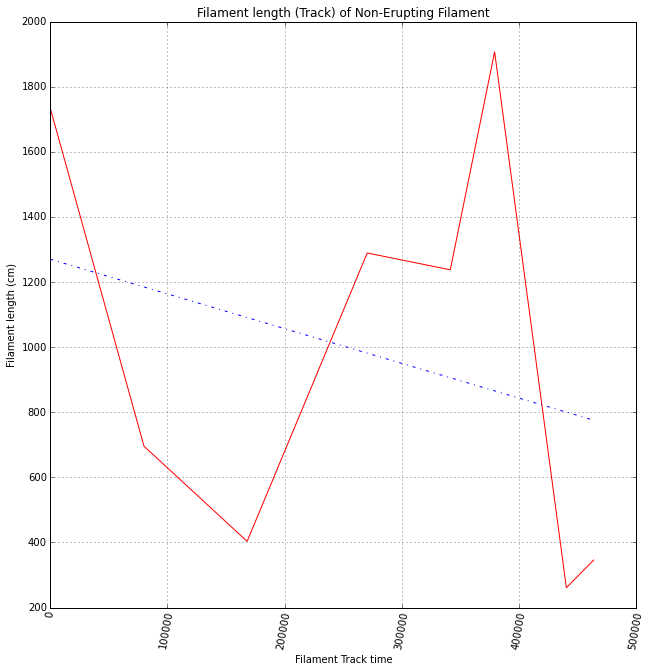

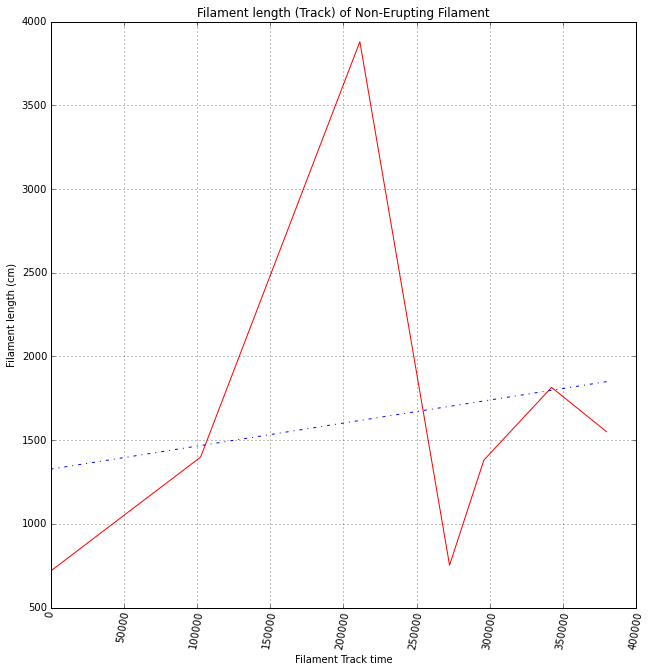

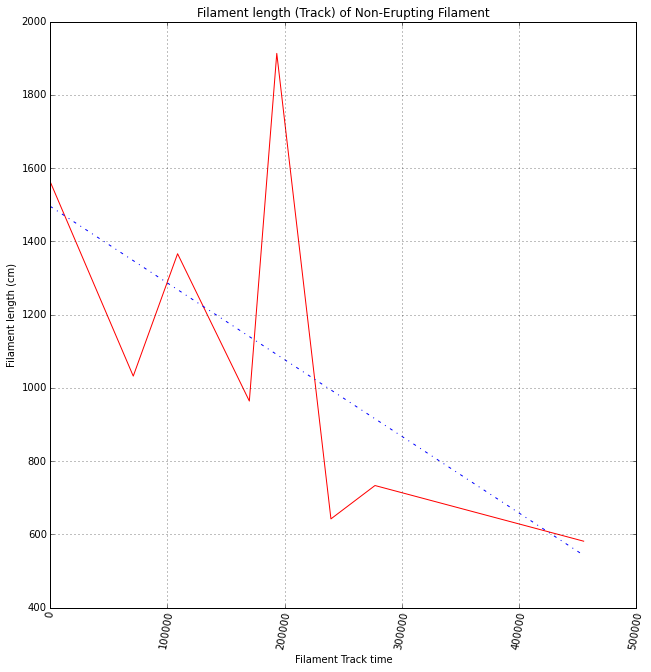

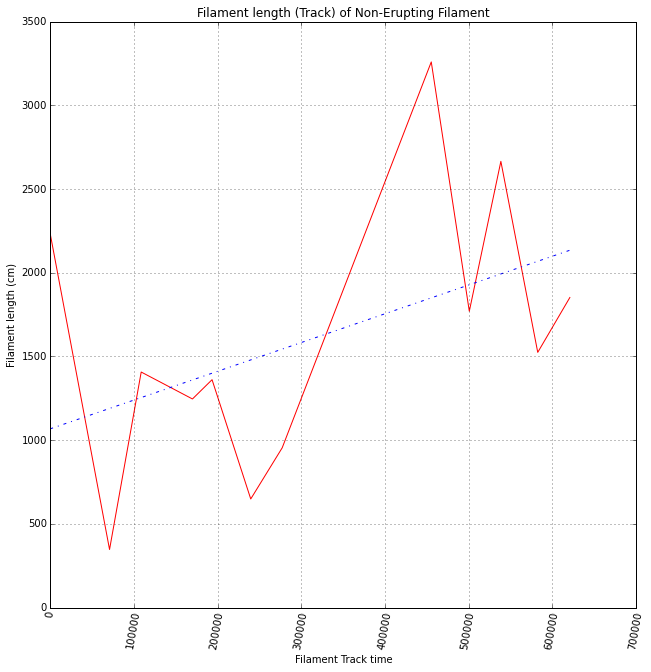

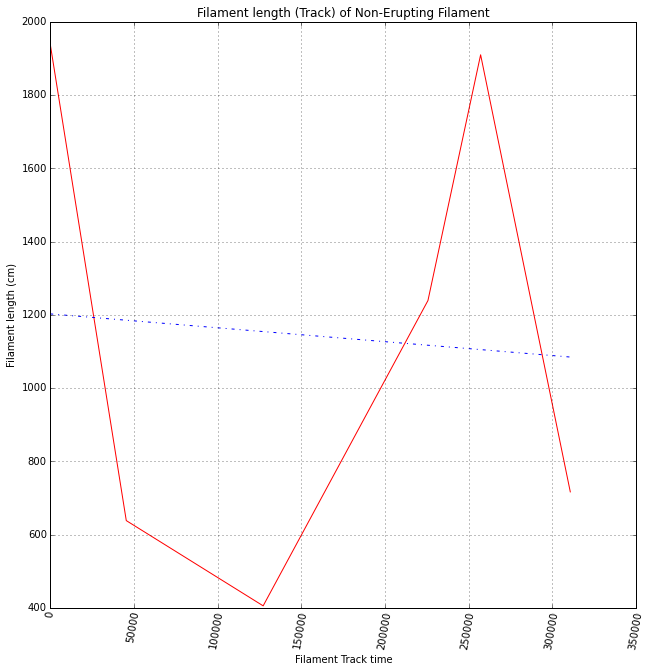

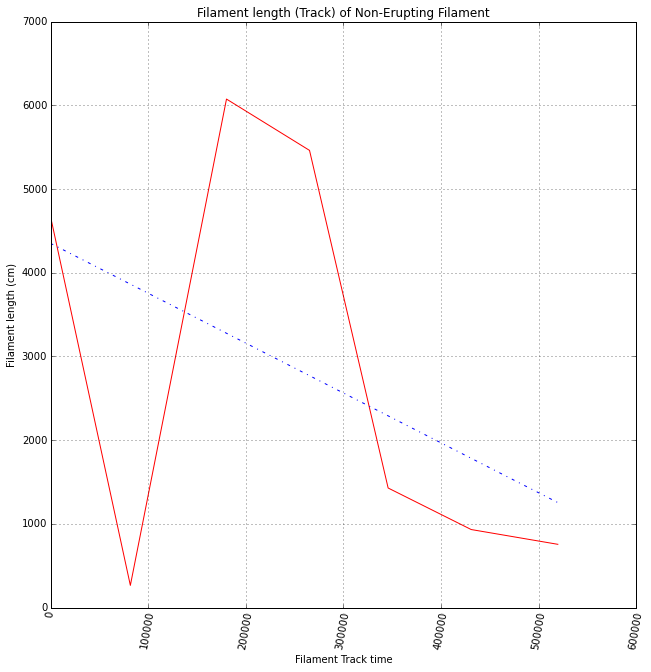

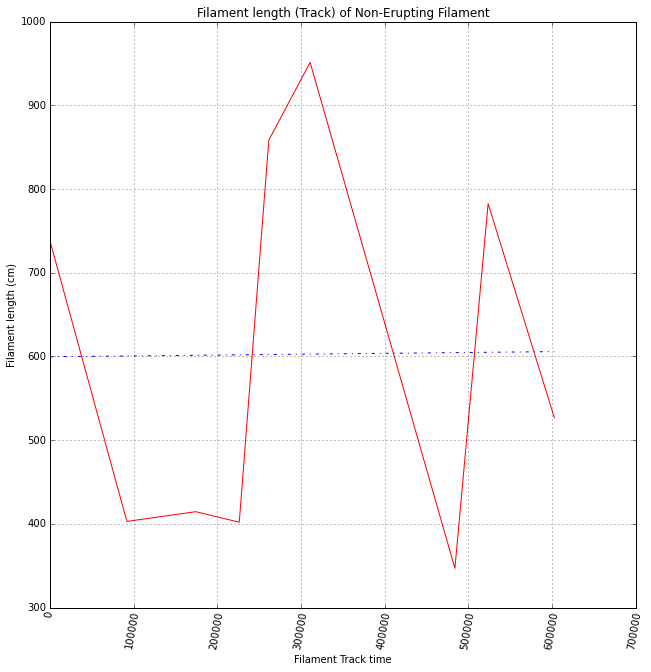

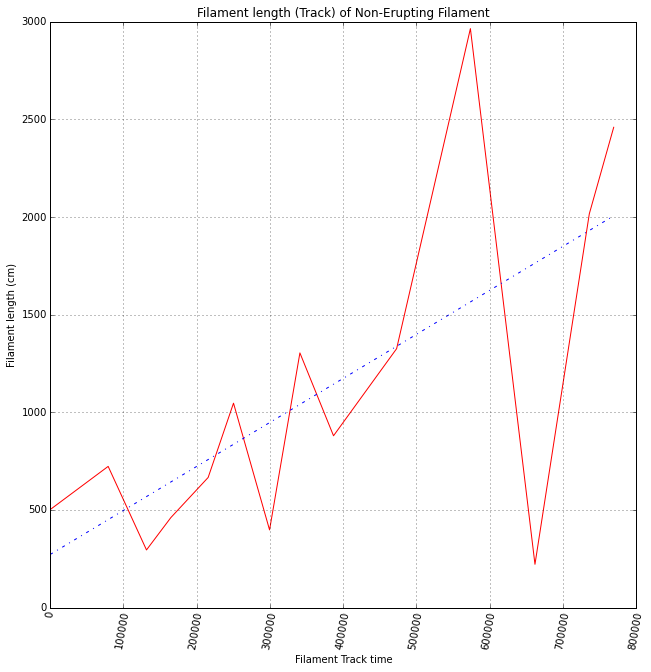

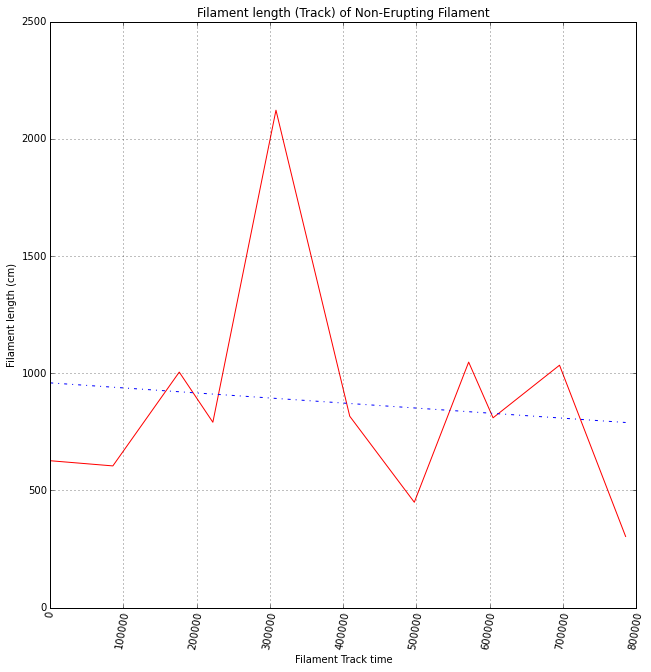

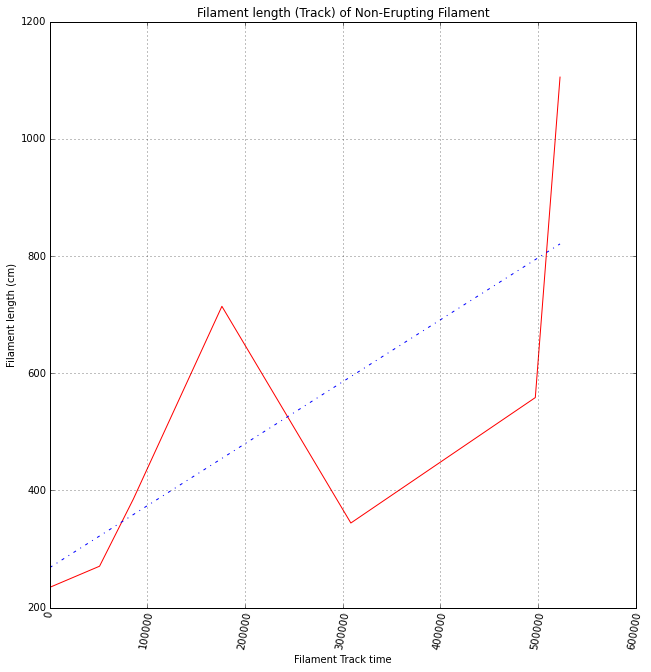

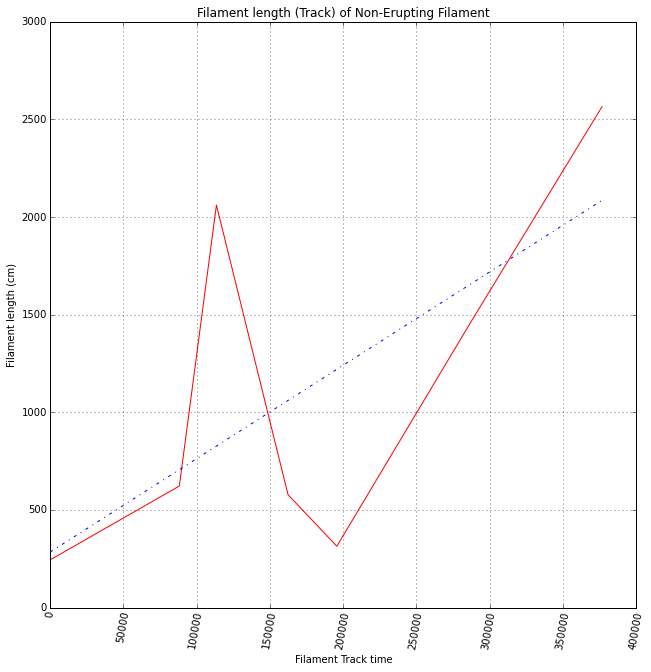

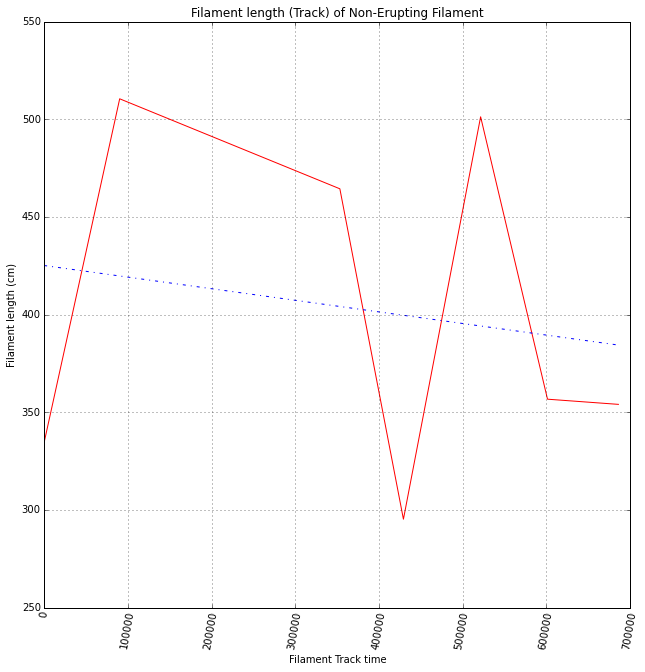

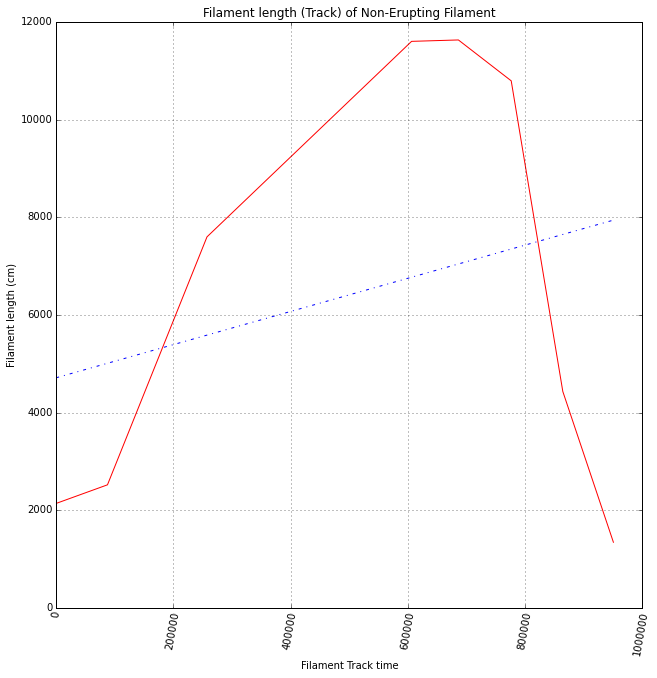

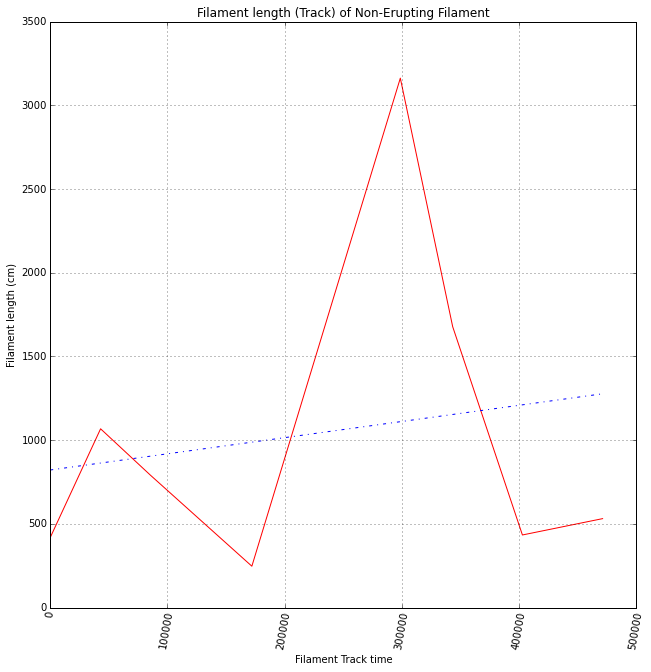

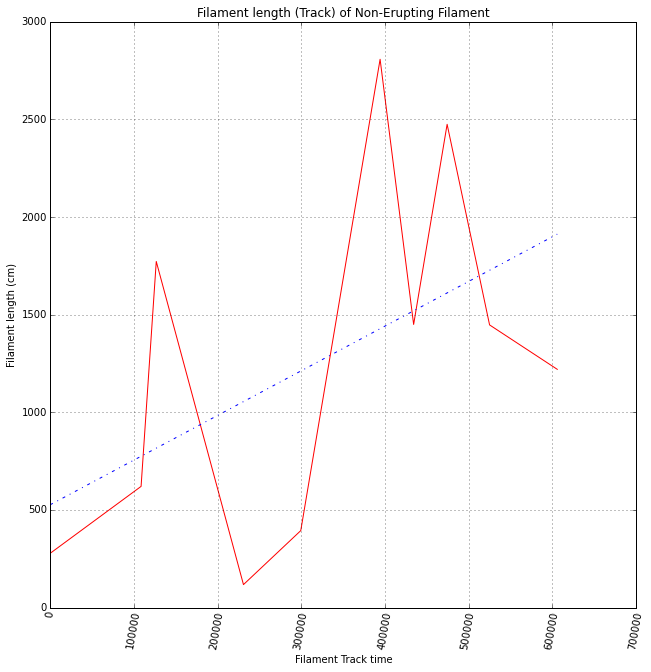

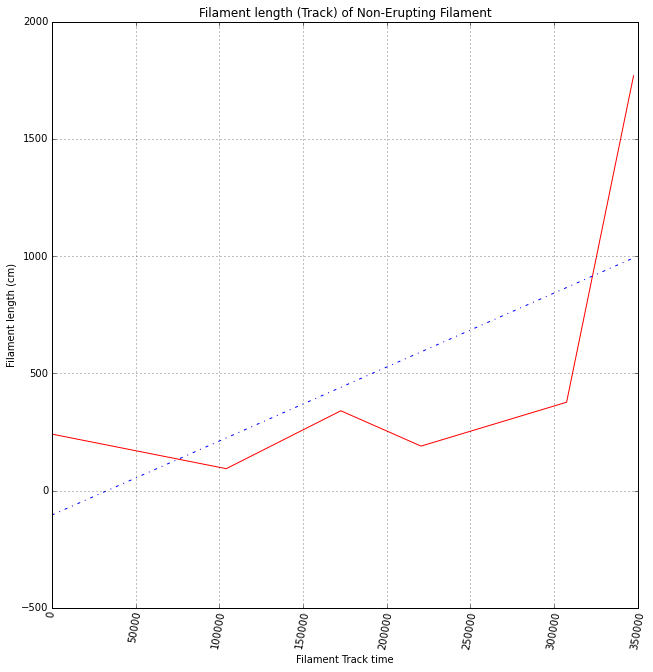

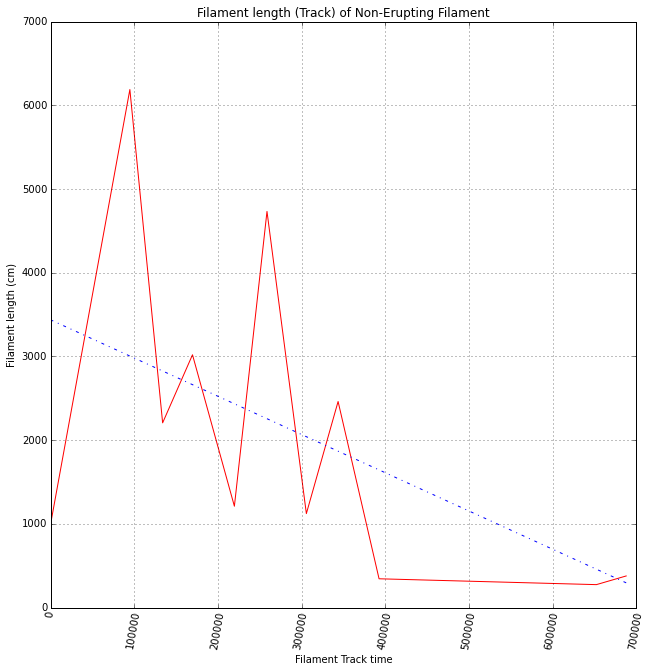

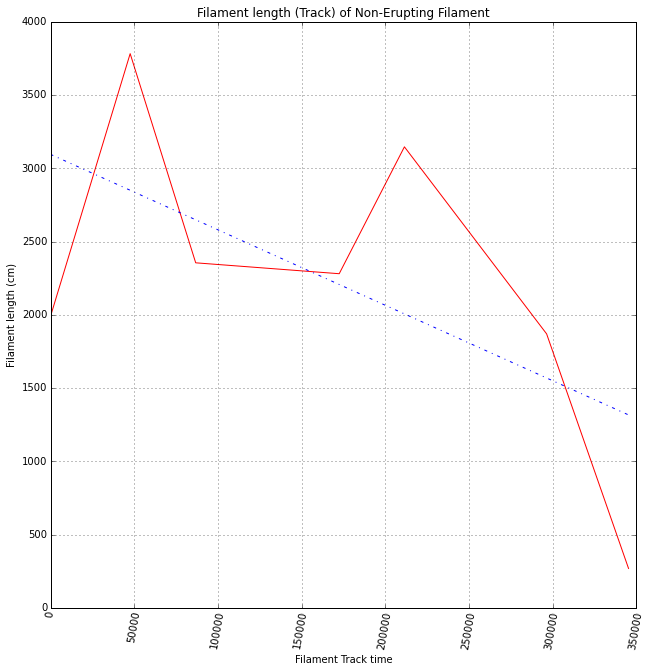

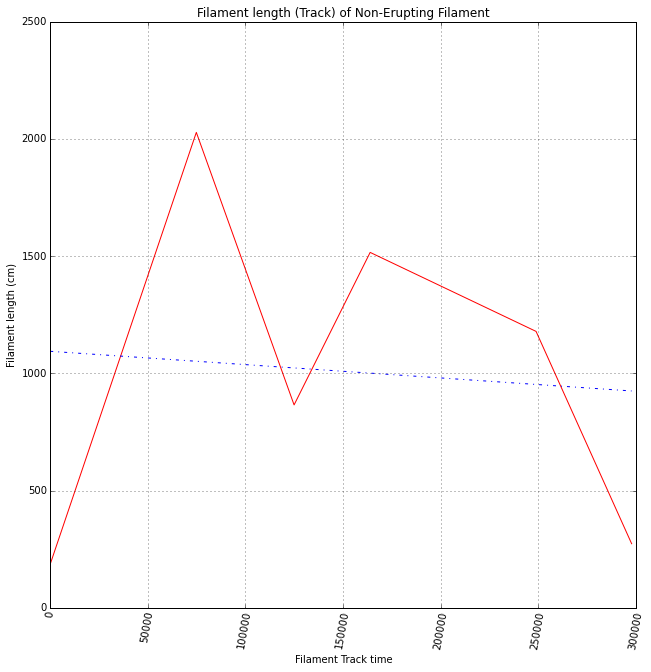

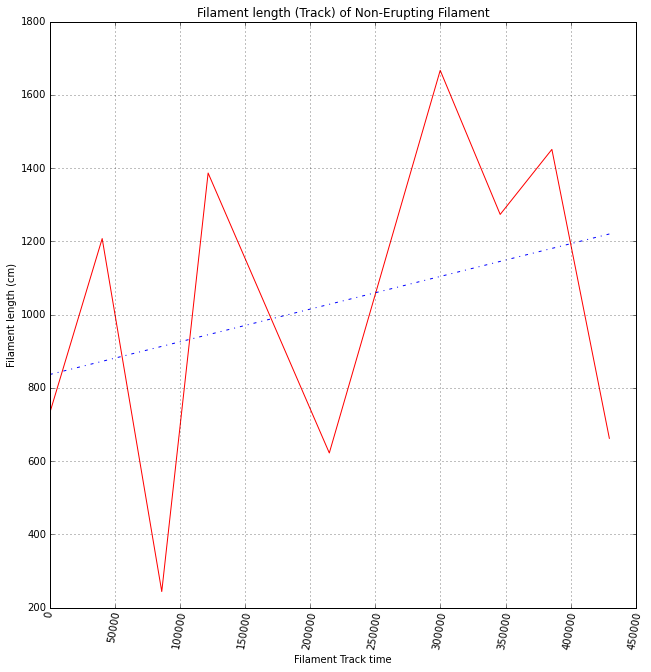

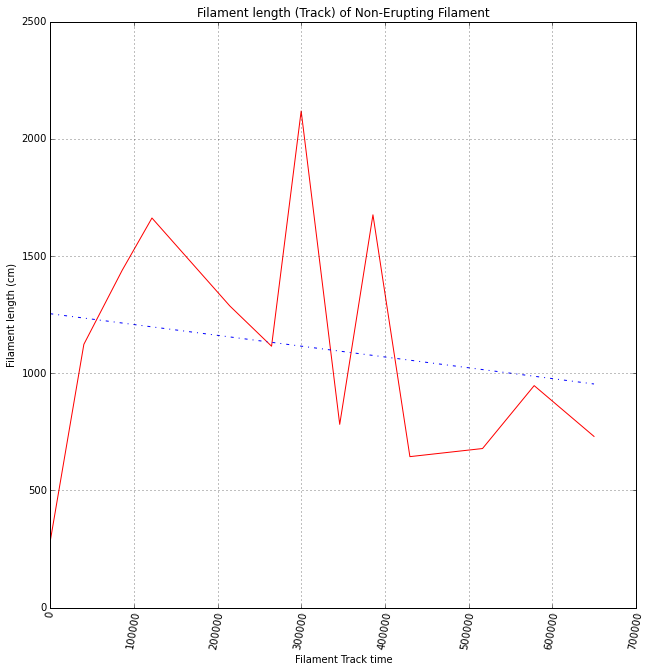

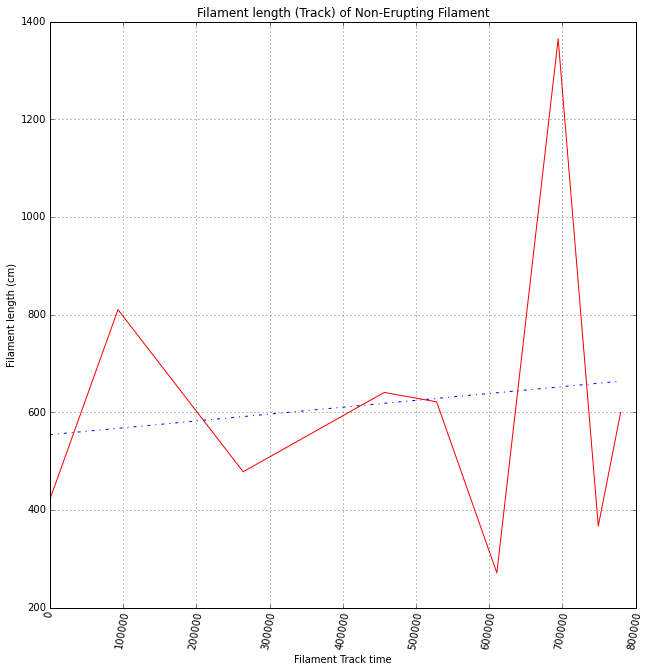

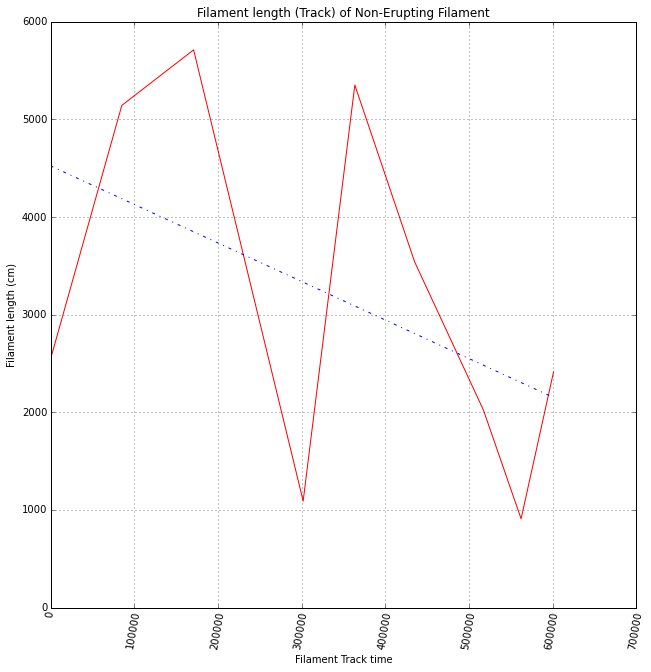

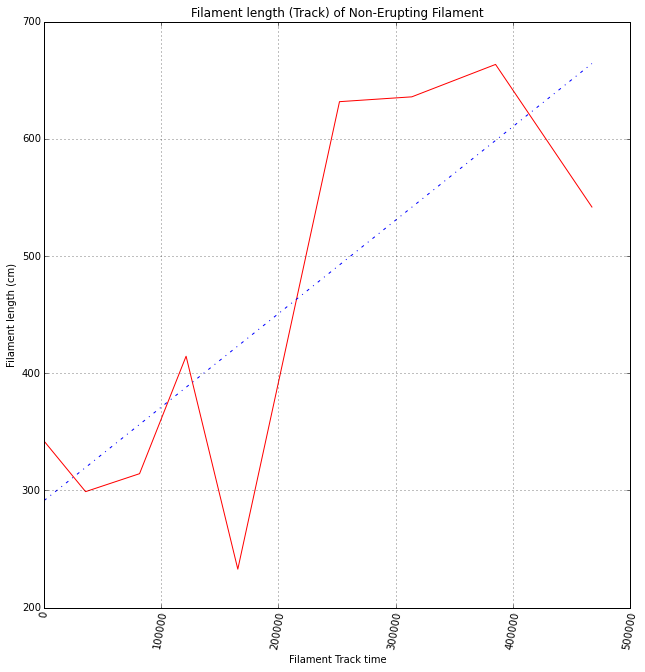

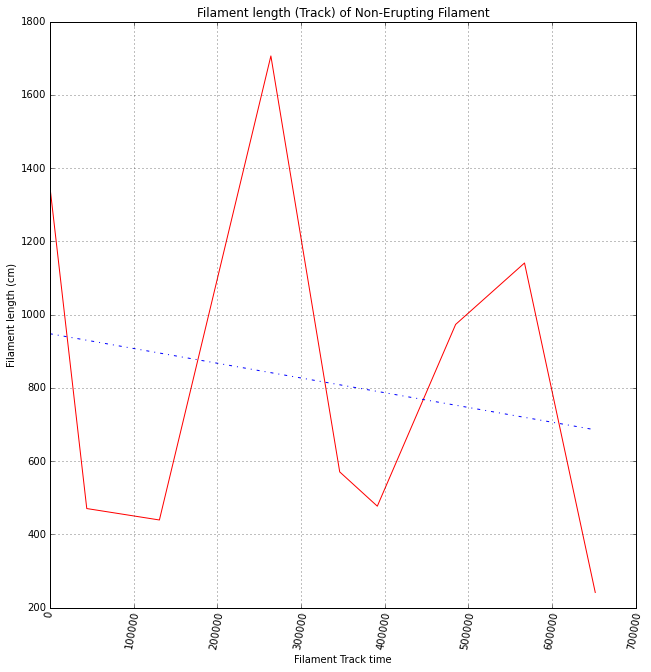

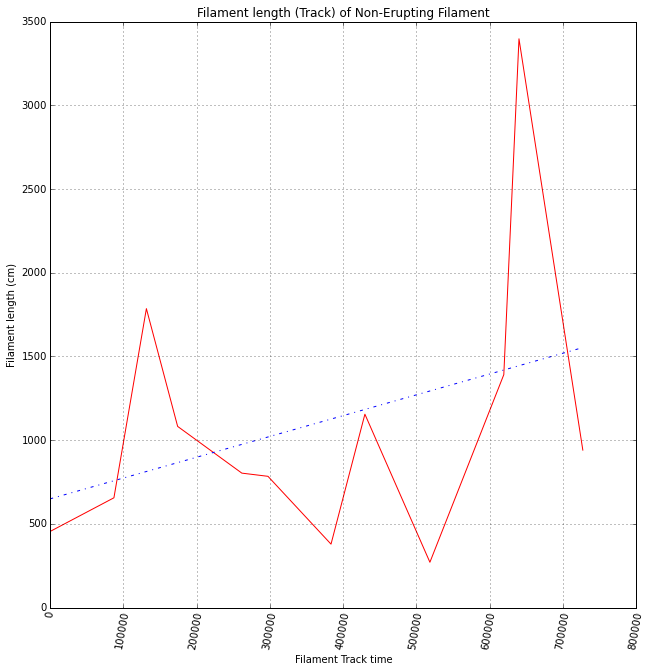

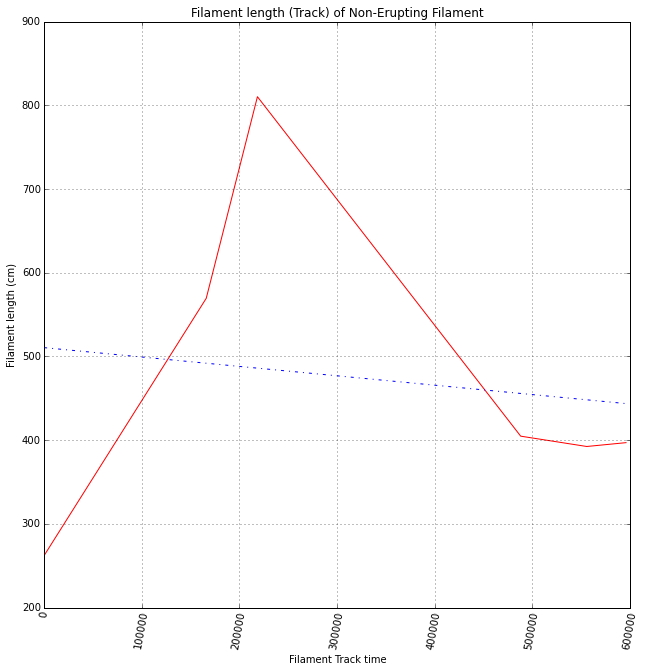

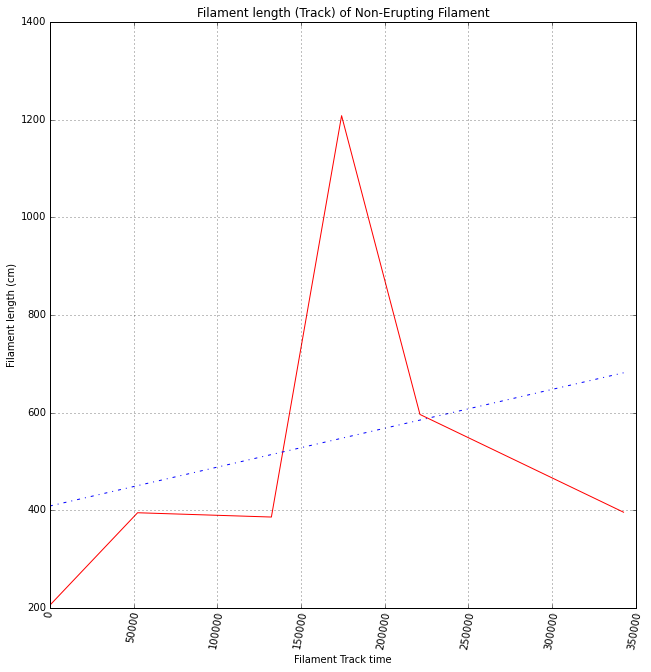

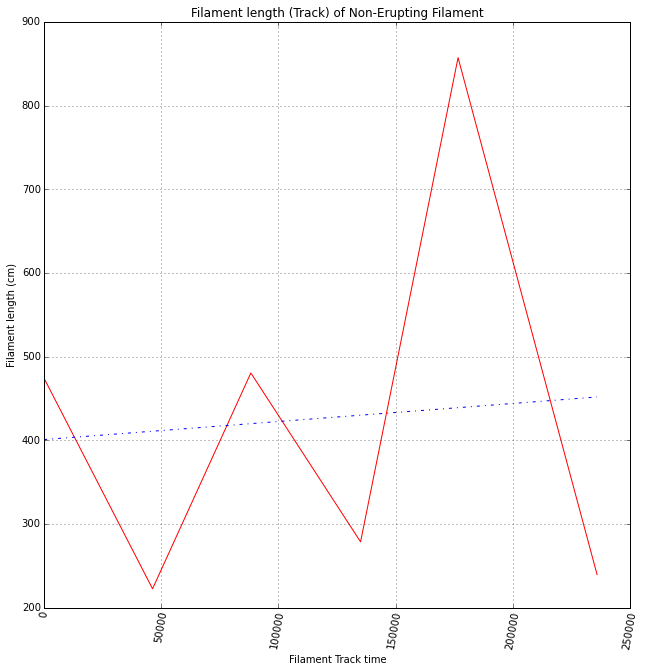

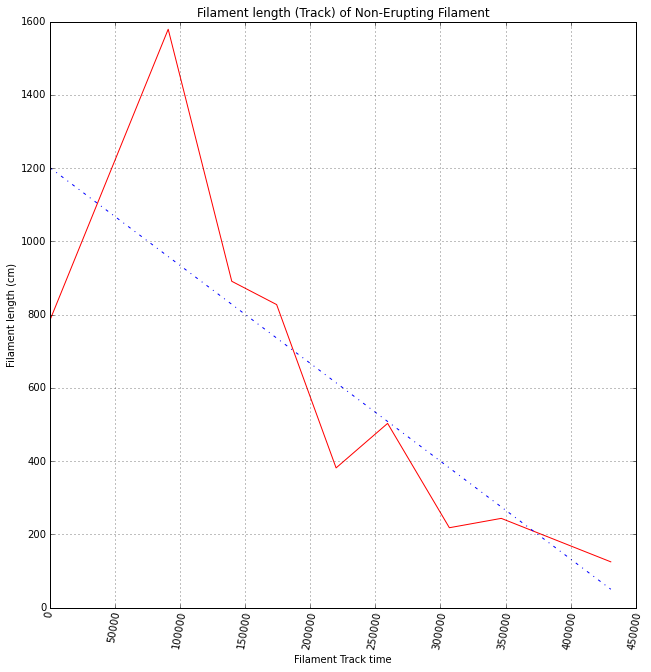

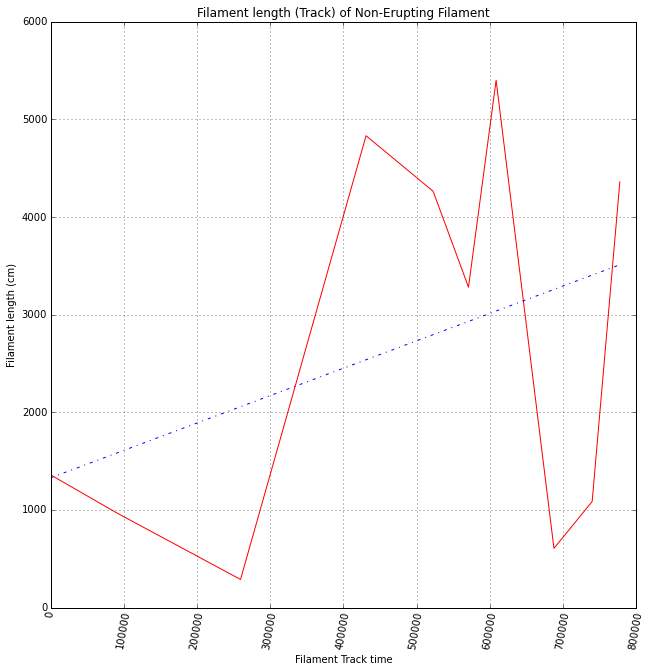

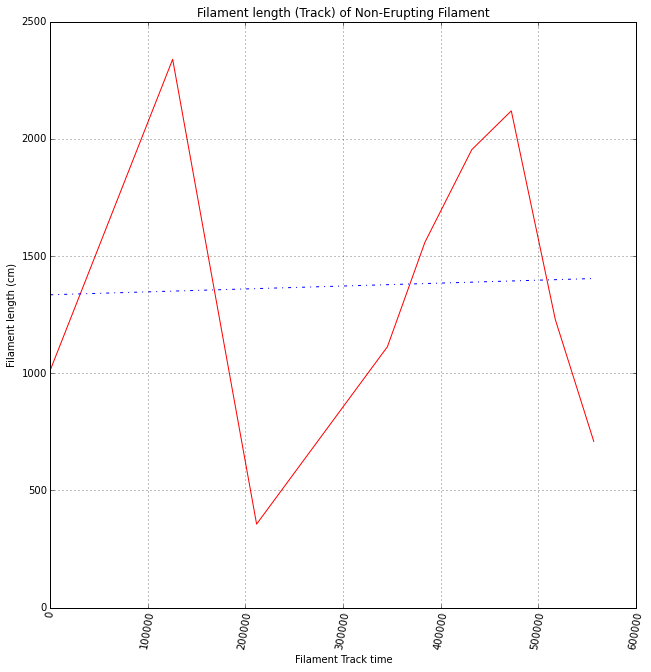

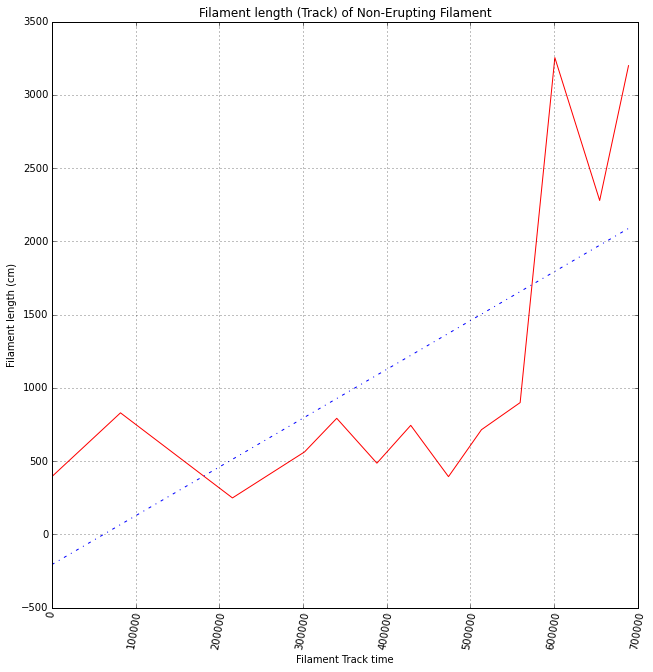

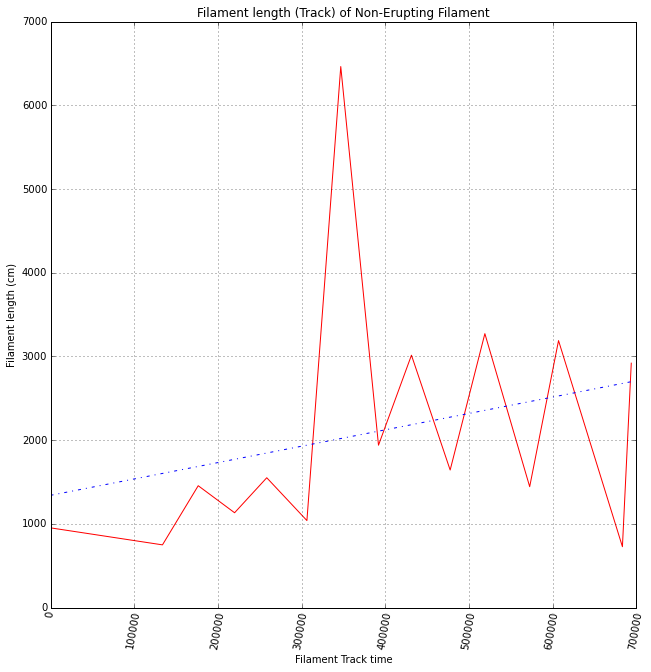

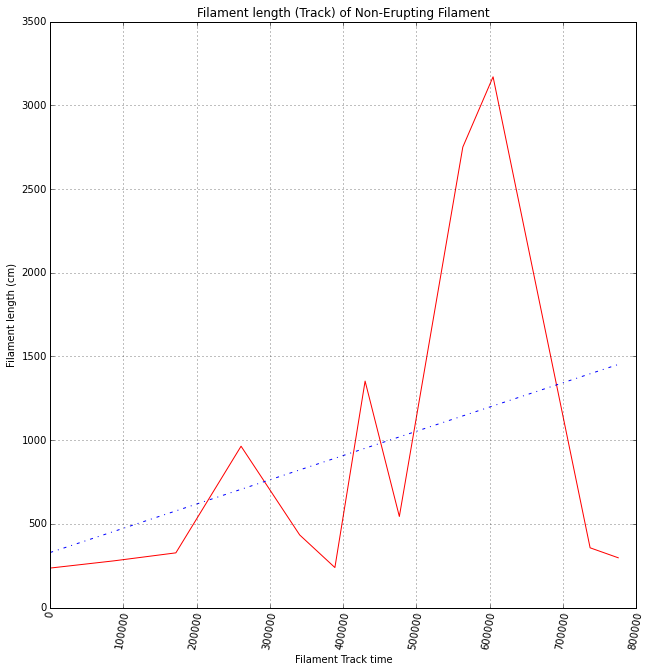

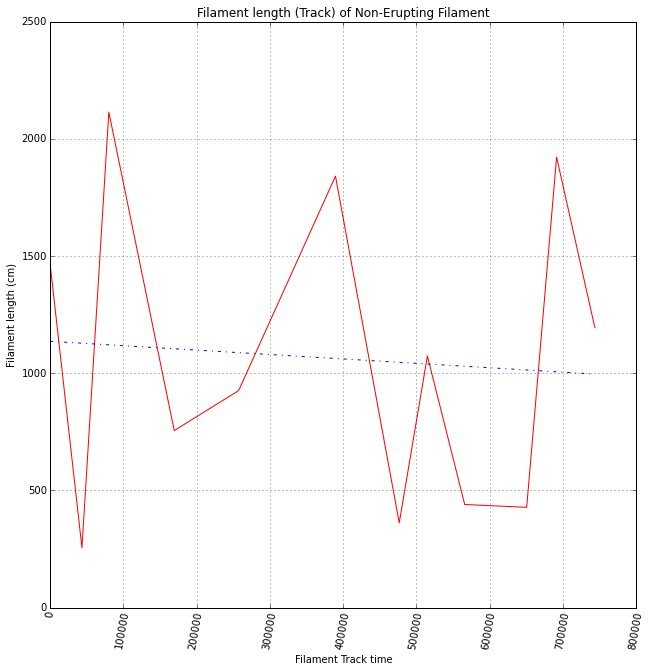

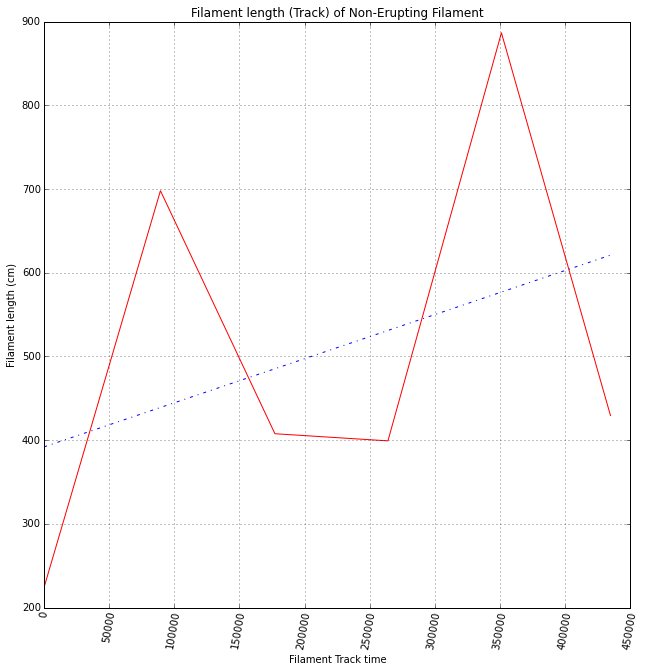

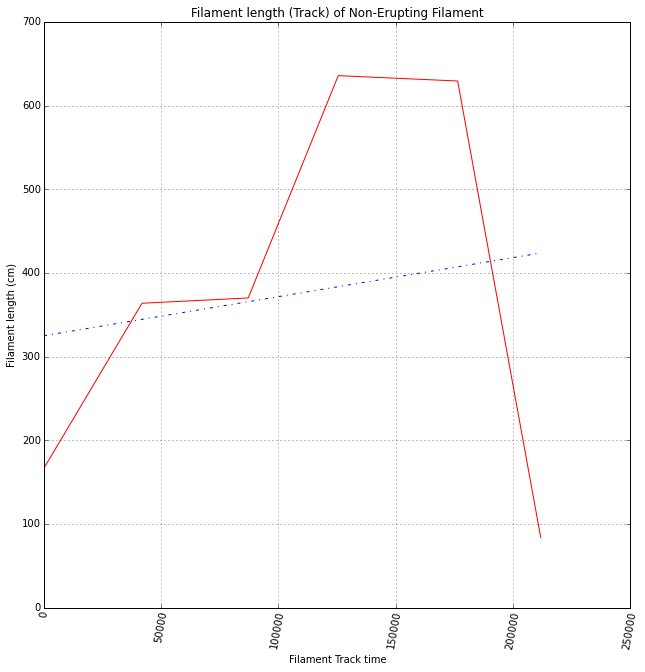

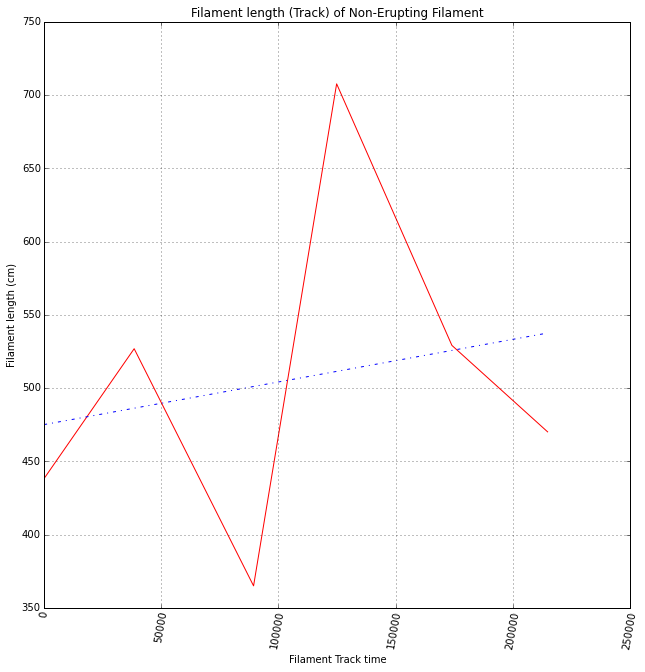

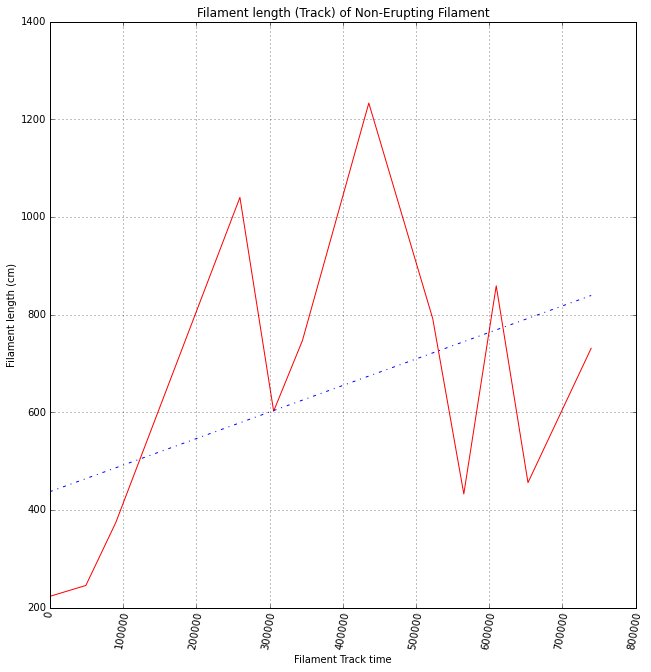

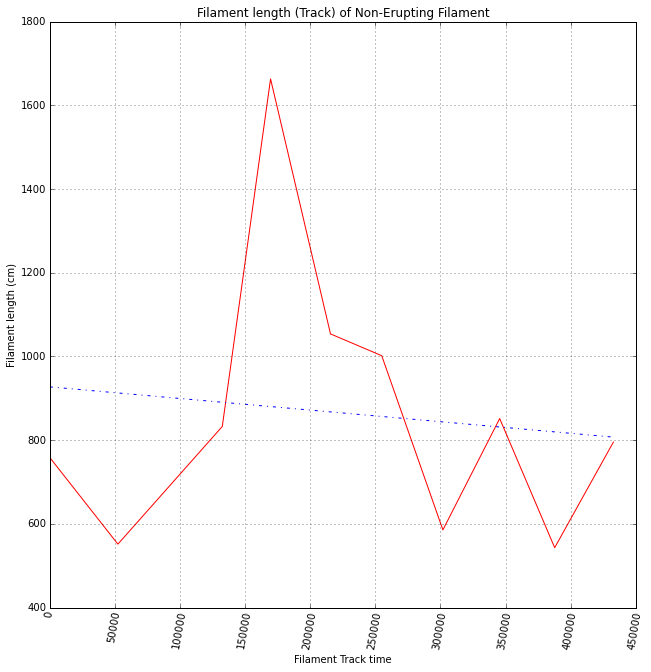

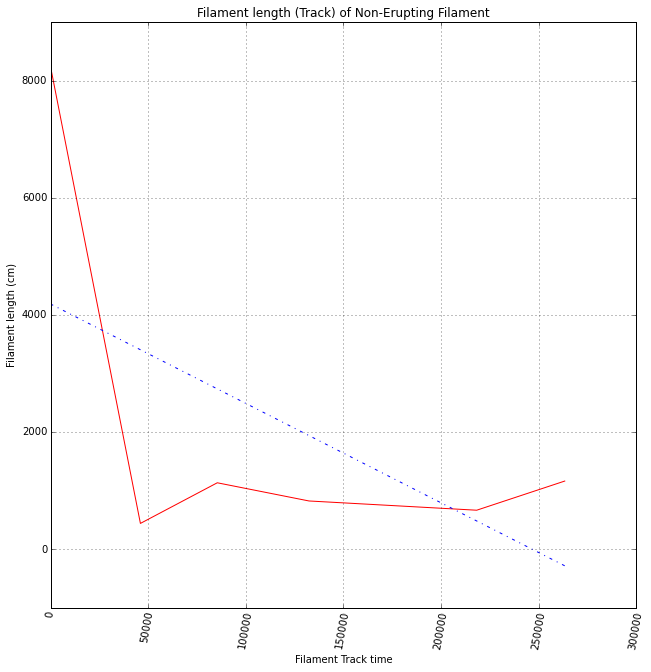

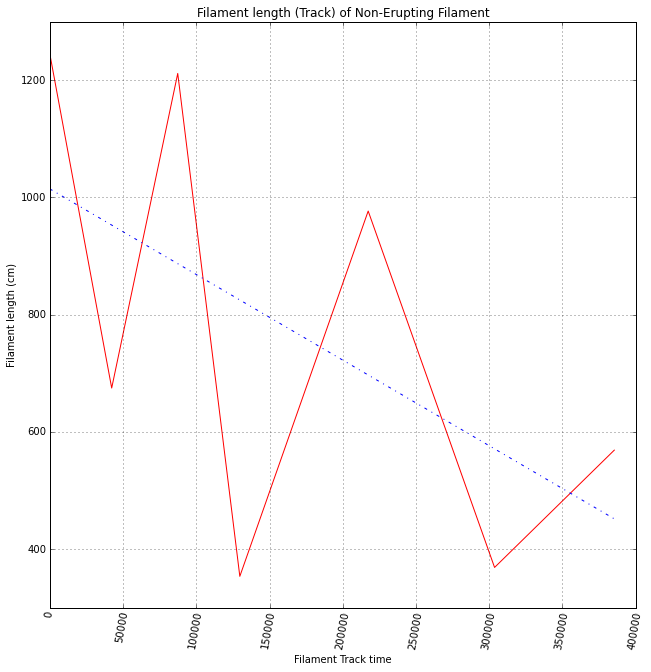

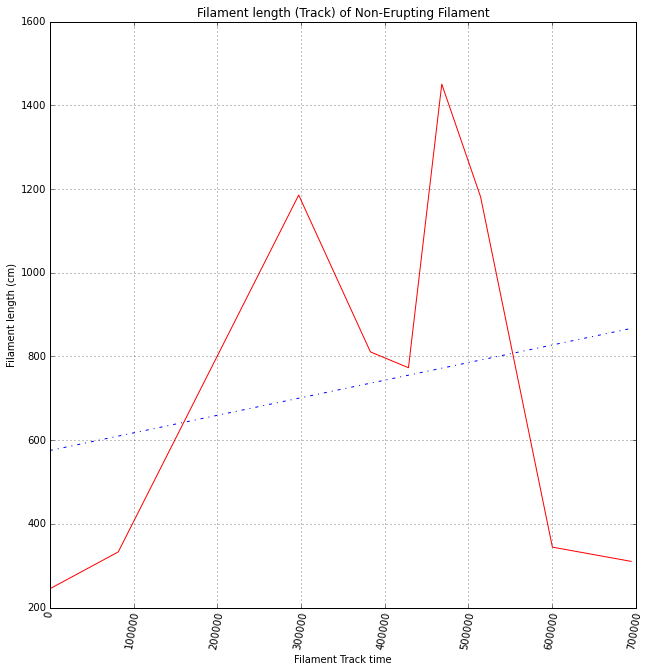

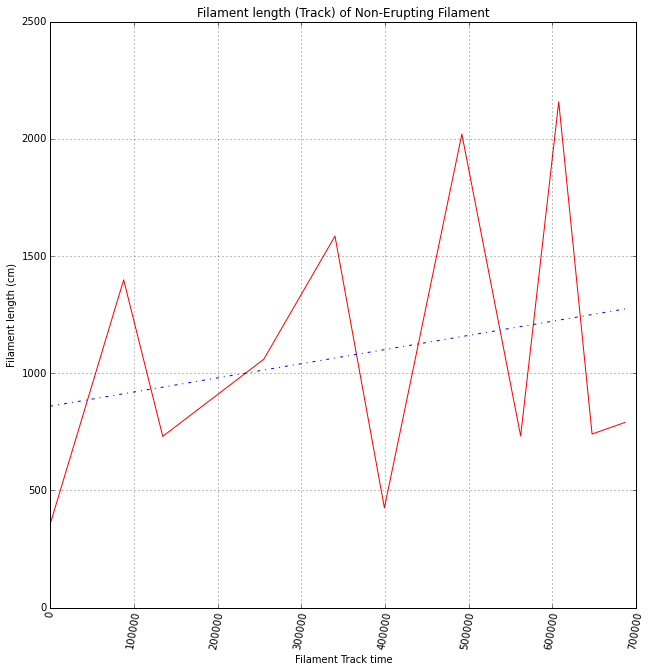

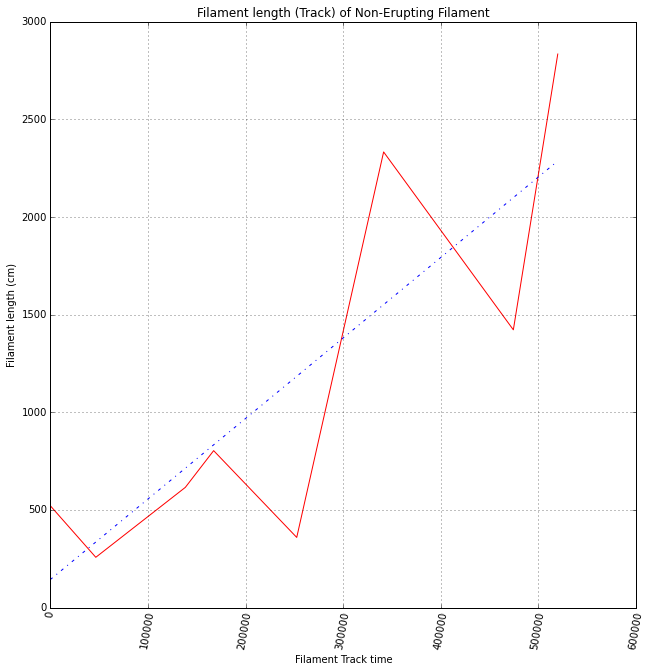

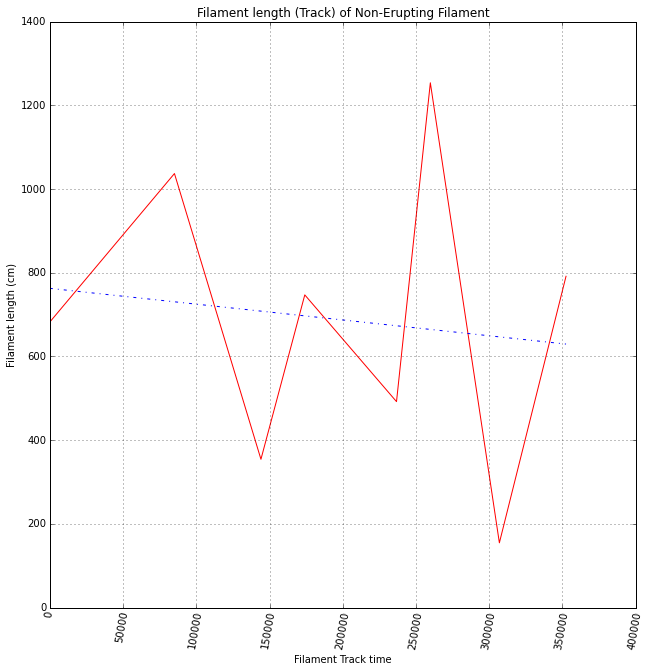

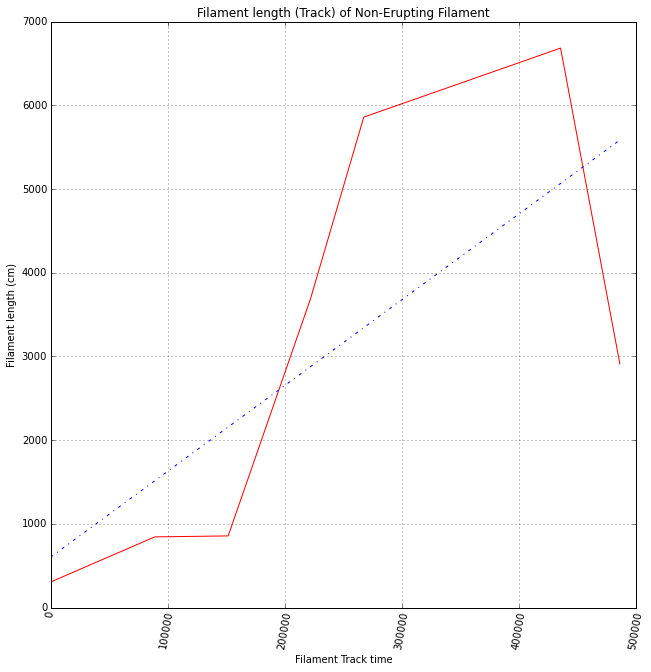

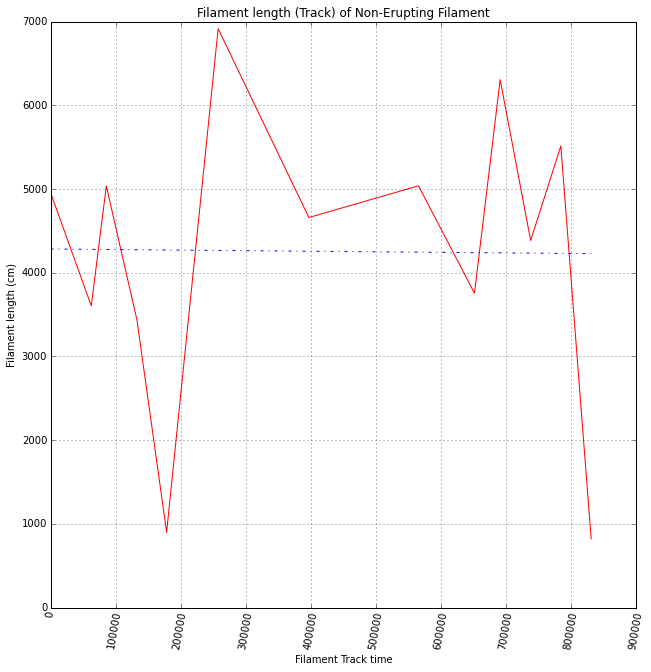

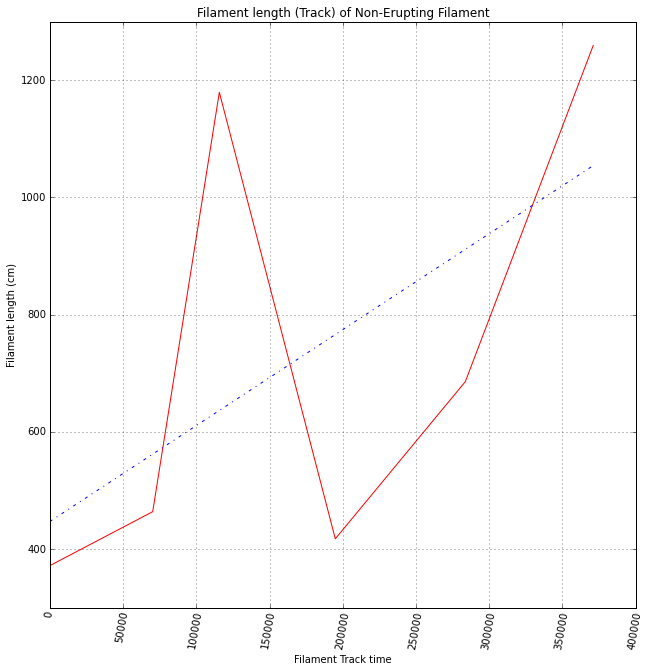

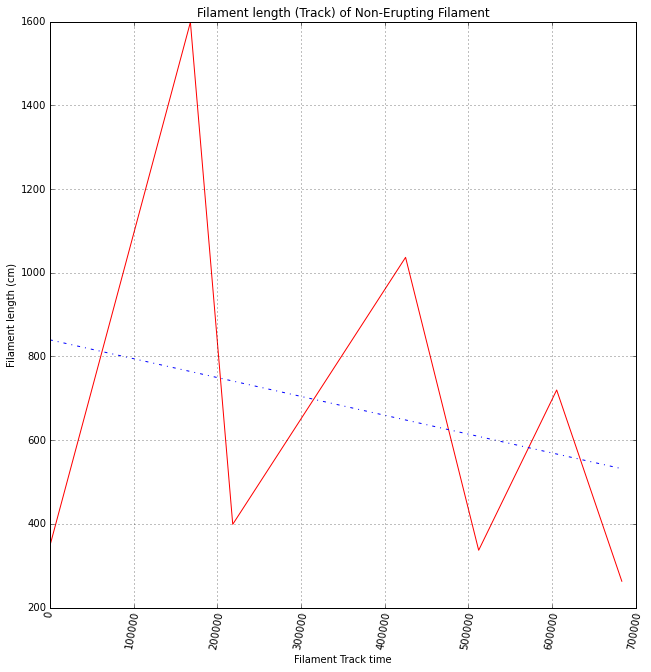

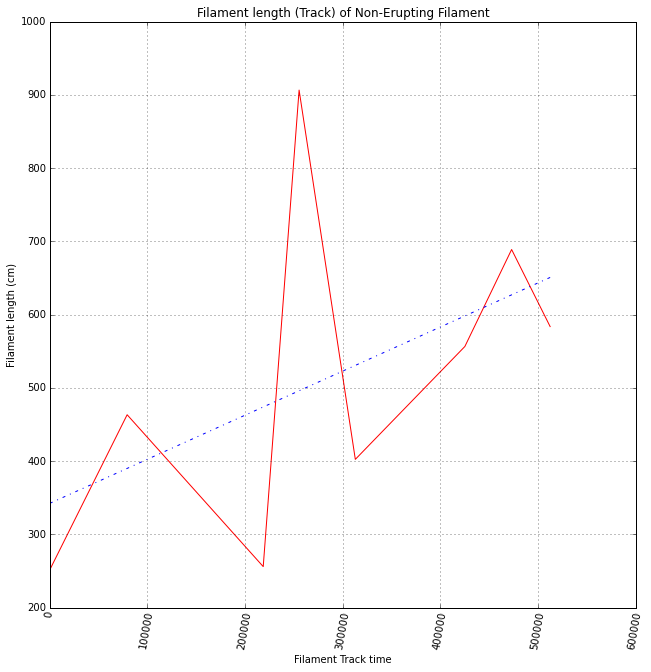

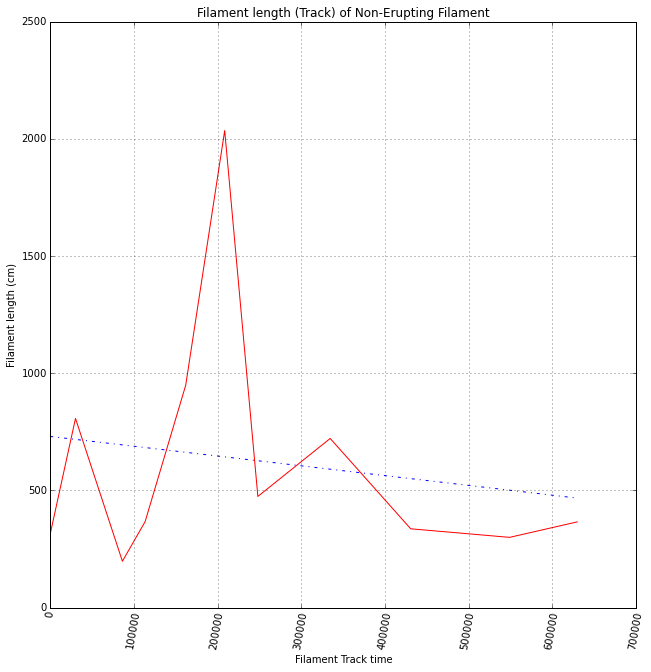

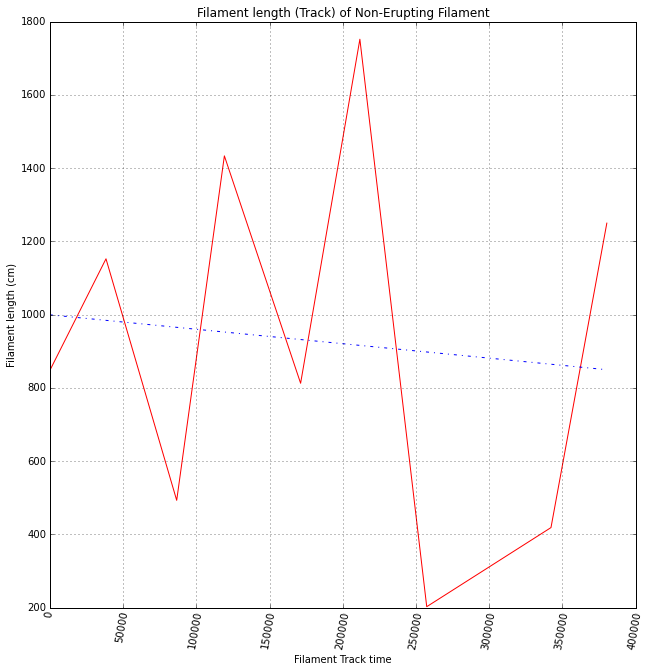

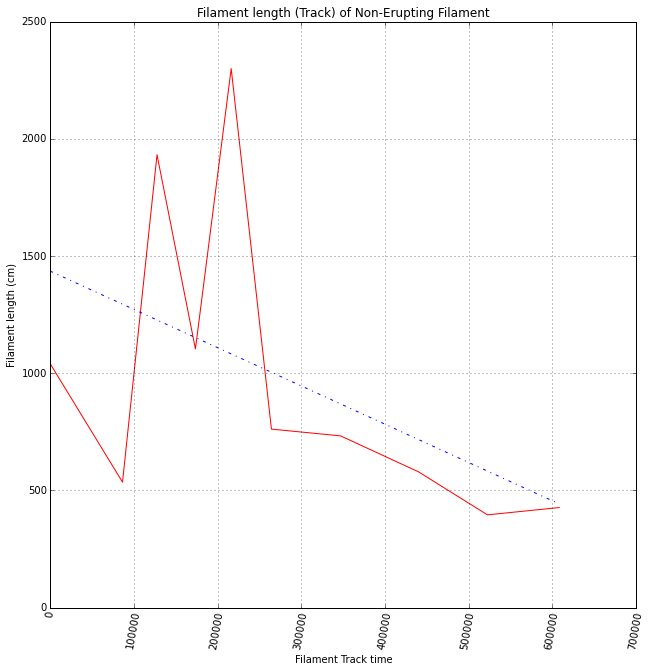

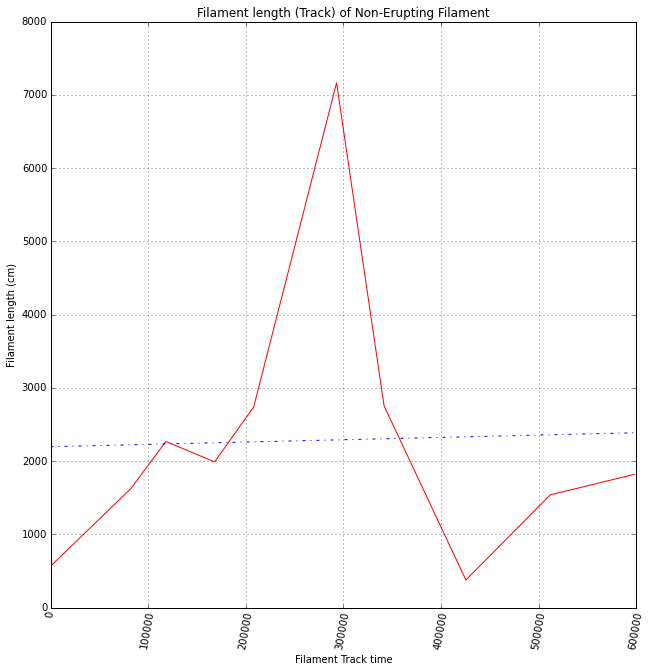

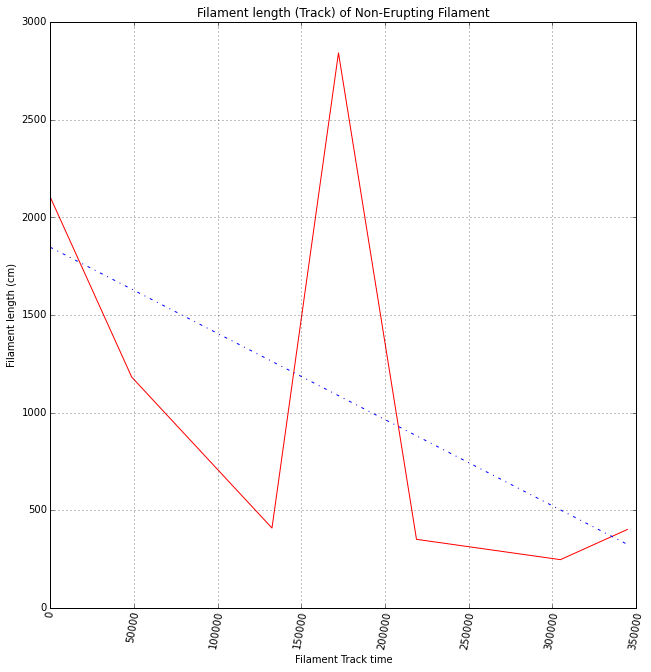

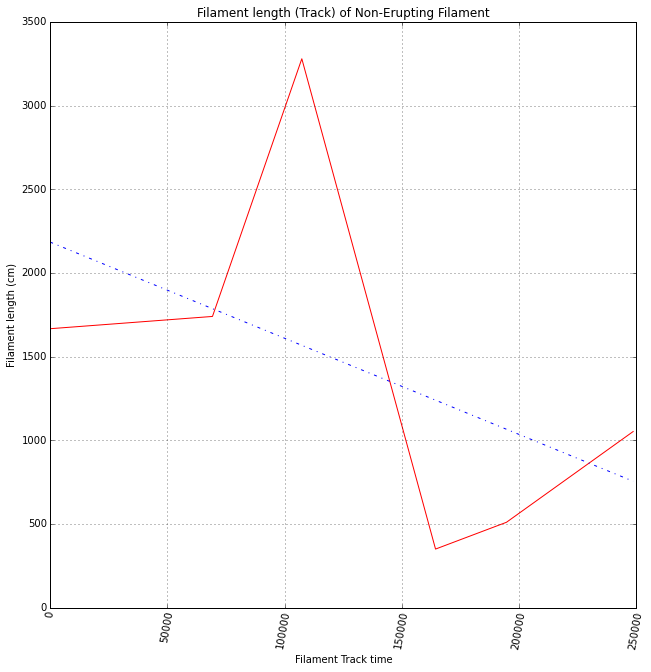

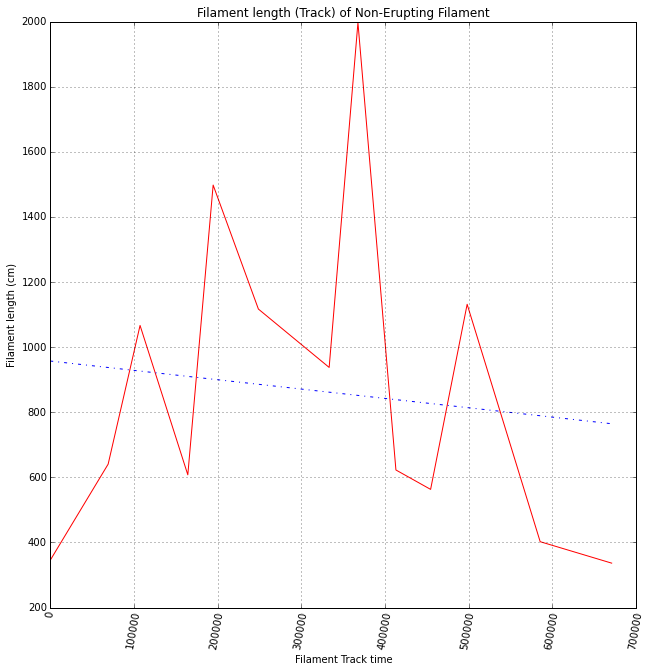

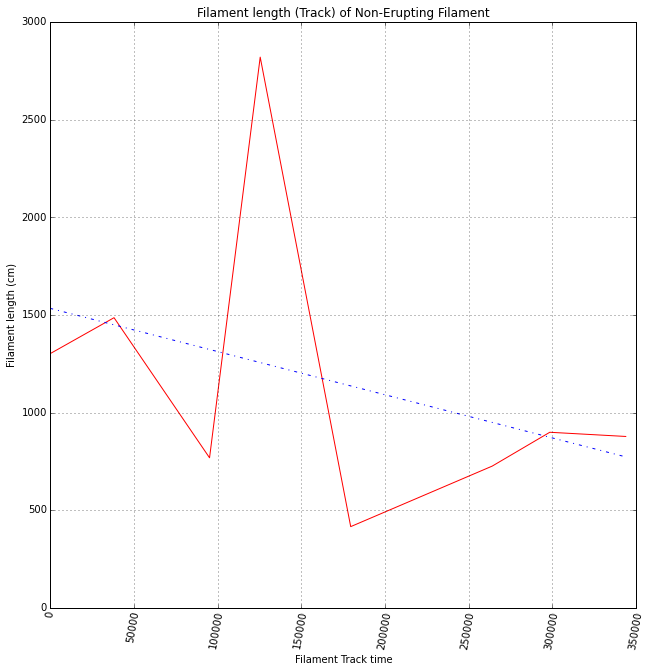

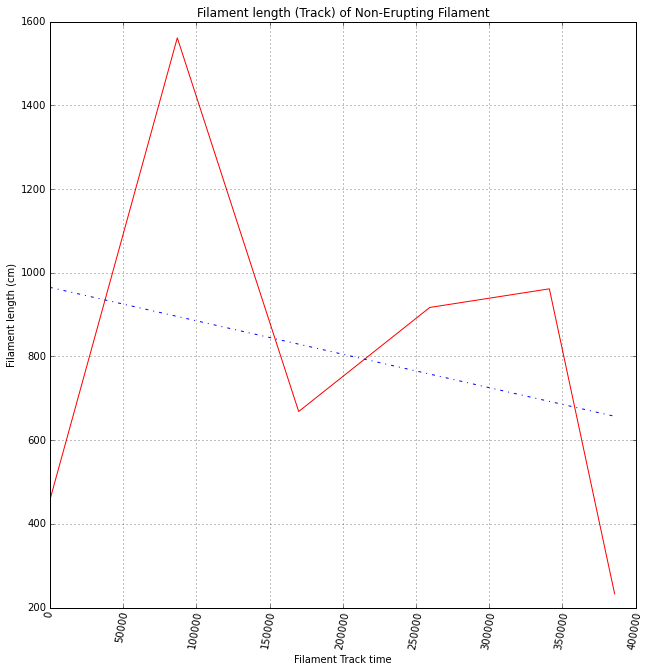

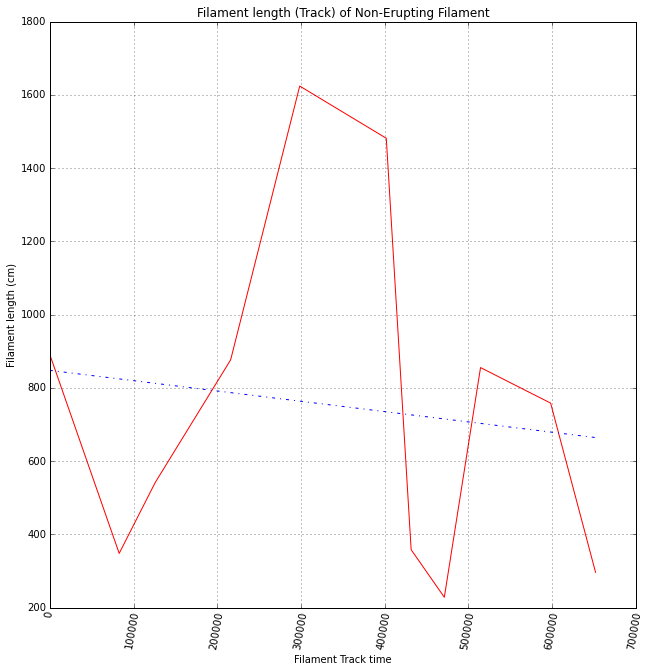

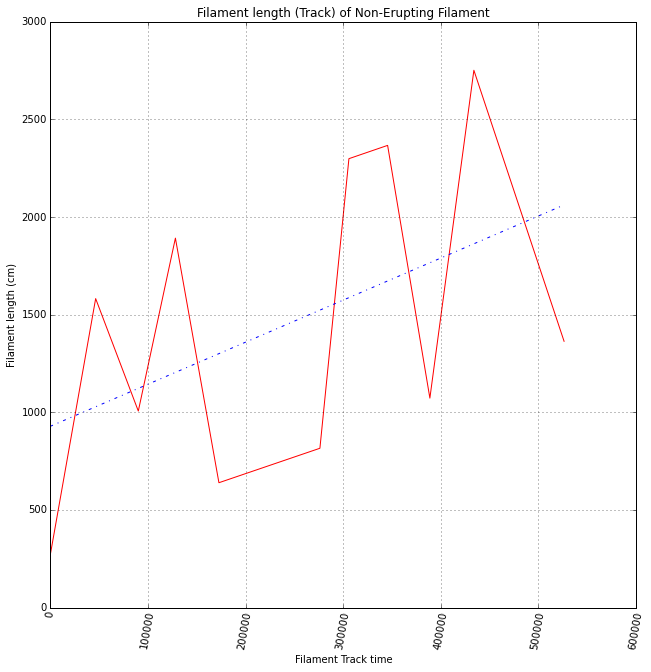

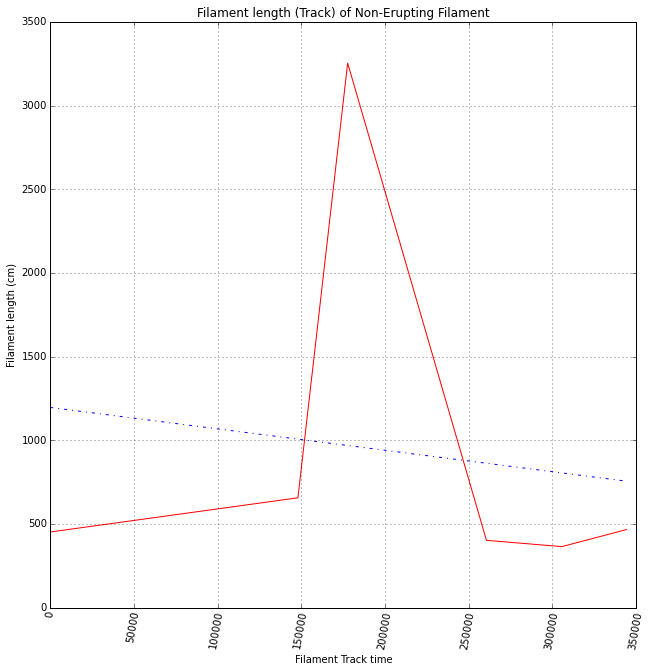

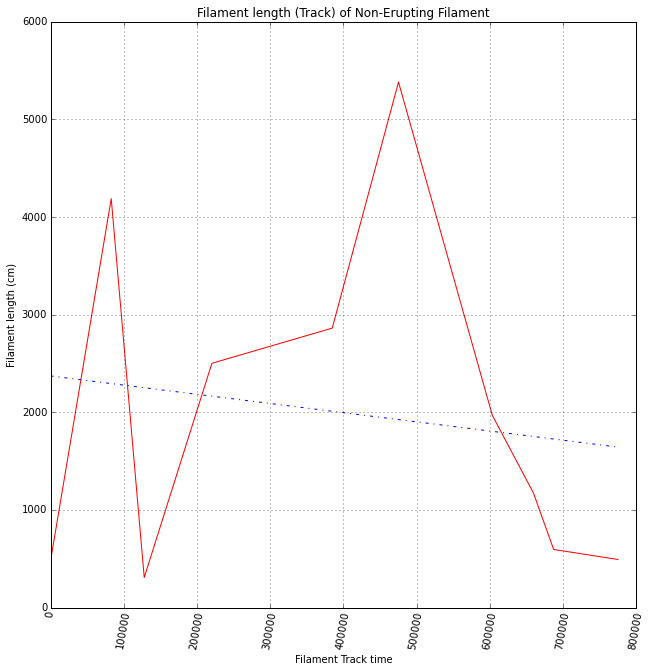

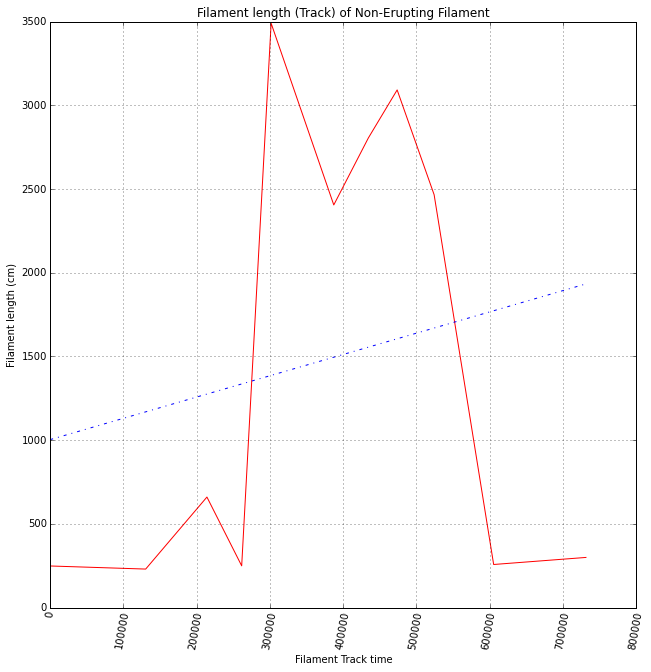

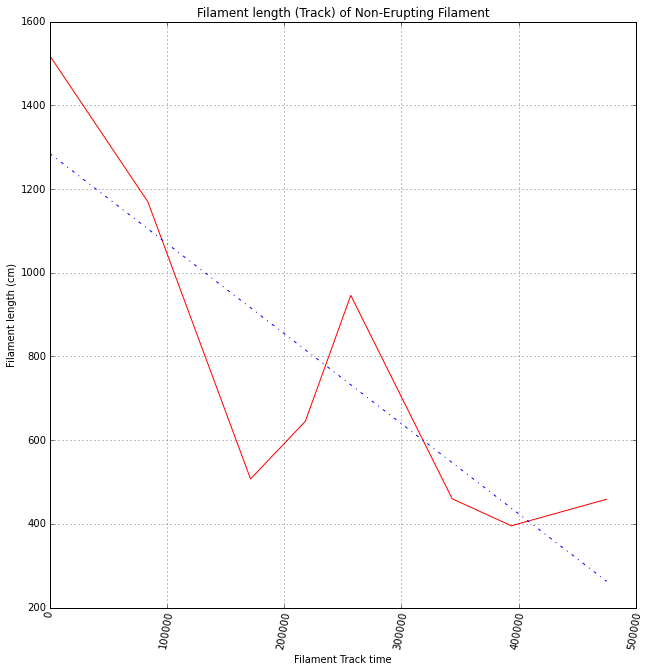

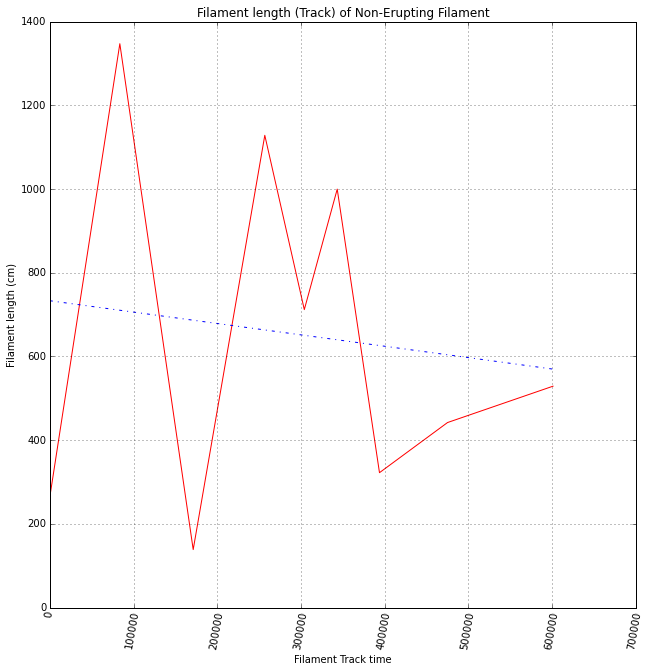

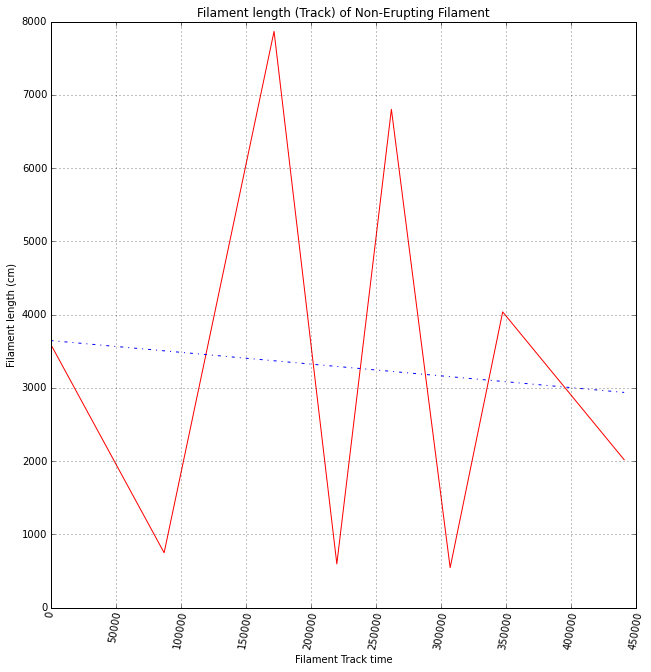

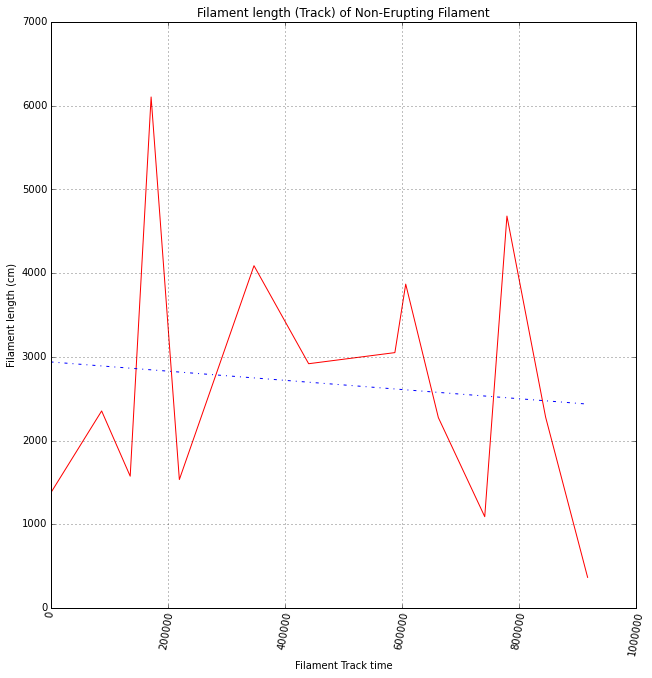

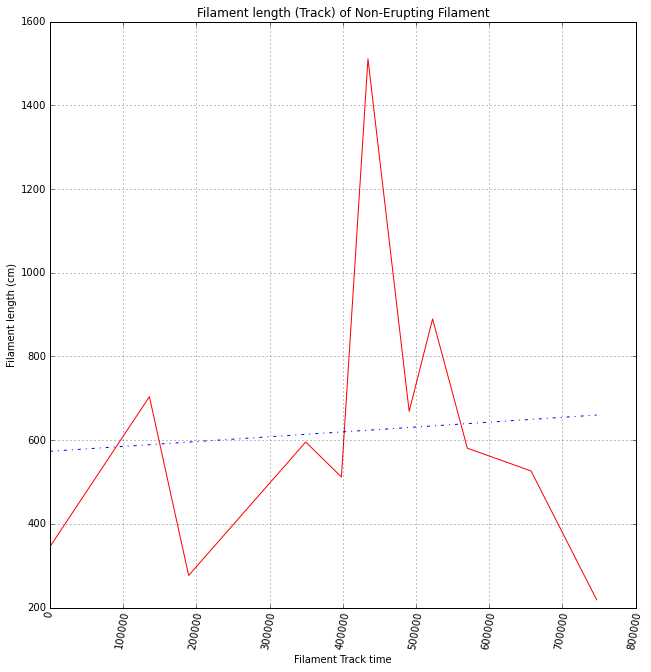

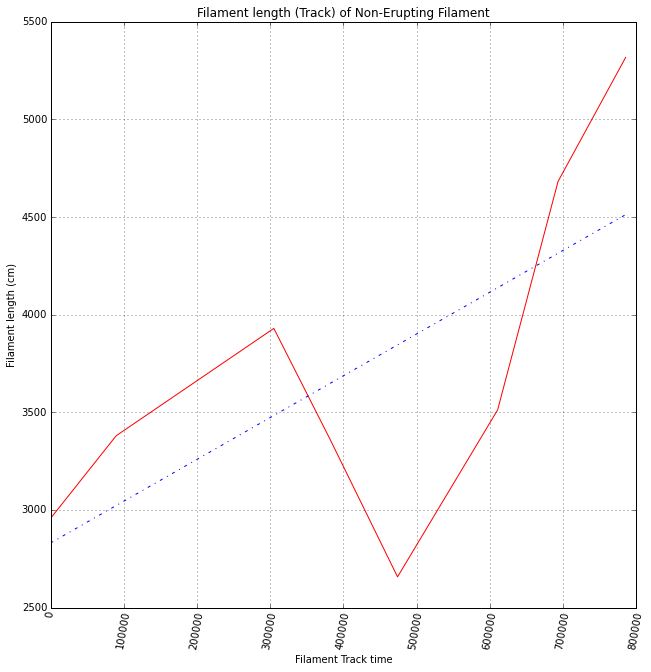

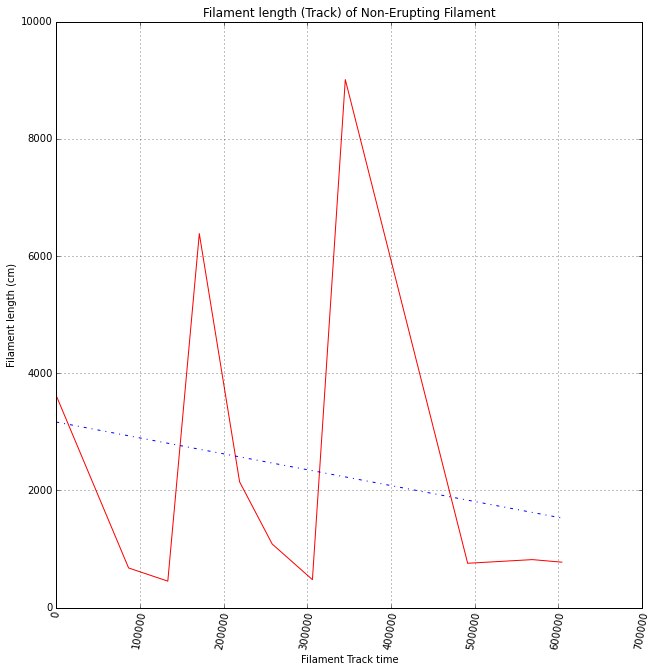

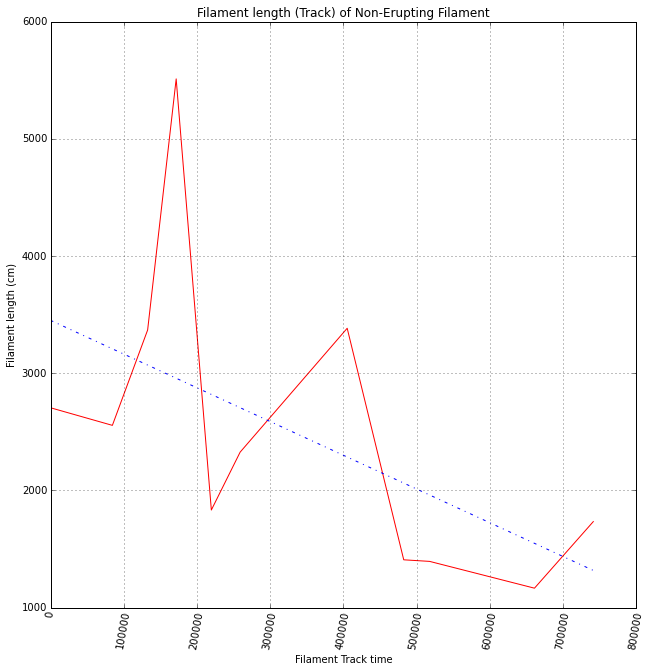

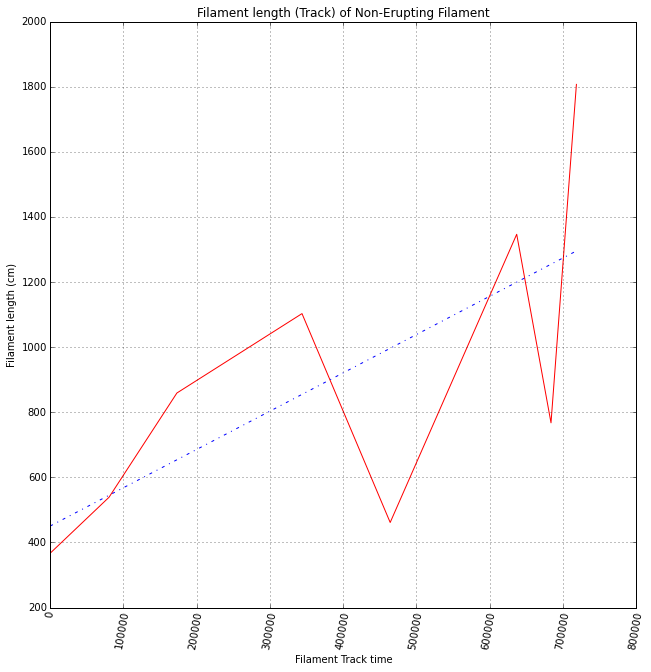

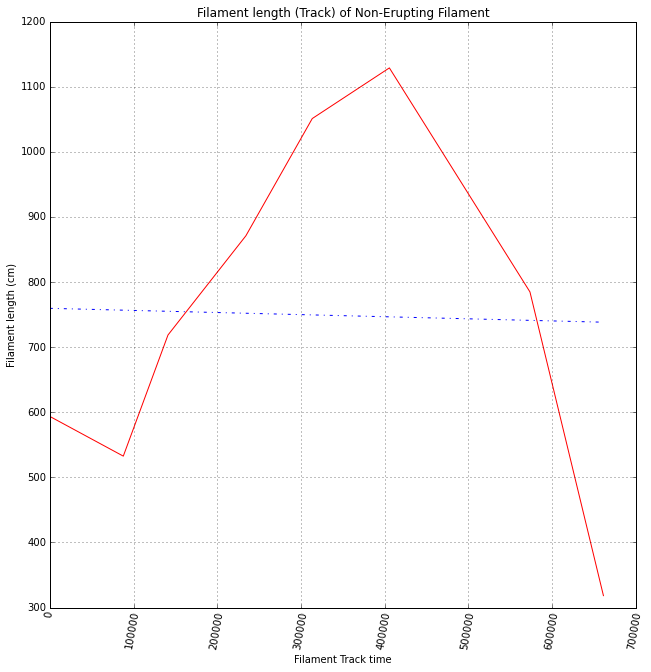

In [30]:
grouped_filaments = all_tracks_trans.groupby('Track No.')
area_slopes = []
for name, group in grouped_filaments:
    t_delt = group['time_delta']
    f_area = group['area']
    fit = np.polyfit(t_delt, f_area,1)
    area_slopes = area_slopes + [fit]*len(f_area) 
    plot_slopes(t_delt,f_area,fit[0],fit[1])

In [31]:
area_slopes_only = [item[0] for item in area_slopes]

all_tracks_trans['area_fits'] = area_slopes
all_tracks_trans['area_slope'] = area_slopes_only
all_tracks_trans.head()

/usr/local/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Track No.    fi_length             HEK_time  fi_chirality  fi_tilt  \
149         64  19229714400  2012-01-06 18:05:45             0  70.7404   
150         64  22673801200  2012-01-07 09:33:12            -1  76.3383   
151         64  21741021200  2012-01-08 08:28:28             0  67.0859   
152         64  18870927400  2012-01-09 11:08:54            -1  73.8154   
153         64  12987221000  2012-01-10 18:23:00             0 -53.1533   

            area  fi_barbstot        xcen        ycen  time_delta  \
149  7662.162092            3 -879.333984  299.819000           0   
150  5797.861380            6 -809.905029  300.821991       55647   
151  6053.765348            3 -649.929016  324.964996      138163   
152  4029.099151            2 -455.740997  328.979004      234189   
153   954.909216            4  125.750999  465.782990      346635   

                            len_fits     len_slope  \
149  [-37783.8341693, 24021142545.2] -37783.834169   
150  [-37783.8341693, 24021142545.2] -37783.834169   
151  [-37783.8341693, 24021142545.2] -37783.834169   
152  [-37783.8341693, 24021142545.2] -37783.834169   
153  [-37783.8341693, 24021142545.2] -37783.834169   

                           area_fits  area_slope  
149  [-0.0163873086699, 7476.230049]   -0.016387  
150  [-0.0163873086699, 7476.230049]   -0.016387  
151  [-0.0163873086699, 7476.230049]   -0.016387  
152  [-0.0163873086699, 7476.230049]   -0.016387  
153  [-0.0163873086699, 7476.230049]   -0.016387

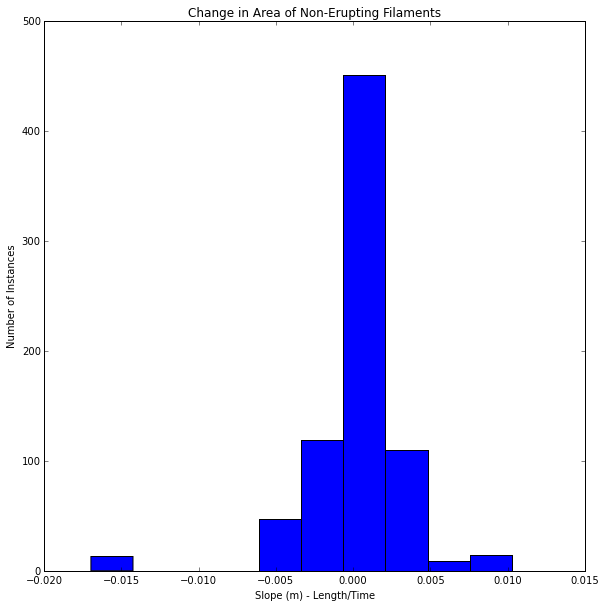

In [32]:
plt.xlabel('Slope (m) - Length/Time')
plt.ylabel('Number of Instances')
plt.title('Change in Area of Non-Erupting Filaments')
fig1 = plt.gcf()
fig1.set_size_inches(8.5,8.5)
plt.hist(area_slopes_only)
plt.tight_layout()
plt.show()

In [33]:
print min(all_tracks_trans['fi_length'])

1865565310


#CURRENT RESULTS FOR HACK WEEK

In [34]:
url = 'Non_Eruption_Analysis.csv'
non_erupting = pd.read_csv(url)
non_erupting = non_erupting.drop('Unnamed: 0', axis=1)
non_erupting.replace('Na',np.nan, inplace=True)
non_erupting['Eruption'] = 0
non_erupting.head()
#non_erupting.keys()


Track No.  fi_length_avg    length_slp  fi_area_avg  area_slp  \
0         64   1.910054e+10 -20851.523458  4899.559437 -0.017645   
1         78   9.040830e+09  19070.132868  1100.649604  0.001371   
2         98   6.642232e+09   5826.291102  1461.183990 -0.000051   
3        106   1.047587e+10  19895.431452  1288.497093  0.003803   
4        135   4.836125e+09 -14971.593714   353.247685 -0.001294   

   fi_chiral_avg  chiral_slp  fi_tilt_avg  tilt_slp  Eruption  
0       0.400000   -0.259382    46.965340 -3.110127         0  
1      -0.333333   -0.836622   -33.939233  0.316939         0  
2       0.285714    0.864459     2.343557 -1.330016         0  
3       0.222222    0.832329   -21.837421  0.671030         0  
4      -0.200000    2.301987   -37.236174  0.481864         0

In [35]:
url = 'Eruption_Analysis.csv'

erupting = pd.read_csv(url)
erupting = erupting.drop('Unnamed: 0', axis=1)
erupting.replace('Na',np.nan, inplace=True)
erupting = erupting.astype(float)
erupting['Eruption'] = 1
erupting = erupting.dropna()
erupting.head()

Track No.  fi_length_avg     length_slp  fi_area_avg  area_slp  \
1         21   4.843297e+09   14271.123747   476.062630 -0.002162   
3         93   1.140865e+10    5635.917614  4542.134217 -0.004866   
4         94   2.242780e+10  -26760.784806  5584.925487 -0.007008   
5        140   1.219793e+10  100417.840826  3487.984499  0.029020   
6        175   1.381954e+10   12941.709122  5210.939558  0.007604   

   fi_chiral_avg  chiral_slp  fi_tilt_avg  tilt_slp  Eruption  
1       0.000000    0.000000   -55.760900 -6.176173         1  
3       0.000000    4.706329    -9.283704 -4.488977         1  
4      -0.142857   -3.257830    33.833814 -0.721631         1  
5       0.250000    0.242555    17.280300  4.510884         1  
6       0.400000   -1.354914   -22.194140 -0.169296         1

In [36]:
##Now lets see if we can predict whether a filament will erupt or not. 
erupting = erupting.astype(float)
all_eruptions=erupting.append(non_erupting,ignore_index = True)   #adding everything together
all_eruptions = all_eruptions.dropna() #for now, dropping everything with NaN
all_eruptions.head()

Track No.  fi_length_avg     length_slp  fi_area_avg  area_slp  \
0         21   4.843297e+09   14271.123747   476.062630 -0.002162   
1         93   1.140865e+10    5635.917614  4542.134217 -0.004866   
2         94   2.242780e+10  -26760.784806  5584.925487 -0.007008   
3        140   1.219793e+10  100417.840826  3487.984499  0.029020   
4        175   1.381954e+10   12941.709122  5210.939558  0.007604   

   fi_chiral_avg  chiral_slp  fi_tilt_avg  tilt_slp  Eruption  
0       0.000000    0.000000   -55.760900 -6.176173         1  
1       0.000000    4.706329    -9.283704 -4.488977         1  
2      -0.142857   -3.257830    33.833814 -0.721631         1  
3       0.250000    0.242555    17.280300  4.510884         1  
4       0.400000   -1.354914   -22.194140 -0.169296         1

In [37]:
#Pull out the feature we want to predict (1 for eruption, 0 for no eruption)
Y = np.array(all_eruptions['Eruption'])  #getting the eruption status (variable that is trying to be predicted)

In [38]:
all_eruptions.to_csv('All_Eruption_Analysis.csv', columns = ('Track No.', 'fi_length_avg', 'length_slp', 'fi_area_avg', 'area_slp', 'fi_chiral_avg', 'chiral_slp', 'fi_tilt_avg', 'tilt_slp','Eruption'))
all_eruptions = all_eruptions.drop('Eruption',1)  #now dropping the eruption column! 
X = all_eruptions.as_matrix()
print X

[[  2.10000000e+01   4.84329692e+09   1.42711237e+04 ...,   0.00000000e+00
   -5.57609000e+01  -6.17617259e+00]
 [  9.30000000e+01   1.14086501e+10   5.63591761e+03 ...,   4.70632930e+00
   -9.28370400e+00  -4.48897738e+00]
 [  9.40000000e+01   2.24278048e+10  -2.67607848e+04 ...,  -3.25783011e+00
    3.38338143e+01  -7.21630702e-01]
 ..., 
 [  3.20600000e+03   1.60905280e+10   5.88893952e+04 ...,  -5.78335796e+00
   -5.52171750e+01   1.54167976e+00]
 [  3.21400000e+03   3.80288667e+09   1.22756346e+04 ...,   4.68376818e+00
    5.12343750e+01   1.70282370e+00]
 [  3.23200000e+03   3.80288486e+09  -2.78869390e+03 ...,   7.78335829e+00
   -1.17732250e+01   8.41856134e-01]]


In [40]:
#Let's start by making 40 different 'forests' (based on decision trees)
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

n_trees = range(1,41)
scores = []
#This will make 40 forests, and each forest will be made up of 1-40 trees successively
#This way, we can see how much of an effect adding more trees has on the predictions.
for i in n_trees:
    forest = sklearn.ensemble.RandomForestClassifier(n_estimators = i)
    val_score = cross_val_score(forest, X=X, y=Y, cv=10)
    scores.append(val_score) 

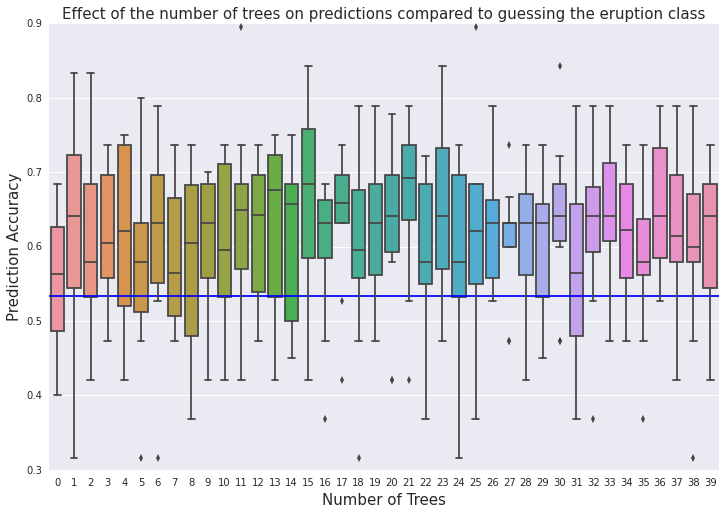

In [43]:
import seaborn as sns
non_erupt = 0.
for eruption in Y:
    if eruption == 0:
        non_erupt = non_erupt+1.
avg = non_erupt/len(Y)

plt.figure(figsize=(12,8))
plt.axhline(y=avg)
plt.title('Effect of the number of trees on predictions compared to guessing the eruption class', fontsize=15)
plt.xlabel('Number of Trees', fontsize=15)
plt.ylabel('Prediction Accuracy', fontsize=15)
sns.boxplot(data=scores)
#sns.boxplot(scores)

In [44]:
feature_forest = sklearn.ensemble.RandomForestClassifier(n_estimators = 15)
#by_feature = feature_forest.feature_importances_
fitted_forest4a = forest.fit(X, Y)
val_score_ = cross_val_score(fitted_forest4a, X=X, y=Y, cv=10)
imp_features = fitted_forest4a.feature_importances_

print imp_features

[ 0.08546404  0.09714833  0.1334937   0.09455127  0.15988827  0.09349091
  0.11127594  0.11746989  0.10721765]


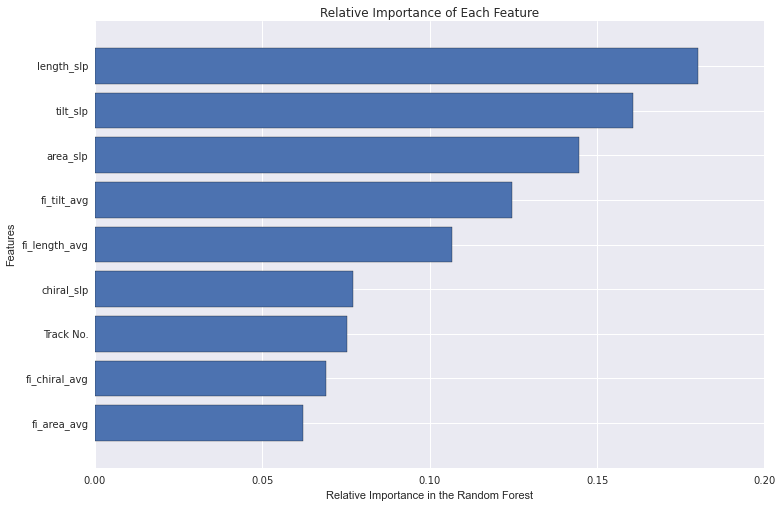

In [45]:
#Whitch features are most useful for prediction?
plt.figure(figsize=(12,8))
clf = RandomForestClassifier(n_estimators=15)

clf.fit(X,Y)
importance_list = clf.feature_importances_
name_list = all_eruptions.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative Importance of Each Feature')
plt.show()

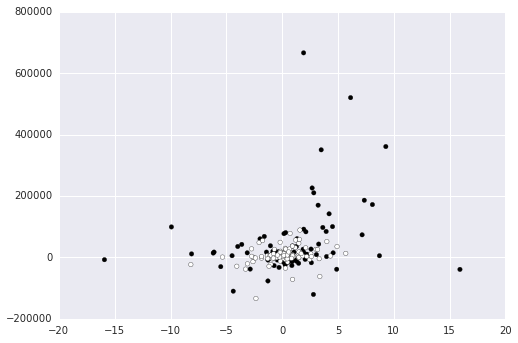

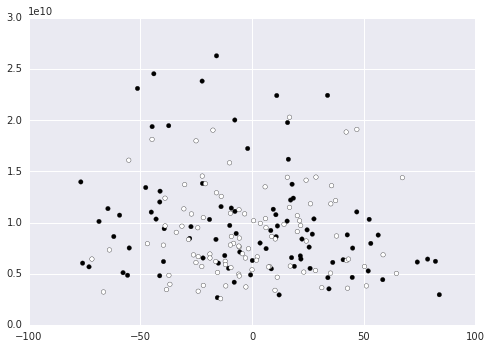

In [49]:
colors = Y
plt.scatter(all_eruptions['tilt_slp'],all_eruptions['length_slp'], c=colors)
plt.show()
plt.scatter(all_eruptions['fi_tilt_avg'],all_eruptions['fi_length_avg'], c=colors)
plt.show()